# Exercise 1

Use your newly acquired Python knowledge to make your live a bit easier. Develop a small script which helps you calculate the mass (m)for a batch of 1 litre 50 mM Ammonium hydrogen carbonate. Print the mass at the end.

Molar mass (M): 79,056 g/mol   
Concentration (c): 0.05 mol/l   
Volume (V): 1 l   

For this you need the formula
```
c = n / V
n = m / M
n = c * V
m = n * M
```

In [1]:
## Your code goes here

# It is tempting to use the same variable names as in the exercise description, but
# 1. they are not very descriptive, V could also be voltage or velocity
# 2. Solely uppercase variable names are usually reserved for constants (e.g. PI or G)

volume: float = 1.0
concentration: float = 0.05
g_mol: float = 79.056

mol: float = concentration * volume # mol == n from the exercise description (mol/l * l == mol)
mass: float = g_mol * mol

print(mass, "g")


3.9528 g


# Exercise 2

Make your calculation reusable and more generic by wrapping it up in a function which returns the calculated mass.   
The argument list should be volume, concentration, molar mass.   
Validate if your function works correctly with the data from exercise 1.


In [2]:
# You code goes here

def calc_m(volume: float, concentration: float, g_mol: float) -> float:
    mol = concentration * volume
    return g_mol * mol

print(calc_m(1.0, 0.05, 79.056), "g")


3.9528 g


# Exercise 3

In a proteomic search engine we need to find the nearest mass to charge (m/z) value to a given target thousands of times. Write a function which accepts a mass spectrum (a tuple with two float lists, first the m/z values second the intensities) and a targeted value to search for. The function should return a tuple with the nearest m/z value, the corresponding intensity, the index within the list difference to the searched value. Find the nearest peak to 638.5 m/z.    

The mass is located in the file `mass_spec.json`.


Hint: You need the built-in module `json` and the function `open()` to parse the file to a dictionary. Also checkout the functions `enumerate()` & `abs()`


In [3]:
# std imports
import json
from typing import Tuple, List

# Define the mass spec tuple
mass_spec: Tuple[List[float], List[float]] = ([], [])

# `with` statement to open the file
# it is automatically closed at the end of the `with`-block
with open("mass_spec.json") as json_file:
    mass_json = json.load(json_file)
    mass_spec = (mass_json["mz"], mass_json["intensities"])


def find_nearest_peak(mass_spec: Tuple[List[float], List[float]], target_mz: float) -> Tuple[float, float, int, float]:
    # Set the min index to -1 for now
    min_idx = -1
    # Set the min difference to infinity
    min_diff = float("inf")
    # Iterate over the mz values in the mass spec
    for mz_index, mz_value in enumerate(mass_spec[0]):
        # Calculate the difference between the target mz and the current mz
        diff = abs(target_mz - mz_value)
        # If the difference is less than the min difference
        if diff < min_diff:
            # Set the min index to the current index
            min_idx = mz_index
            # Set the min difference to the current difference
            min_diff = diff
    # Return the requested tuple
    return (mass_spec[0][min_idx], mass_spec[1][min_idx], min_idx, min_diff)


print(find_nearest_peak(mass_spec, 638.5))


(638.3635864257812, 505.02984619140625, 208, 0.13641357421875)


## Exercise 4 : Data Analysis

Let's delve into data analysis in python with pandas. You recieved a data set from your collaboration partners that work with hepatocellular carcinoma (HCC) and measured the proteomics of 19 healthy patients (C) and 19 patients that have HCC.

Load the dataset into pandas. What format is the file? 


In [4]:
import pandas as pd
df = pd.read_csv("./HCC_19_vs_19_miss.csv", delimiter=";")

 ### a) Take a look at the data
 
Get familiar with the dataset. What are the columns, what are the rows? What type are the values? Are there missing values?

In [5]:
# look at first 5 rows
print(df.head())
# print all columns
print(df.columns)
# get the type of values and non-nulls
print(df.info())
# see how many missing values there are per entry
print(df.isnull().sum())
# see the shape of the dataframe
print(df.shape)

   Unnamed: 0 Patients     Q9UJ68     Q07955     Q14657     P84103     P16219  \
0           0        C  16.619391  16.518123  12.648694  16.286555  20.342722   
1           1        C  15.925809  16.507480  11.912882  16.164261  20.310481   
2           2        C  15.910610  16.033652  11.195607  16.082698  20.243356   
3           3        C  15.550141  16.391160  11.679665  16.409471  18.715017   
4           4        C  16.972038  15.802381        NaN  15.515424  21.048951   

      P30039     P53396     Q15029  ...     Q53FZ2     P16930     Q8NFF5  \
0  19.983361  15.720470  14.341435  ...  16.009149  20.927944  12.108082   
1  20.289341  16.127082  15.507797  ...  15.704249  20.668705  12.834384   
2  20.798349  15.795249  15.050572  ...  15.951571  20.572259  12.475365   
3  19.342950  16.758684  15.115539  ...  15.053197  20.248823  12.035747   
4  20.721678  15.599451  14.574247  ...  16.783681  20.823900  10.681622   

      P55795     Q08J23     P78344     P43304     O75643

 ### b) Drop rows with more than 20% missing 
 
We want to keep Proteins that 80% of the patients have to erase a bias by too many missing values, since we don't know why they are missing. Notice here that it is important to know if your values are missing at completely at random due to machine errors or non-detectability, or if the patient did not produce that protein. For simplictiy, we just apply that threshold of 20%. 

In [6]:
df_dropped = df.dropna(axis=1, thresh=int(0.8*df.shape[0]))
print(df_dropped.shape)
print(df_dropped.head())

(38, 51)
   Unnamed: 0 Patients     Q9UJ68     Q07955     Q14657     P84103     P16219  \
0           0        C  16.619391  16.518123  12.648694  16.286555  20.342722   
1           1        C  15.925809  16.507480  11.912882  16.164261  20.310481   
2           2        C  15.910610  16.033652  11.195607  16.082698  20.243356   
3           3        C  15.550141  16.391160  11.679665  16.409471  18.715017   
4           4        C  16.972038  15.802381        NaN  15.515424  21.048951   

      P30039     P53396     Q15029  ...     Q53FZ2     P16930     Q8NFF5  \
0  19.983361  15.720470  14.341435  ...  16.009149  20.927944  12.108082   
1  20.289341  16.127082  15.507797  ...  15.704249  20.668705  12.834384   
2  20.798349  15.795249  15.050572  ...  15.951571  20.572259  12.475365   
3  19.342950  16.758684  15.115539  ...  15.053197  20.248823  12.035747   
4  20.721678  15.599451  14.574247  ...  16.783681  20.823900  10.681622   

      P55795     Q08J23     P78344     P43304  

 ### c) Impute the rest of the missing values
 
We want to impute the missing values for further analysis, like machine learning. Those algorithms cannot deal with missing data. There are some advanced imputation methods, especially if the cause of the missing is known, like multiple imputation by chained equations (MICE), k-nearest-neighbors (KNN), random forest imputation methods. Sometimes, using the mean or median can be absolutely sufficient. Impute the last missing values with the median!

In [7]:
df_dropped = df_dropped.drop("Patients", axis=1)
df_imputed= df_dropped.fillna(df_dropped.median())
print(df_imputed)

    Unnamed: 0     Q9UJ68     Q07955     Q14657     P84103     P16219  \
0            0  16.619391  16.518123  12.648694  16.286555  20.342722   
1            1  15.925809  16.507480  11.912882  16.164261  20.310481   
2            2  15.910610  16.033652  11.195607  16.082698  20.243356   
3            3  15.550141  16.391160  11.679665  16.409471  18.715017   
4            4  16.972038  15.802381  12.545497  15.515424  21.048951   
5            5  16.817585  16.823416  12.239872  16.125946  20.656826   
6            6  15.965339  16.805405  12.003178  16.085744  19.988869   
7            7  16.166600  16.447332  12.545497  15.900682  20.737646   
8            8  16.892741  16.370392  12.656236  15.824575  20.688594   
9            9  15.603151  16.741735  12.545497  16.325856  18.913052   
10          10  15.775770  16.660244  12.102596  16.287010  20.064698   
11          11  16.368546  16.907113  12.203288  15.990974  18.913052   
12          12  15.812089  16.161396  12.128397  15


### d) Correlation

Sometimes, correlation can mess with further analysis (machine learning) or can simply help us understand interactions with our data or gives us hints for possible biomarkers. Look at the correlation within our dataset! Look at the differences between the different correlation methods. 

In [8]:
corr = df_imputed.corr(method="kendall")
corr.style.background_gradient(cmap="coolwarm")


#C1 = Corr.abs().unstack()
#c1_sorted = C1.sort_values(ascending=True)


#print(c1_sorted)
#columns_above_80 = [(col1, col2)for col1, col2 in c1_sorted.index if c1_sorted[col1, col2]> 0.8 and col1!=col2] 
#print(columns_above_80)

### e) Pandas Plots

Check out the other different built in visualization methods pandas has to offer! 
Choose one protein and create a plot sorted by group (Control and Cancer):
1) histogram 
2) boxplot
3) pie plot

Hint: use df.hist() for the histogram and df.plot.box() and df.plot.pie() for the other two. There are slight differences between the plot and not plot methods!

Advanced: do the same for multiple or all proteins!


1. Histogram

Hint: you will need a special argument for the function call to group

array([<Axes: title={'center': 'C'}>, <Axes: title={'center': 'HCC'}>],
      dtype=object)

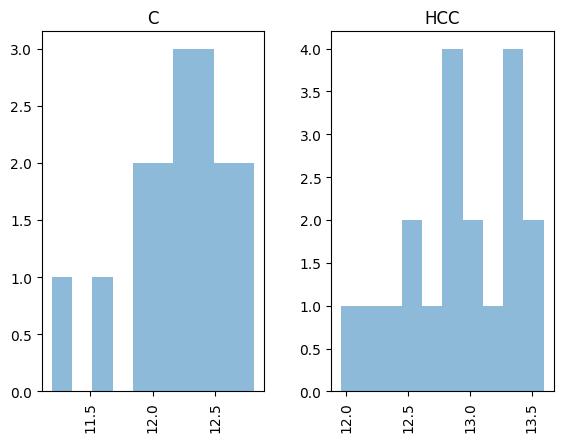

In [9]:
df.hist("Q14657",by="Patients", alpha=0.5)

2. Boxplot

Hint: you will need a special argument for the function call to group

<Axes: title={'center': 'Q14657'}, xlabel='Patients'>

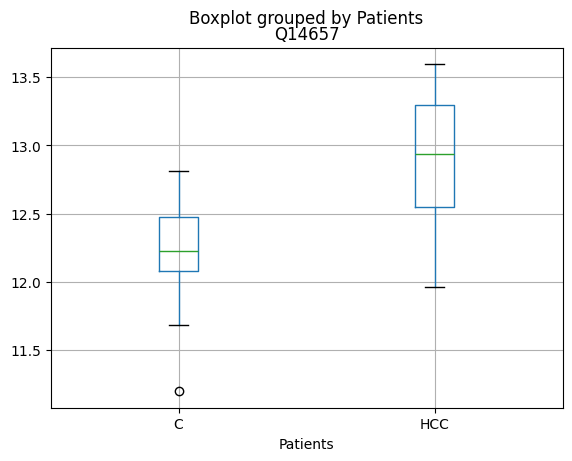

In [10]:
df.boxplot(column=["Q14657"], by="Patients")

3. Pie Plot

Hint: You will need to group manually first, sum up all intensities of the chosen protein per group and then plot it into the pandas pie plot


<Axes: title={'center': 'Protein Q14657 in Control and Cancer'}, ylabel='Q14657'>

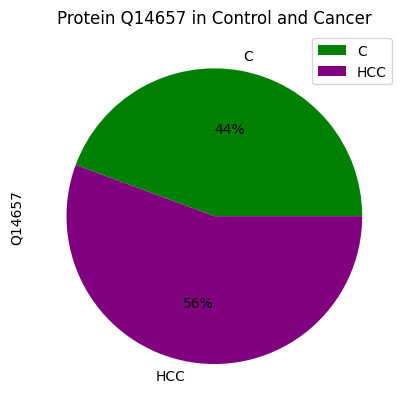

In [11]:
df_pie = df.drop("Unnamed: 0", axis=1)
#df_pie = df_pie.set_index("Patients")

df_pie = df_pie.groupby(["Patients"]).sum()
df_pie.plot.pie(y= "Q14657", autopct='%1.0f%%', title="Protein Q14657 in Control and Cancer", colors=["green", "purple"])

### f) Plotly Plots

Create he same plots that you've created with pandas in plotly!

1. Correlation
2. Histogram
3. Boxplot
4. Pie Plot

In [12]:
# import the library
import plotly.express as px
import plotly.io as pio
# pio.renderers.default = "iframe" # Needed for JupyterLab on Galaxy. if you are on Visual Studio Code remove that 

1. Correlation

Hint: You will need the correlation matrix from step d)

In [13]:
fig = px.imshow(corr)
fig.show()

2. Histogram

Hint: you will need to pass an argument for the function call for grouping

In [14]:
fig = px.histogram(df, x="Q14657", color = "Patients")
fig.show()

3. Boxplot

Hint: you will need to pass an argument for the function call for grouping

In [15]:
fig = px.box(df, x="Patients", y="Q14657")
fig.show()

4. Pie Plot

Hint: you will need to pass an argument for the function call for grouping

In [16]:
fig = px.pie(df, values="Q14657", names="Patients", title="Control vs Cancer")
fig.show()

### g) Sweetviz

Sweetviz is one of a few libraries allowing for a broad inspection of the data without having to visualize anything manually. Try to use it on the original dataframe, whilst comparing the two groups!


                                             |          | [  0%]   00:00 -> (? left)


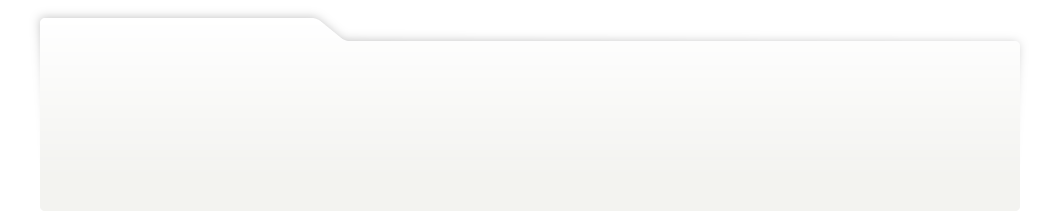
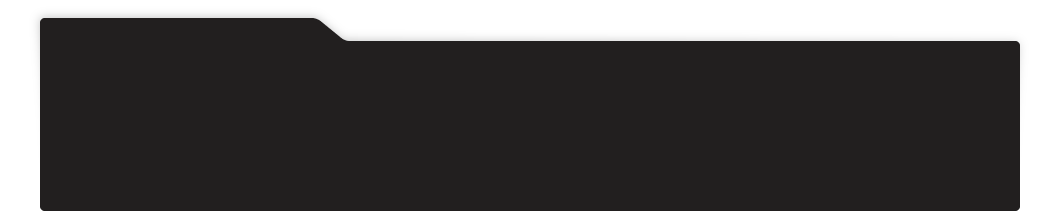
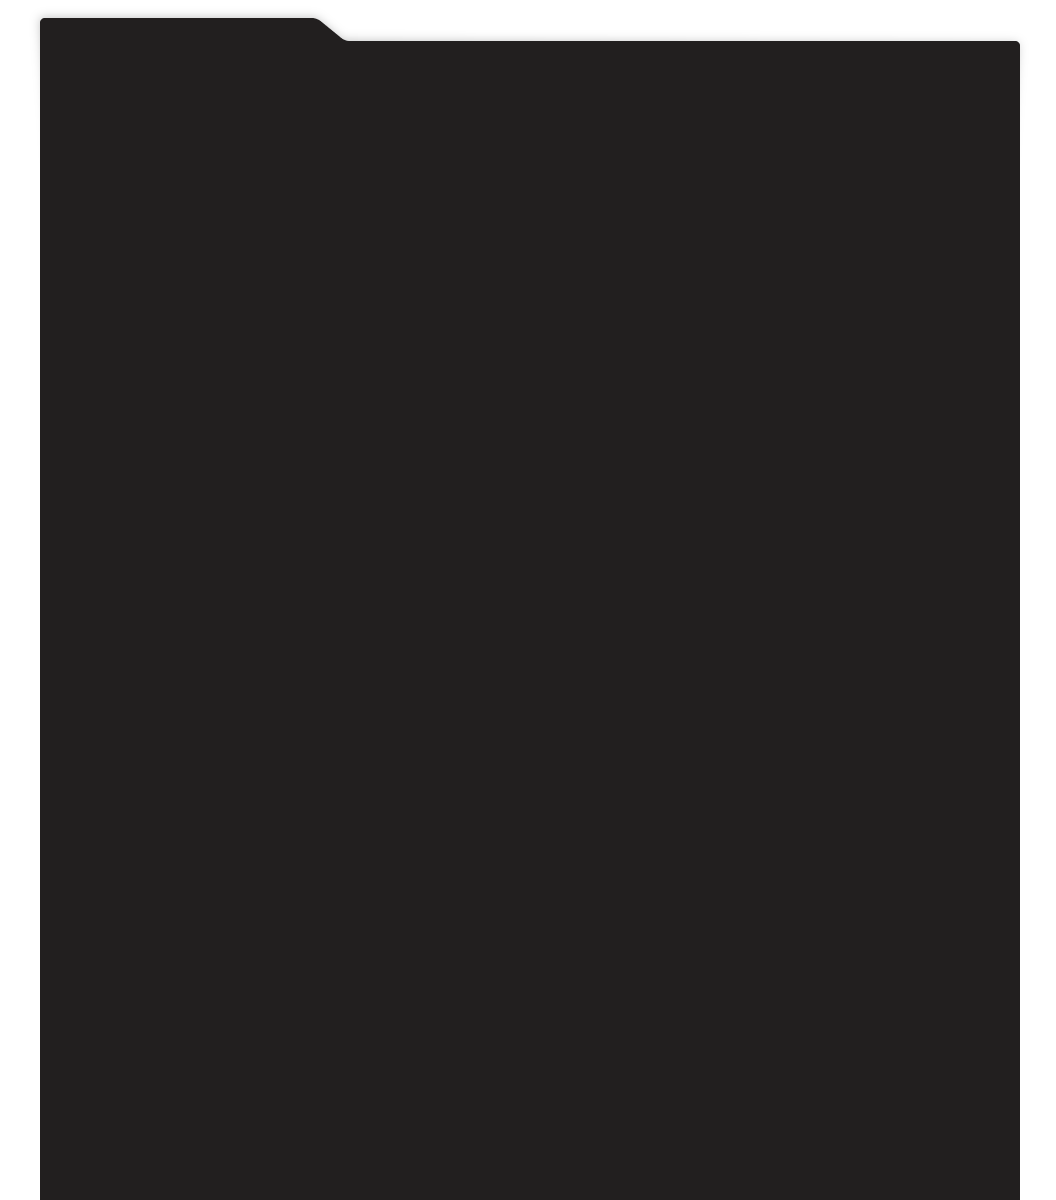
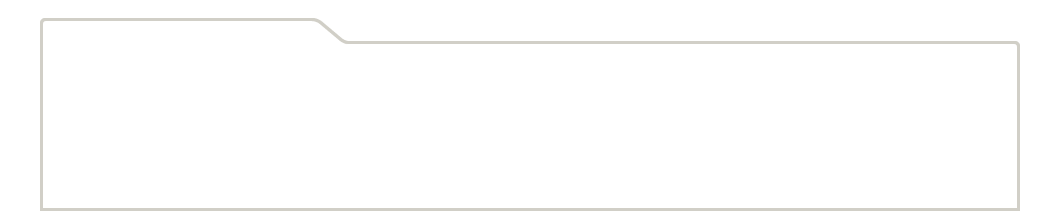
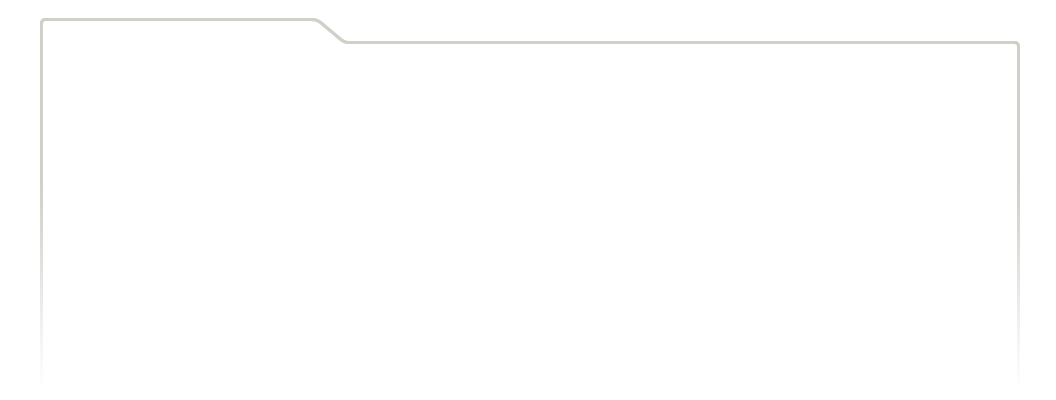
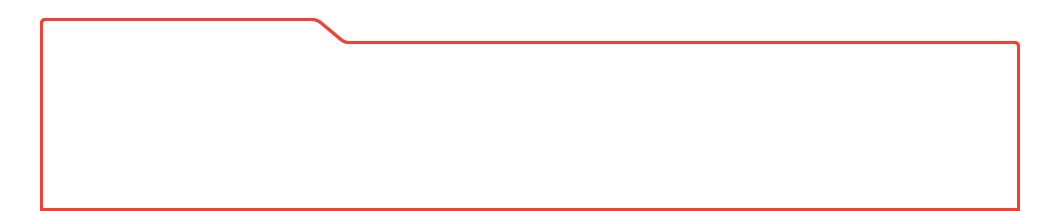
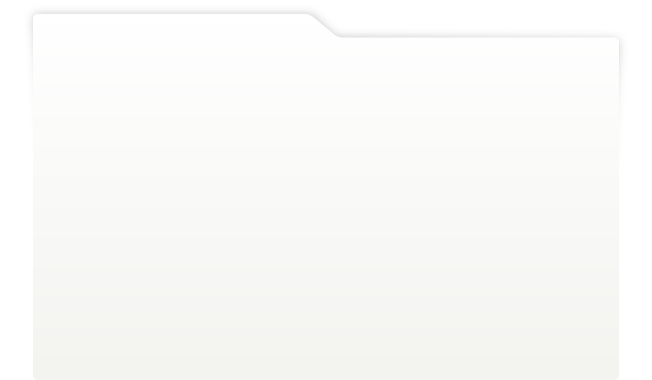
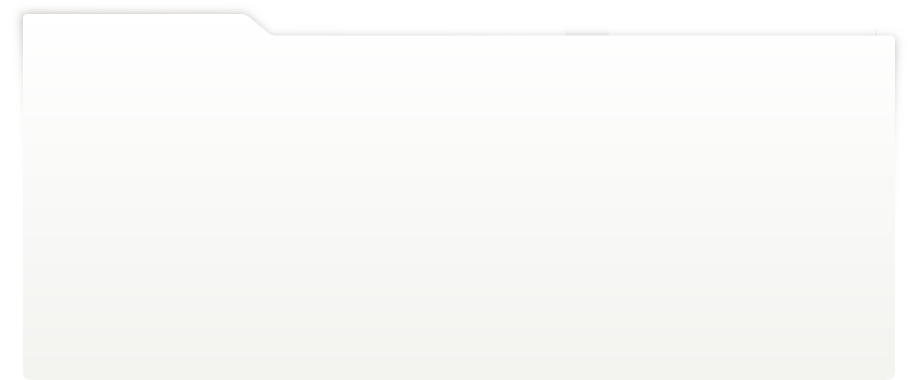
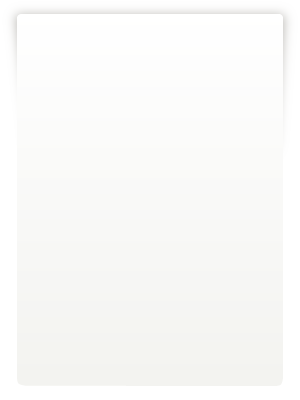
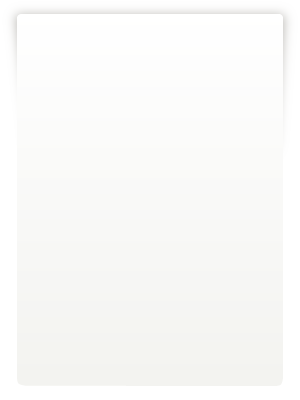
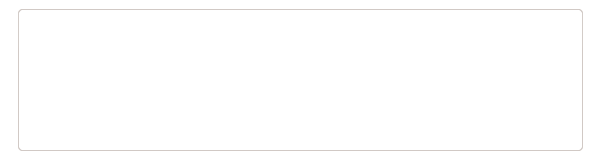
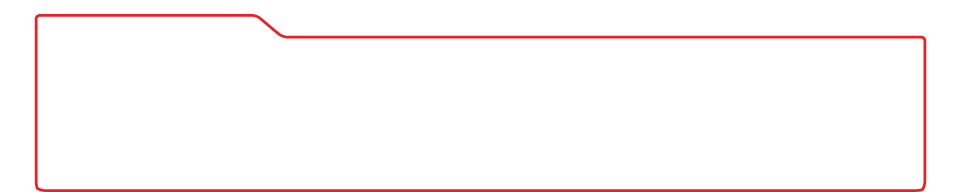
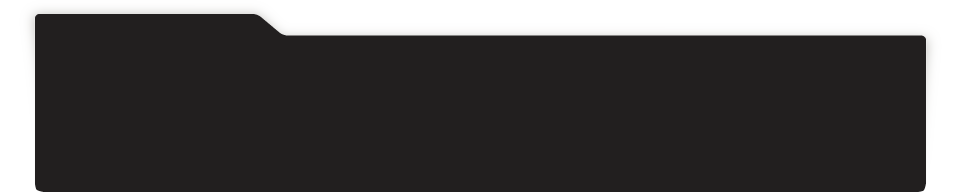
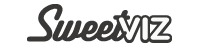
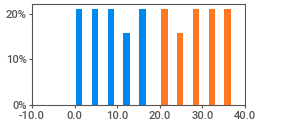
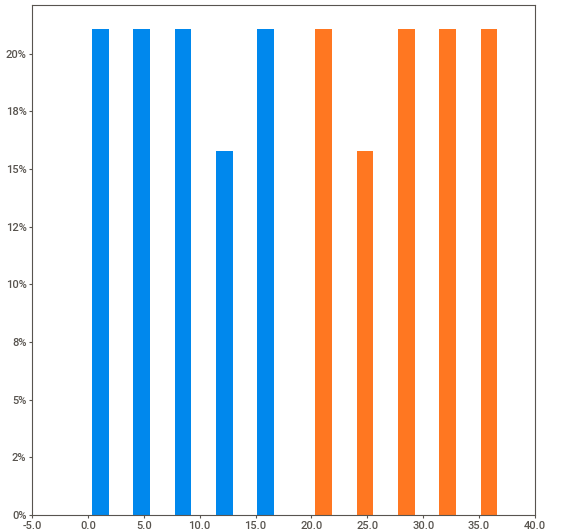
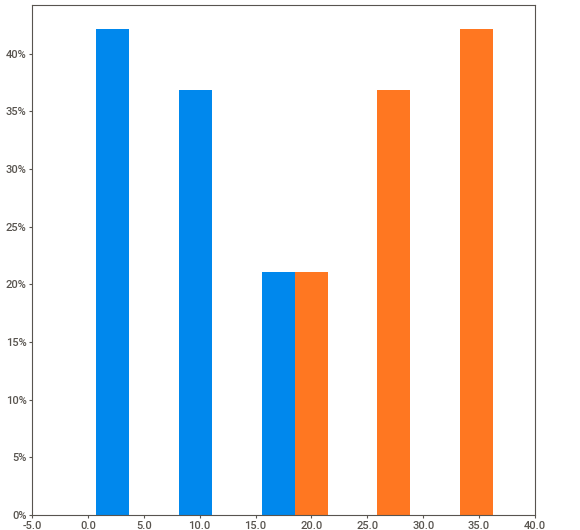
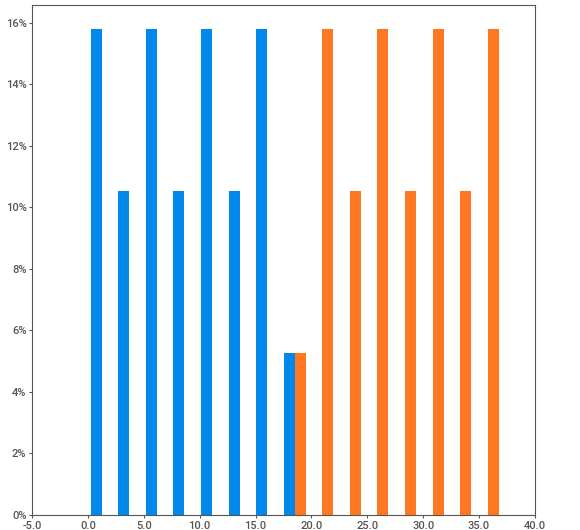
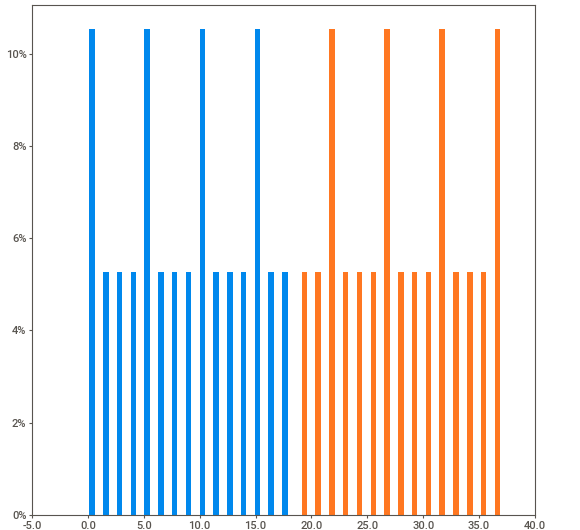
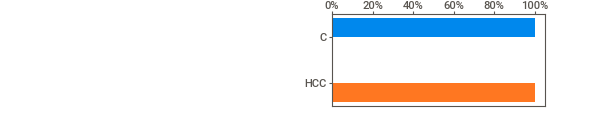
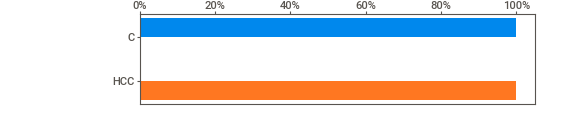
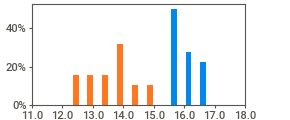
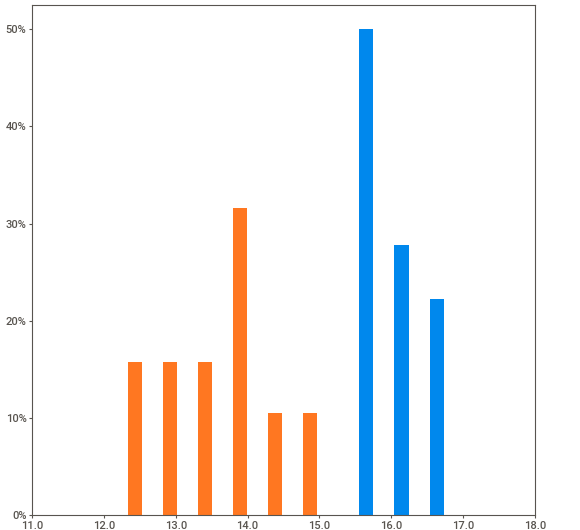
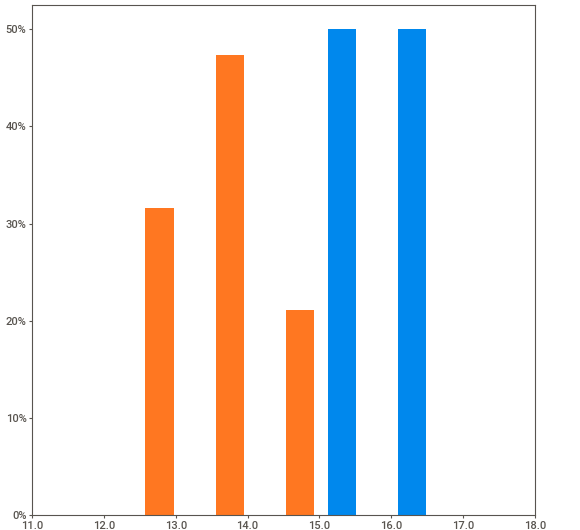
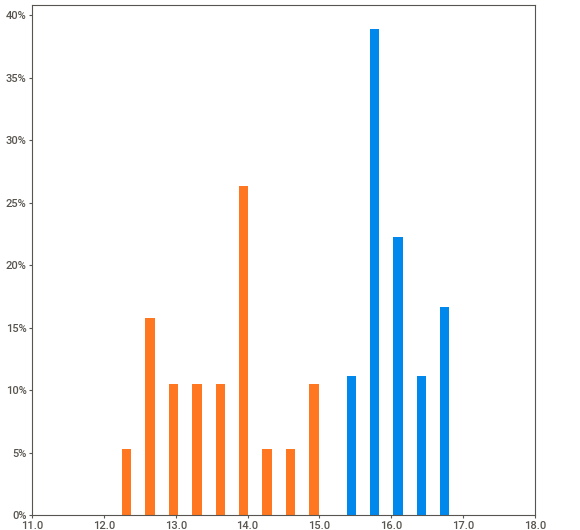
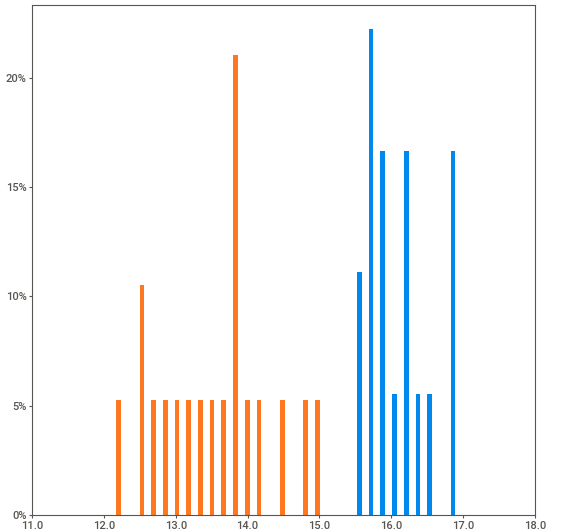
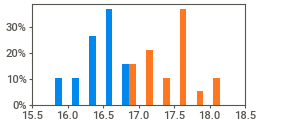
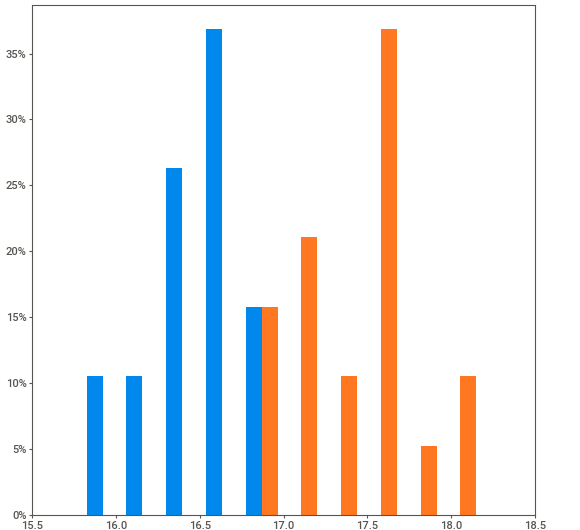
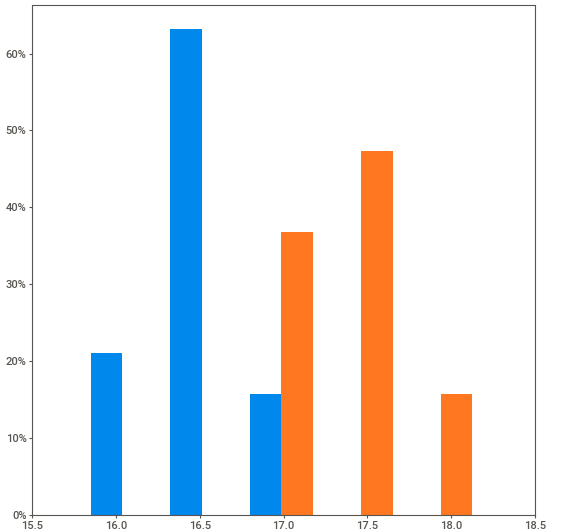
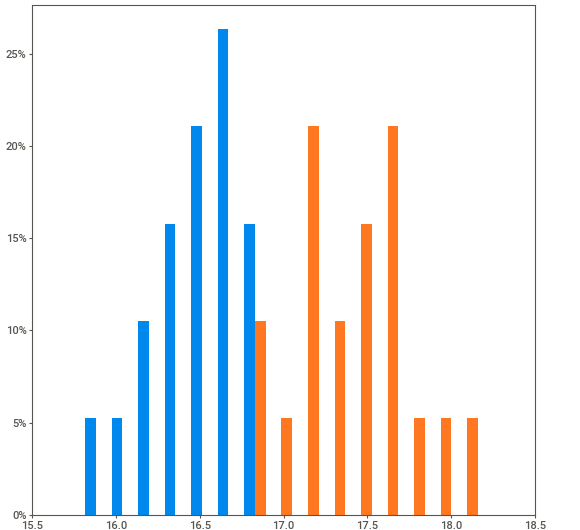
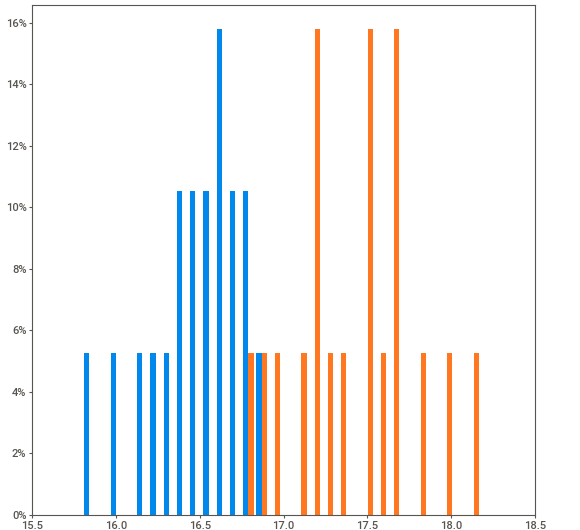
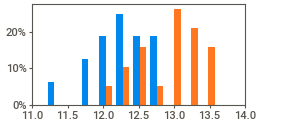
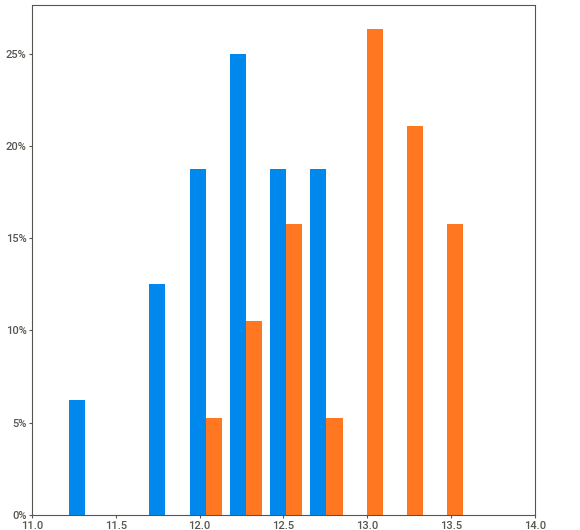
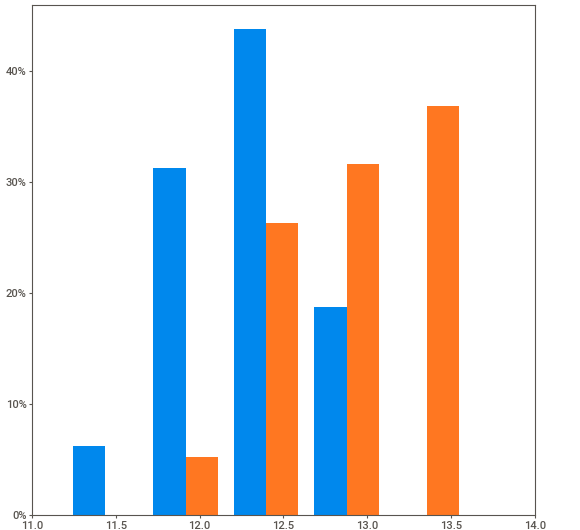
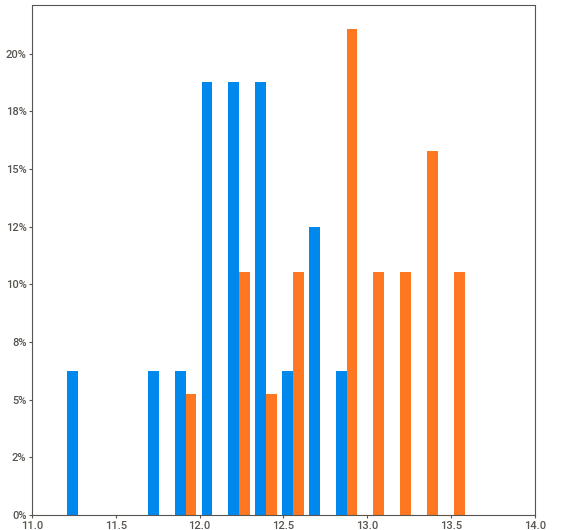
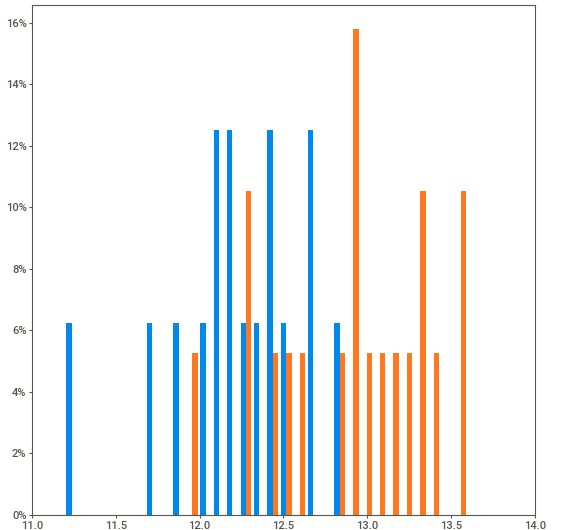
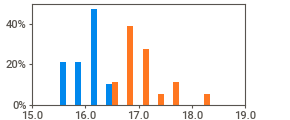
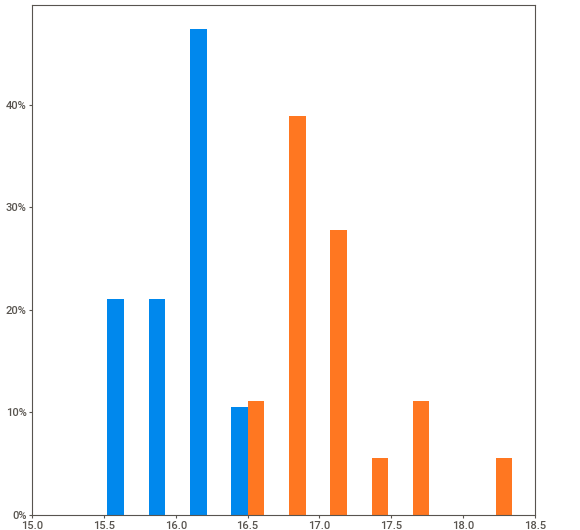
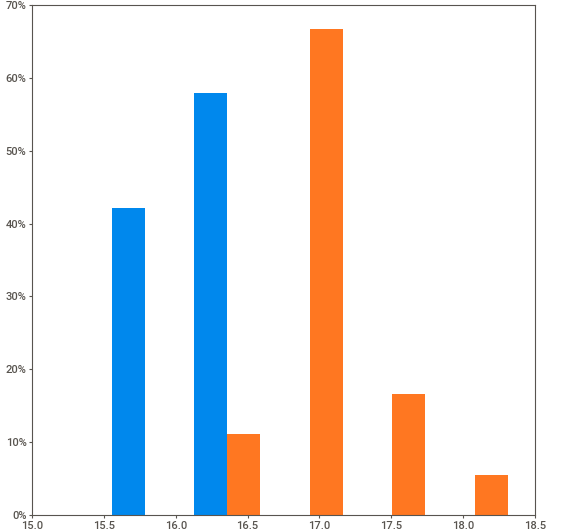
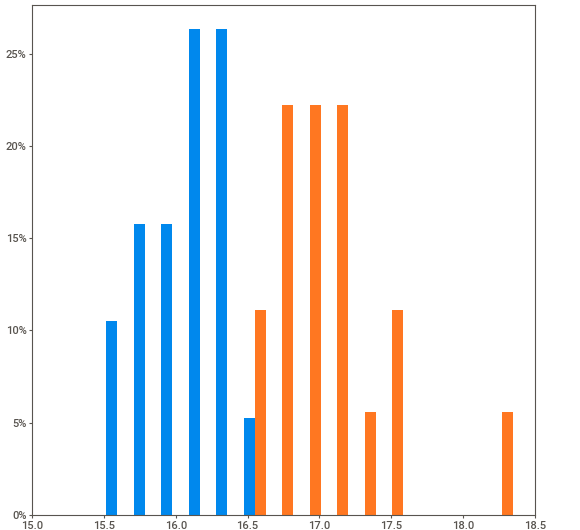
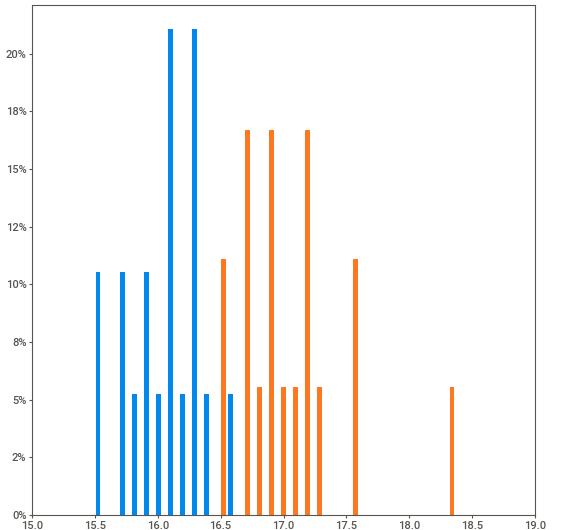
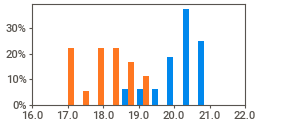
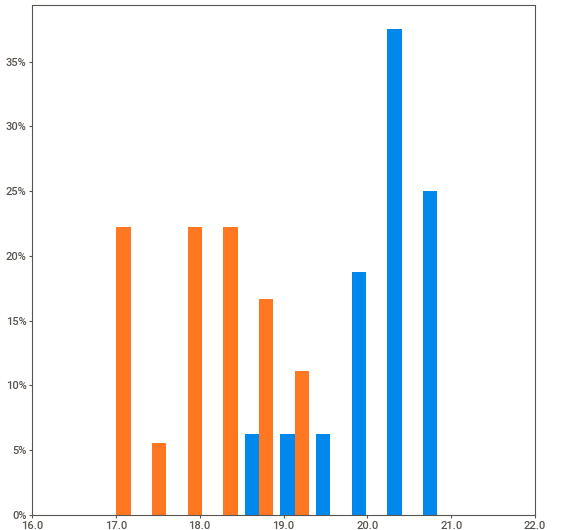
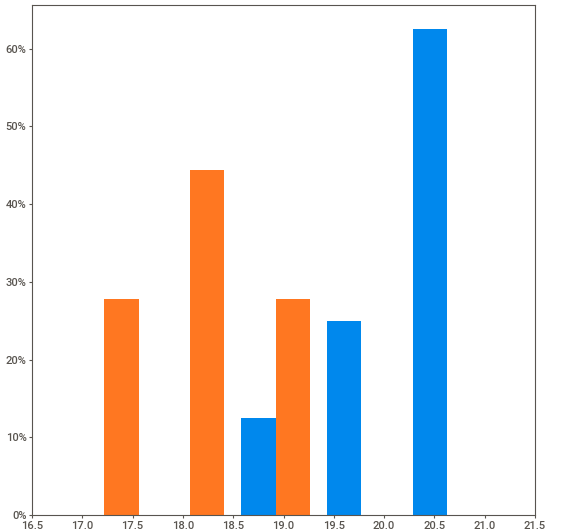
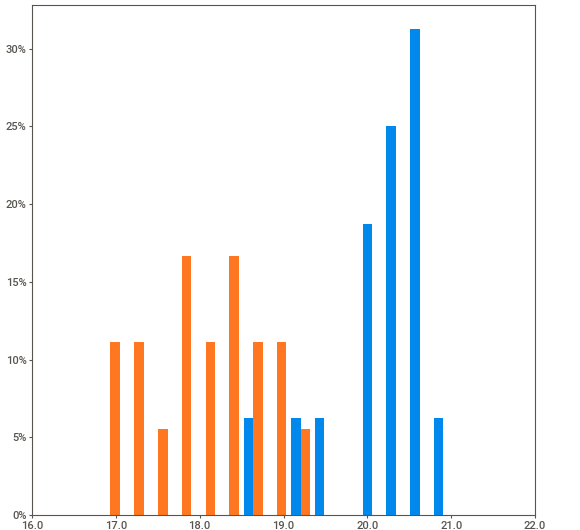
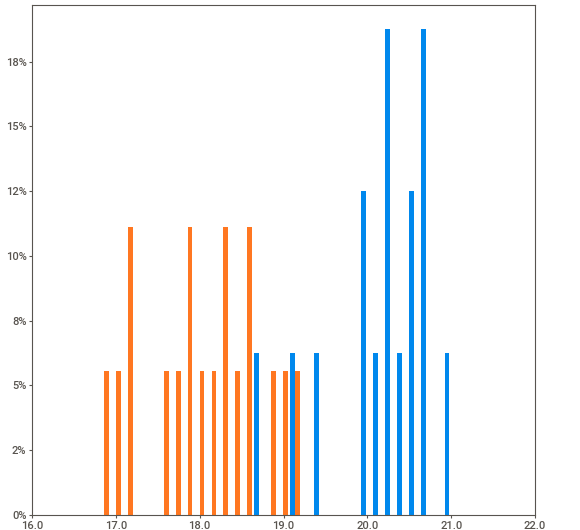
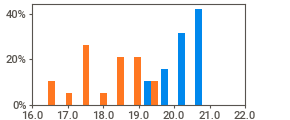
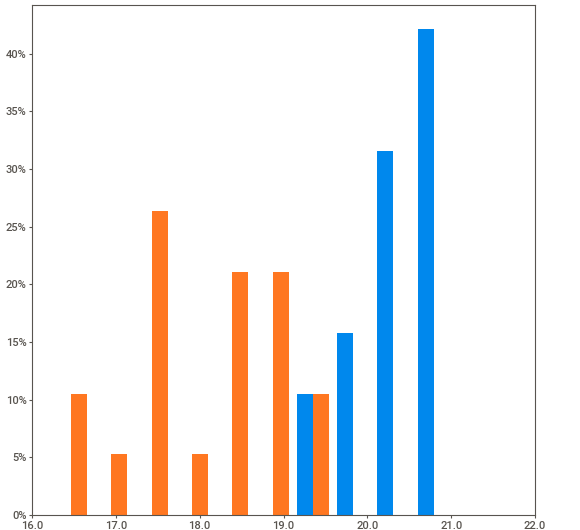
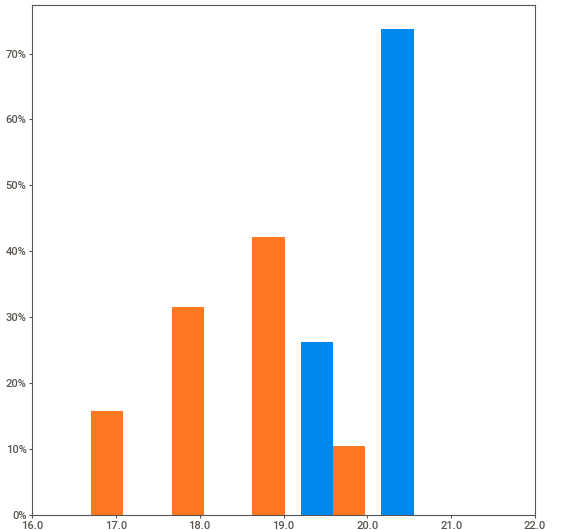
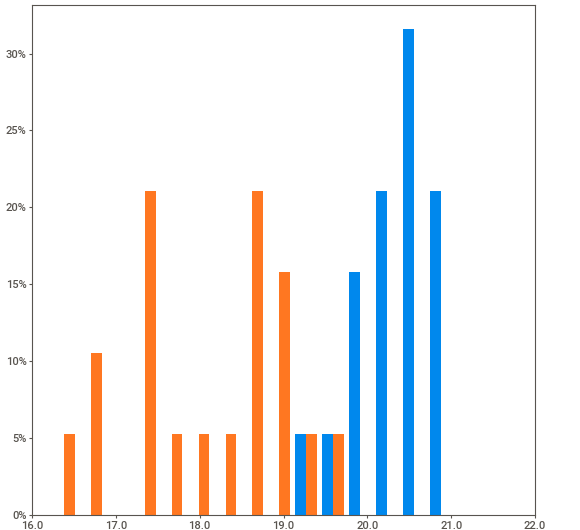
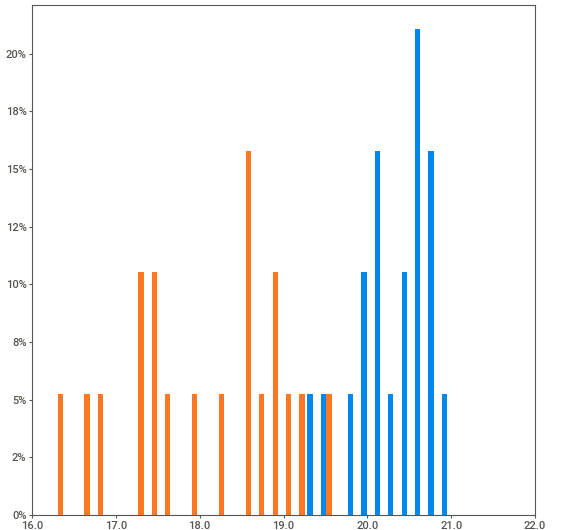
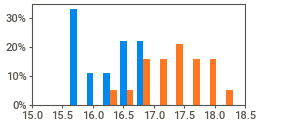
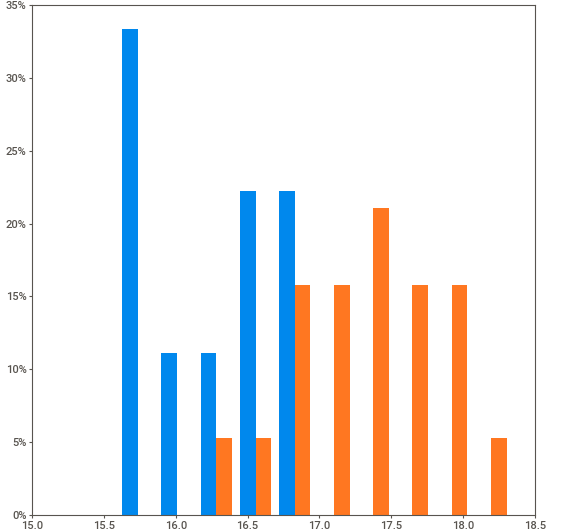
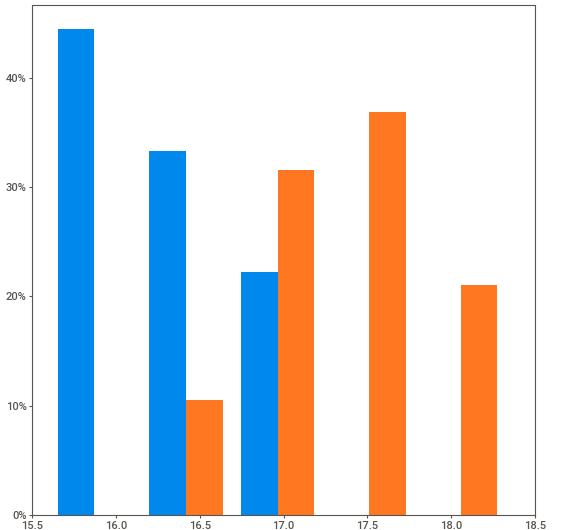
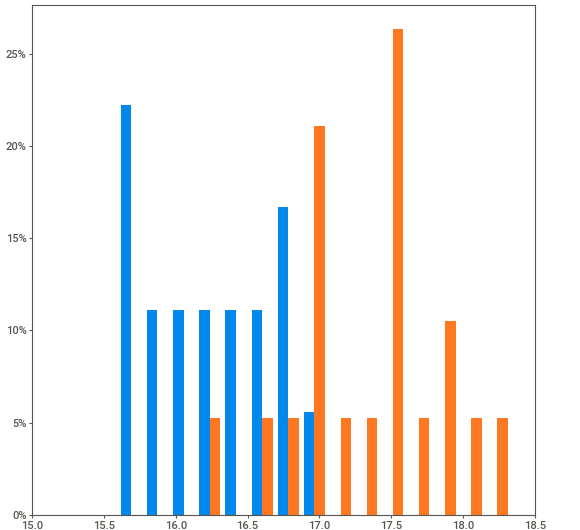
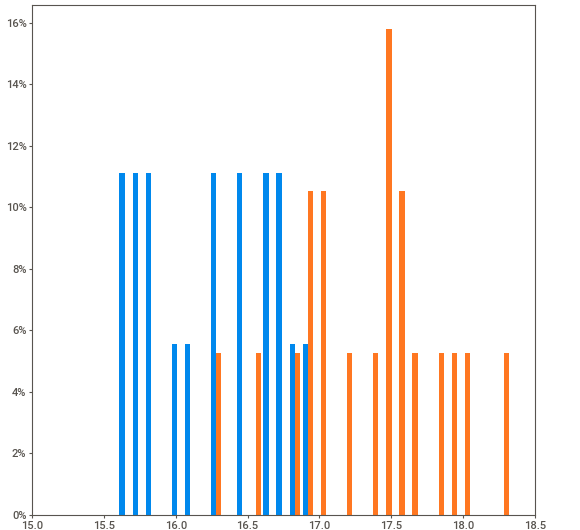
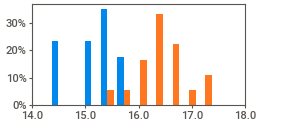
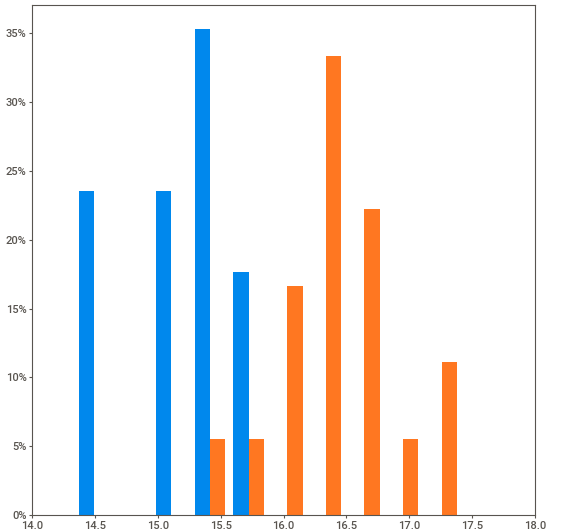
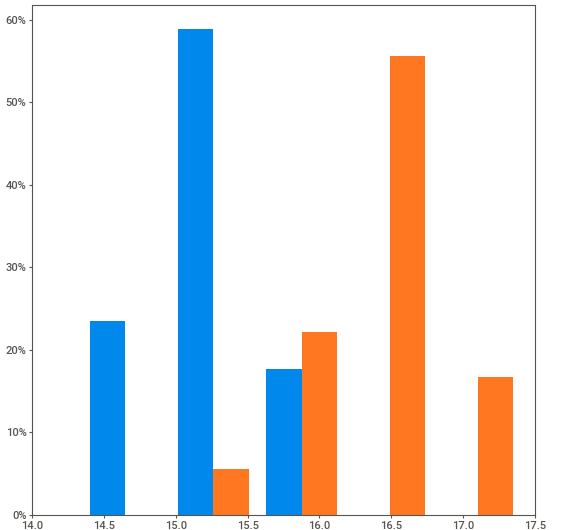
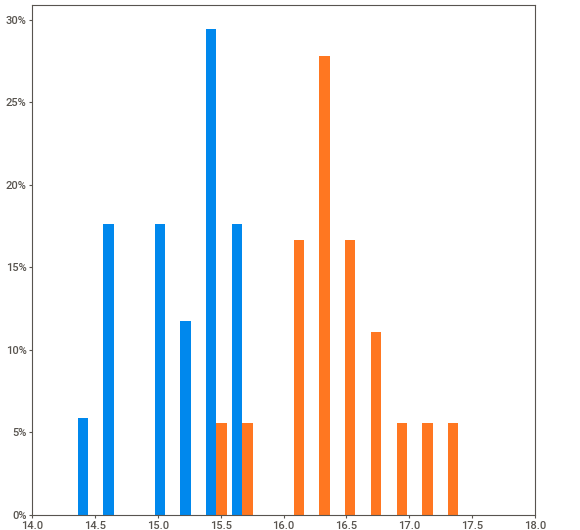
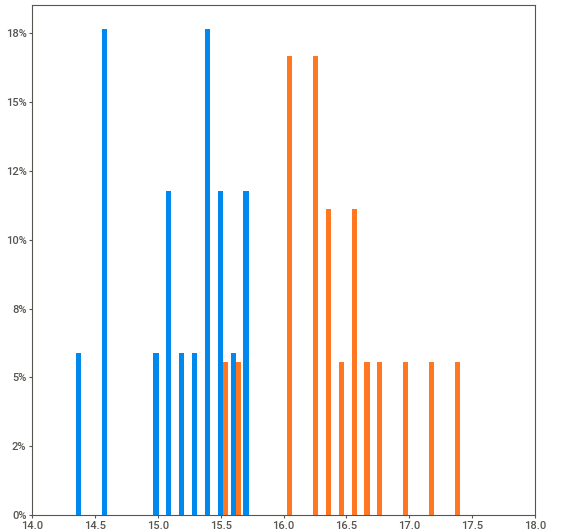
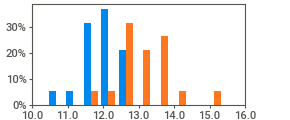
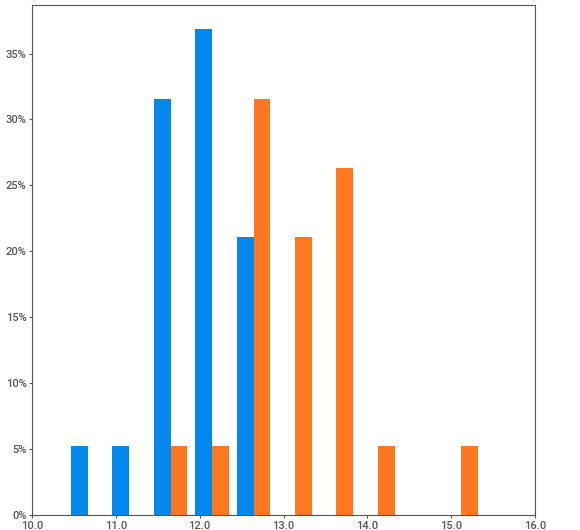
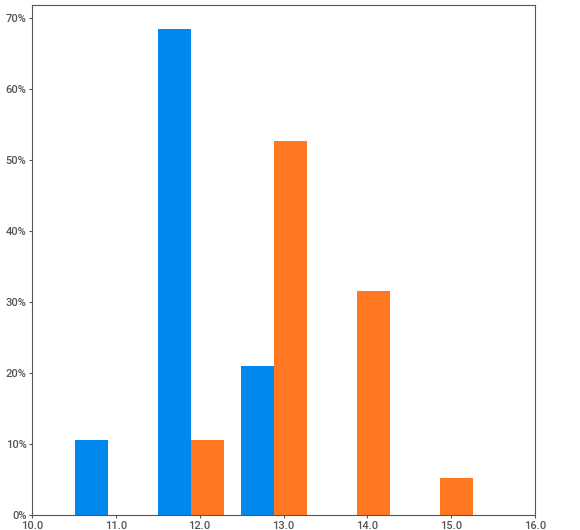
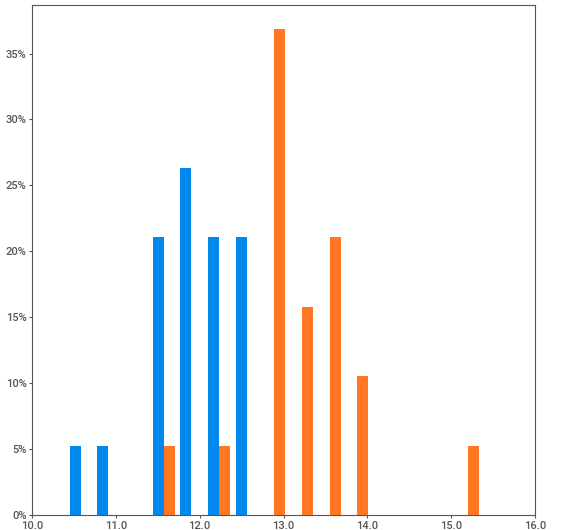
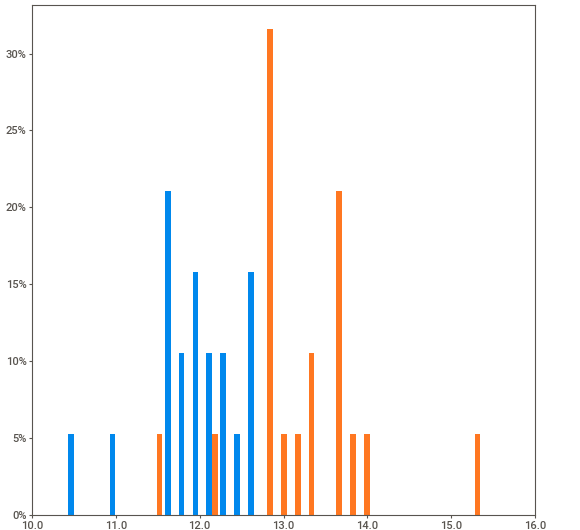
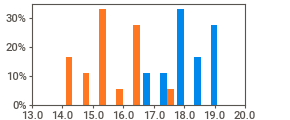
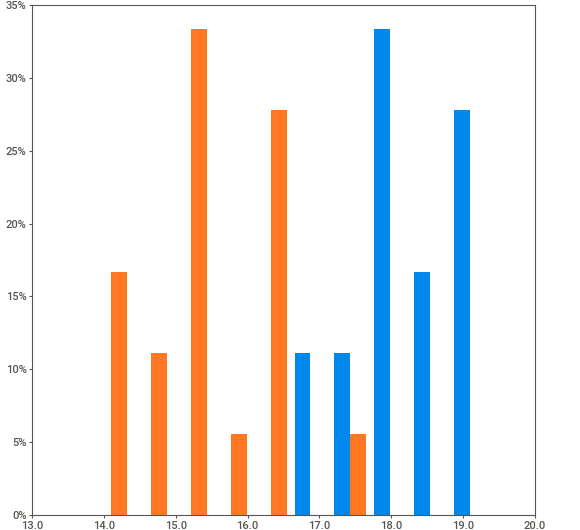
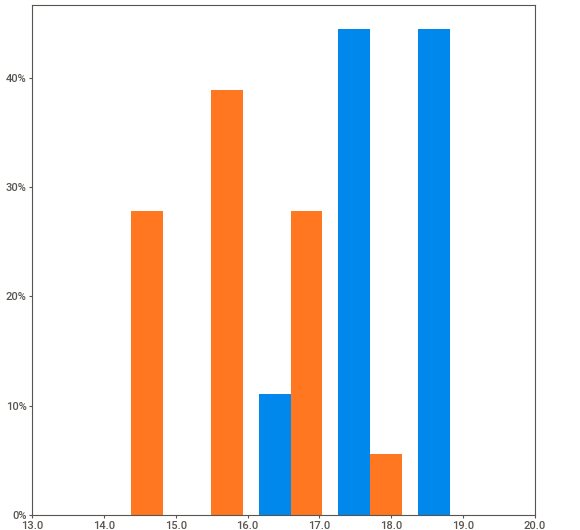
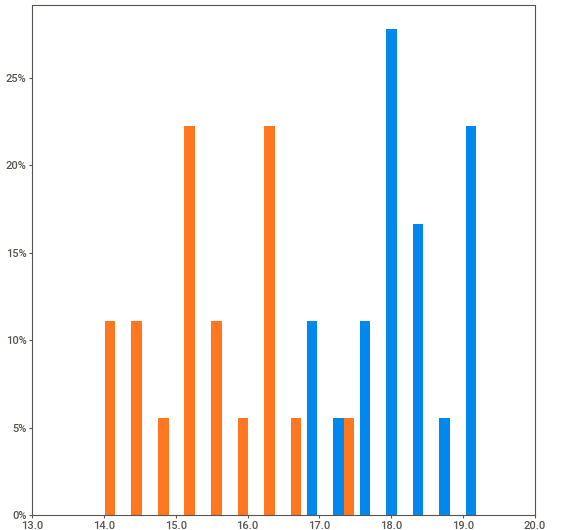
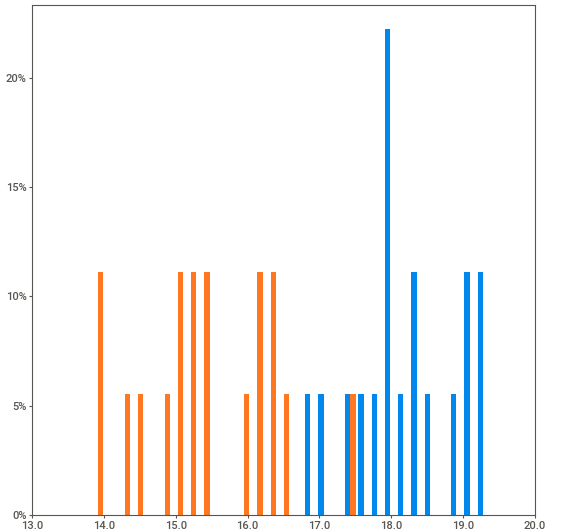
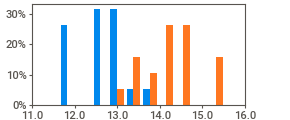
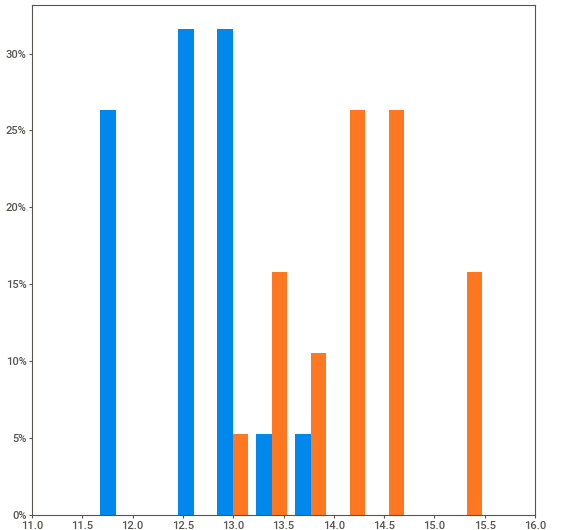
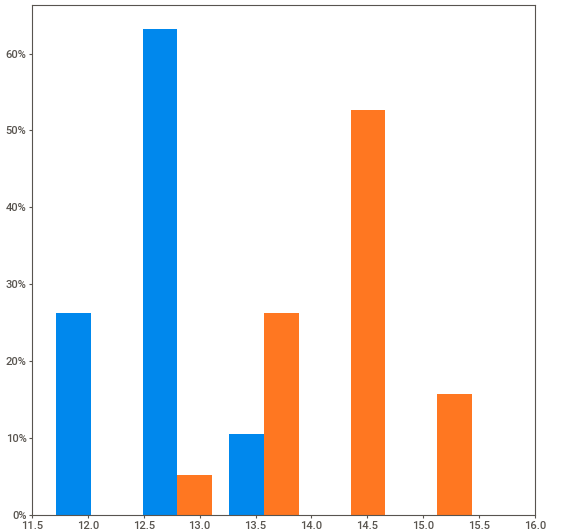
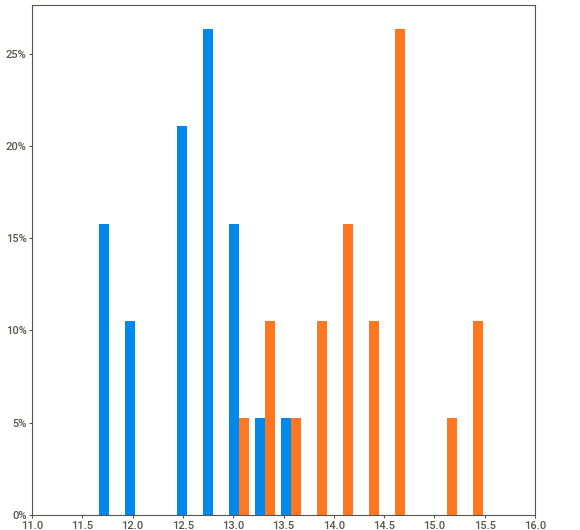
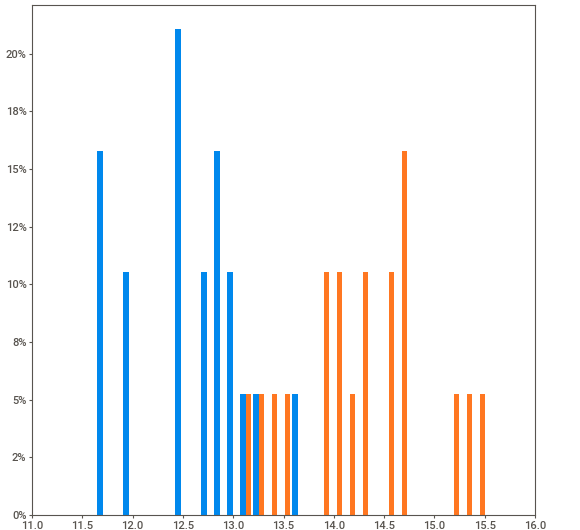
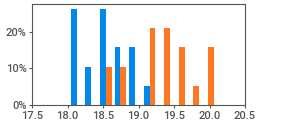
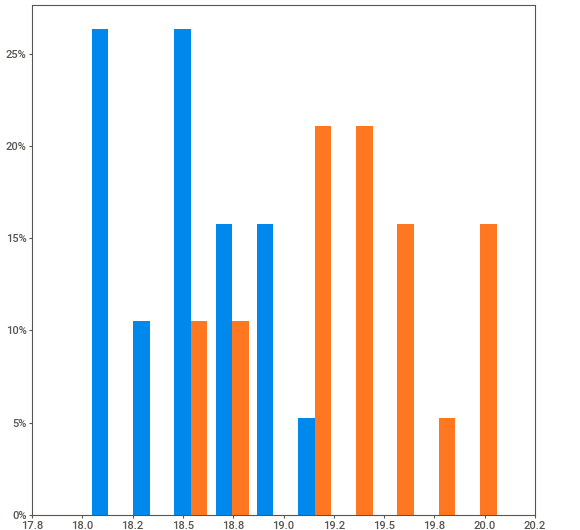
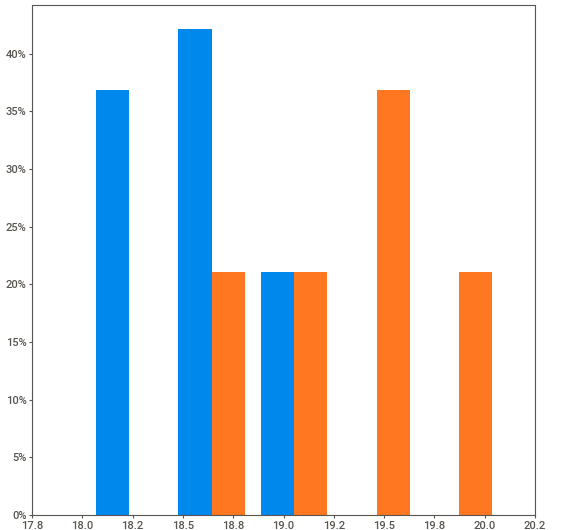
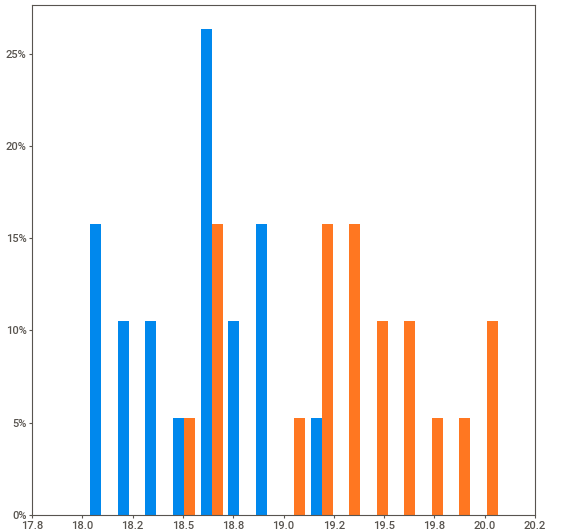
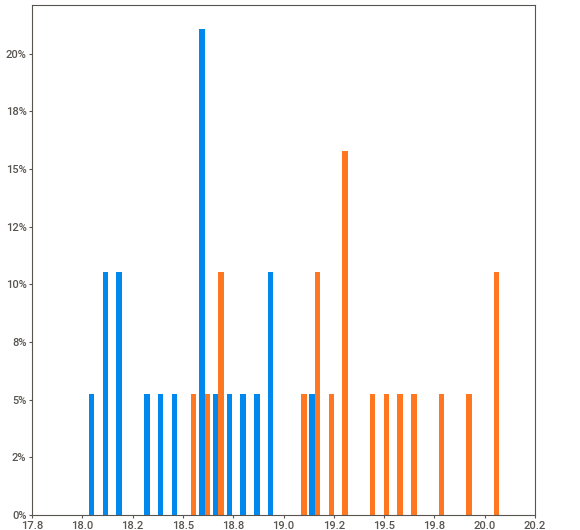
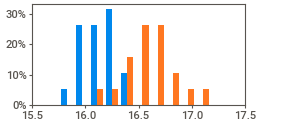
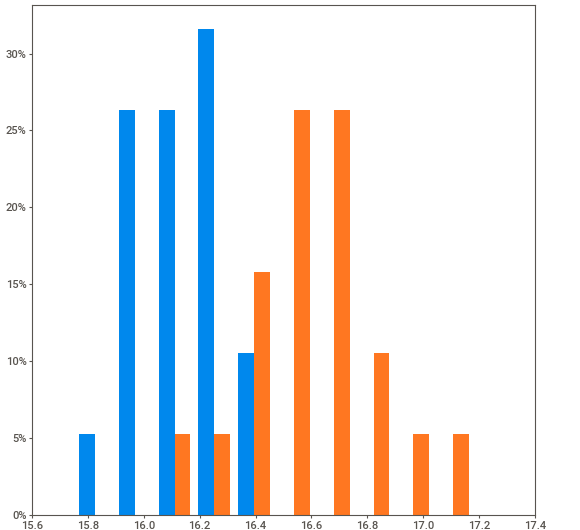
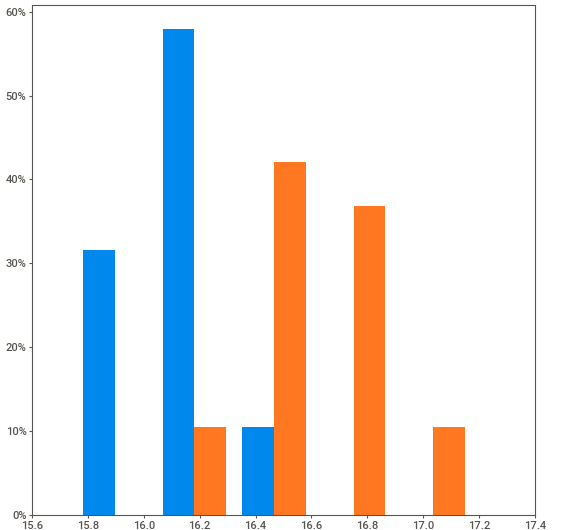
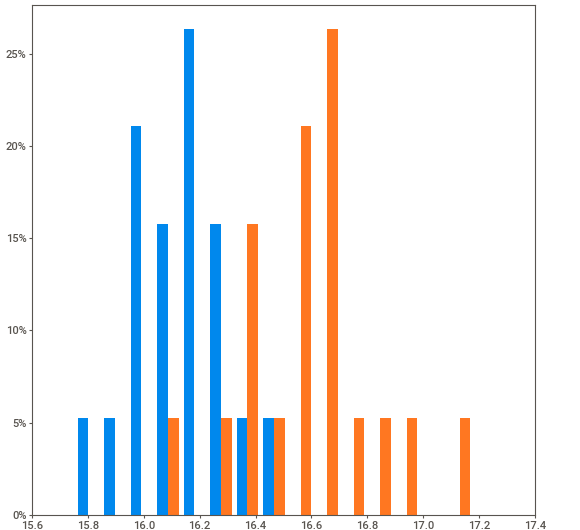
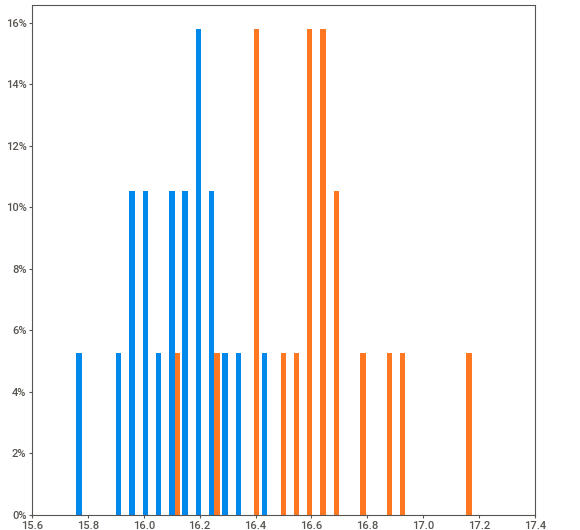
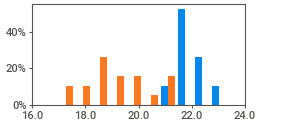
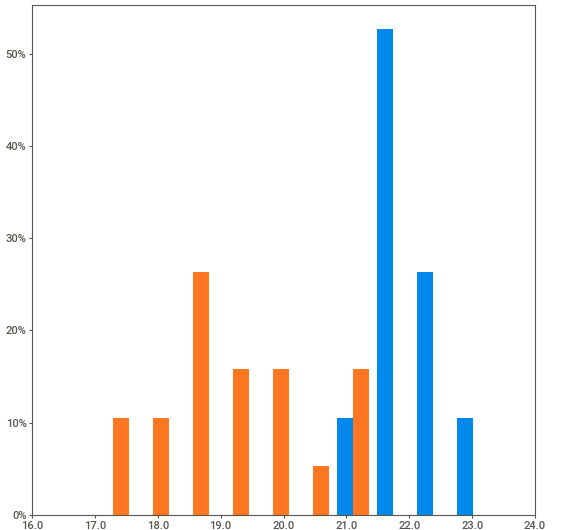
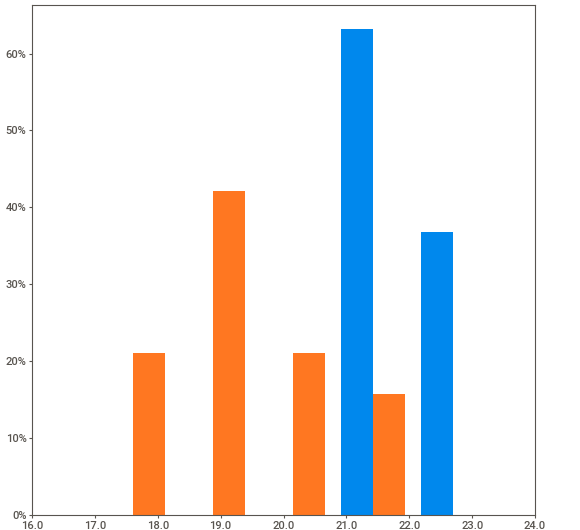
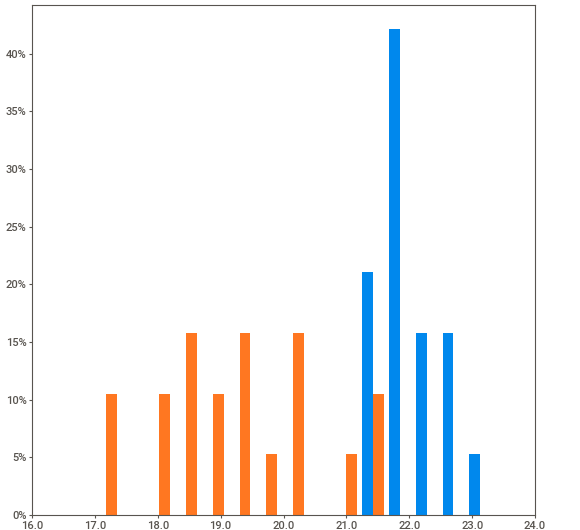
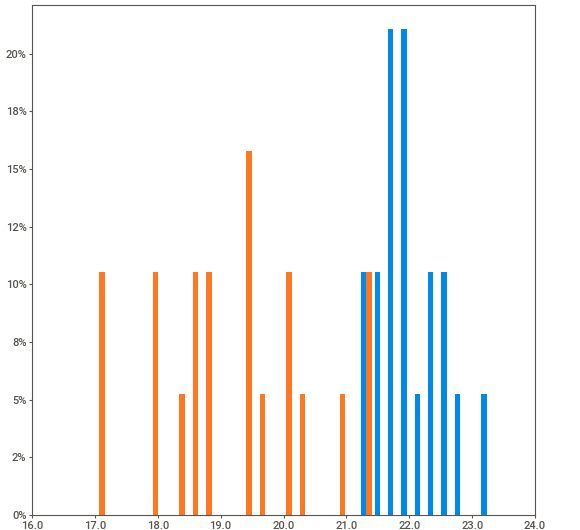
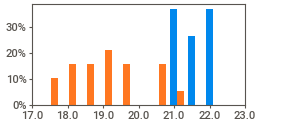
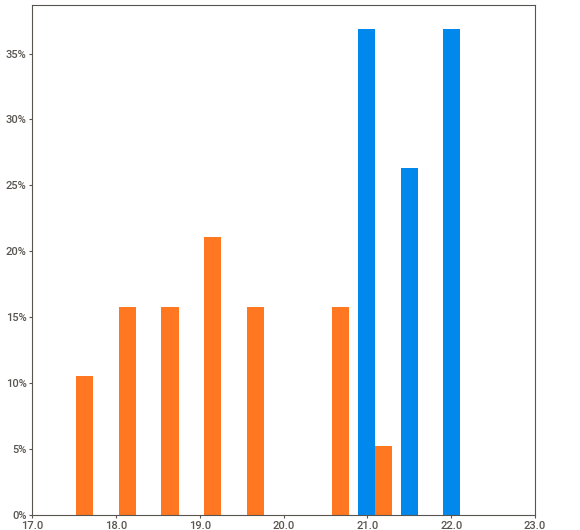
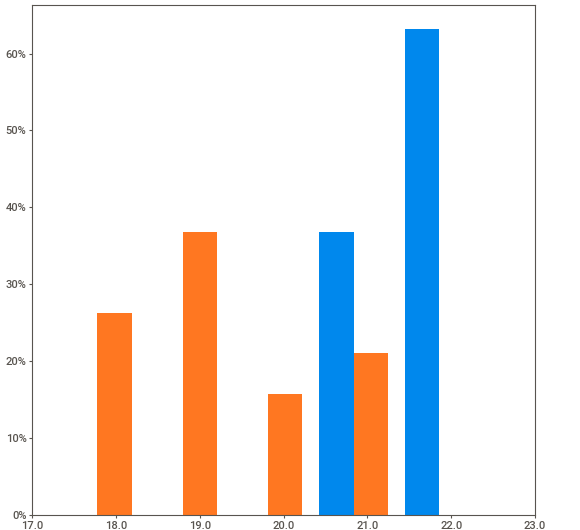
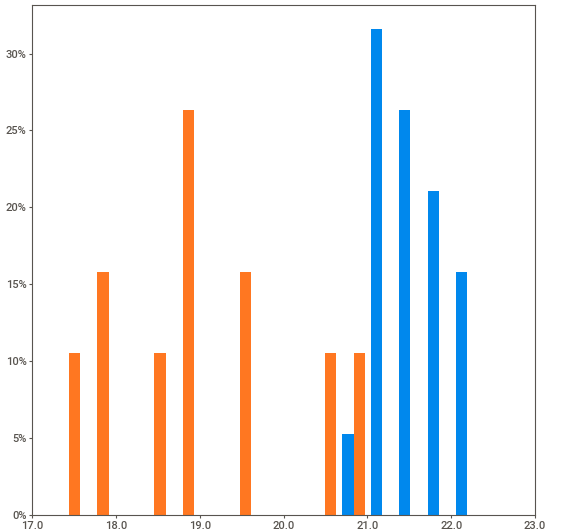
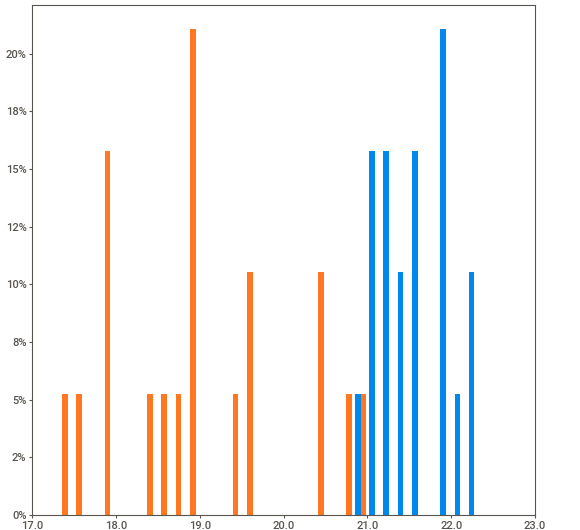
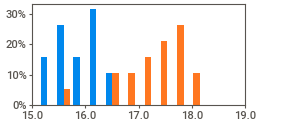
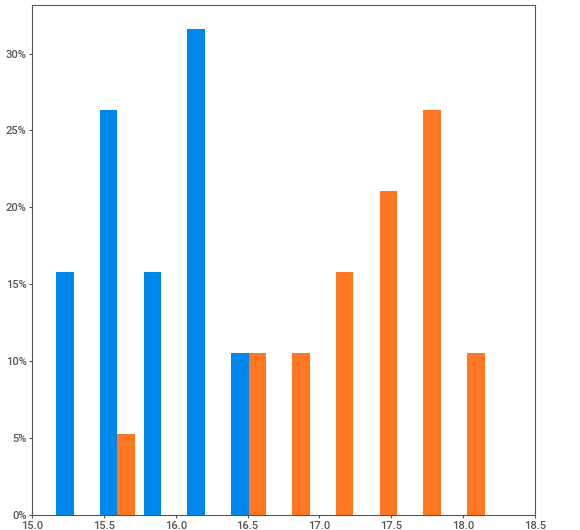
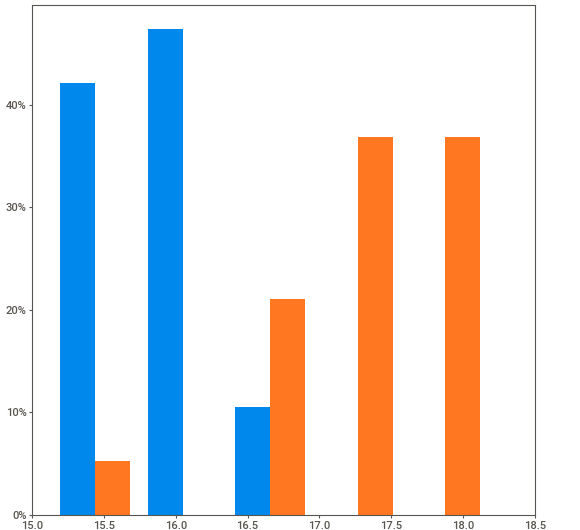
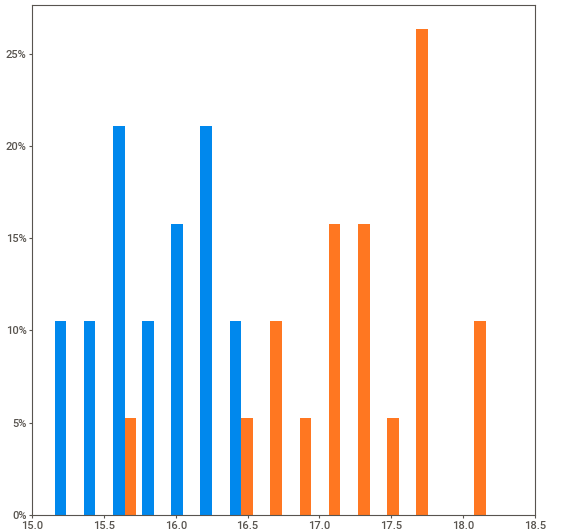
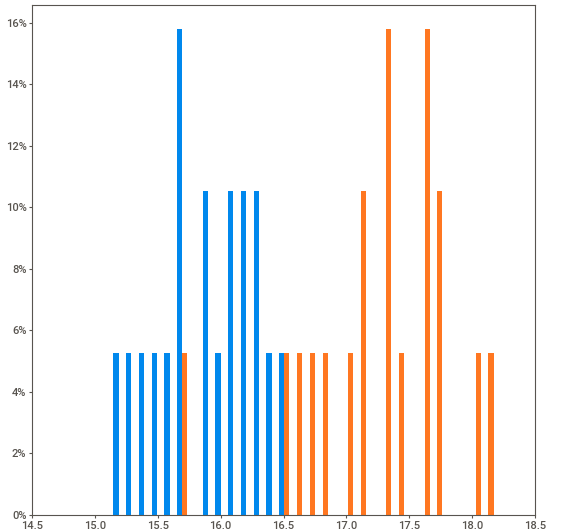
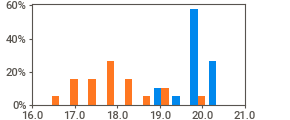
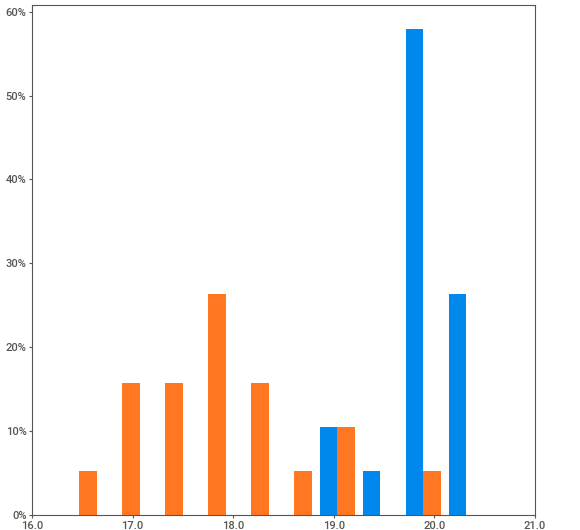
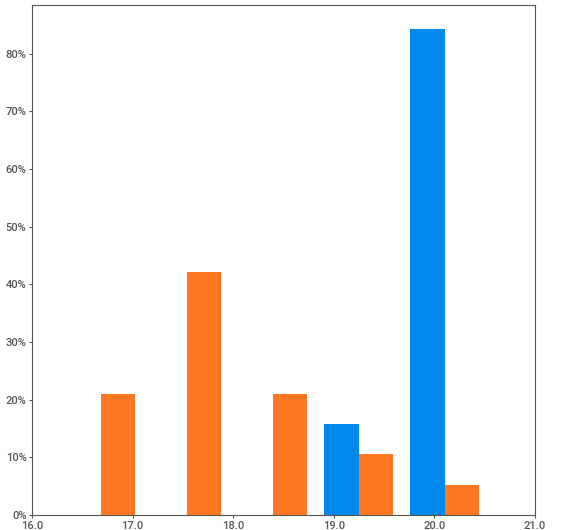
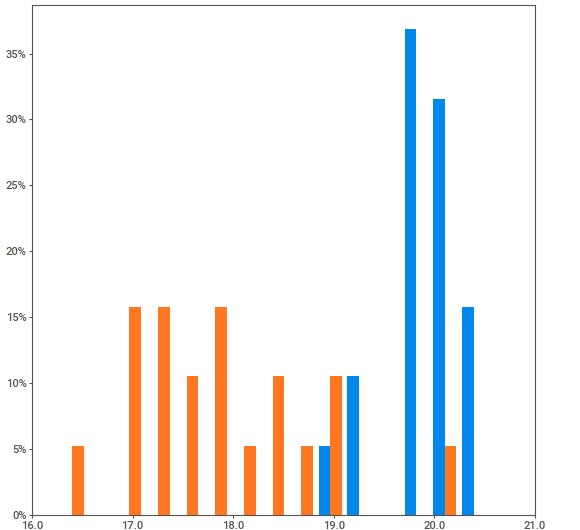
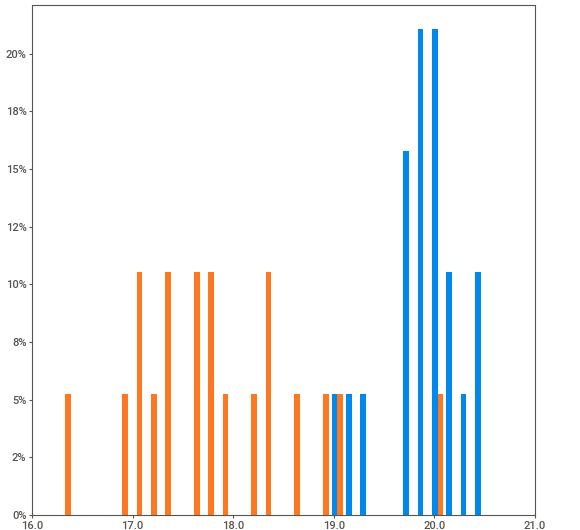
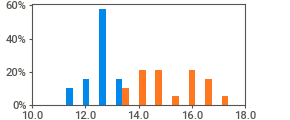
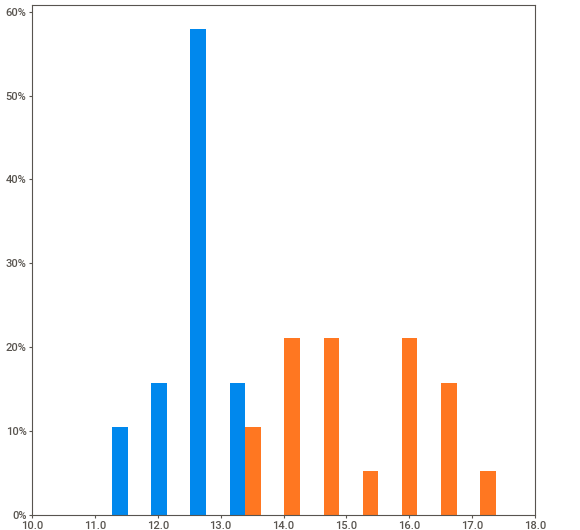
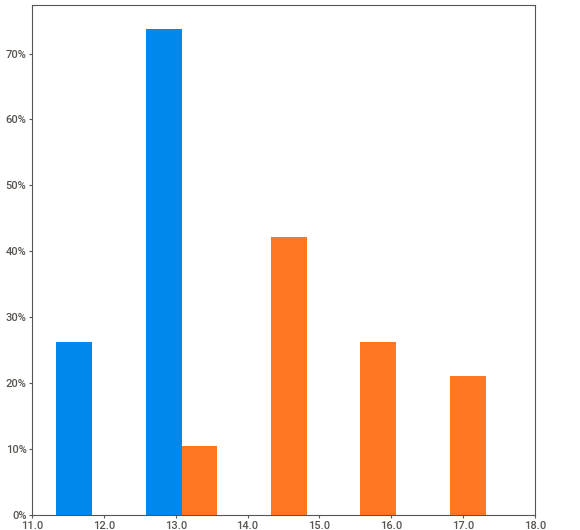
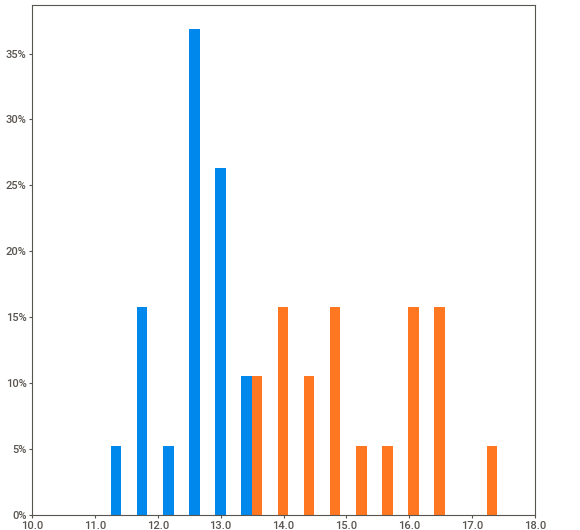
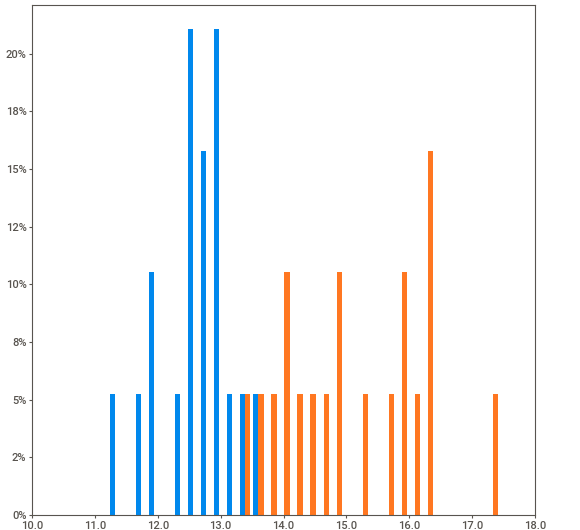
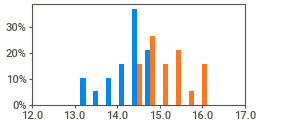
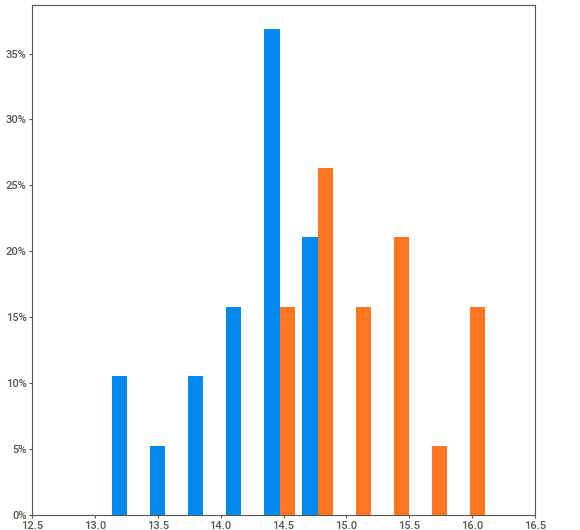
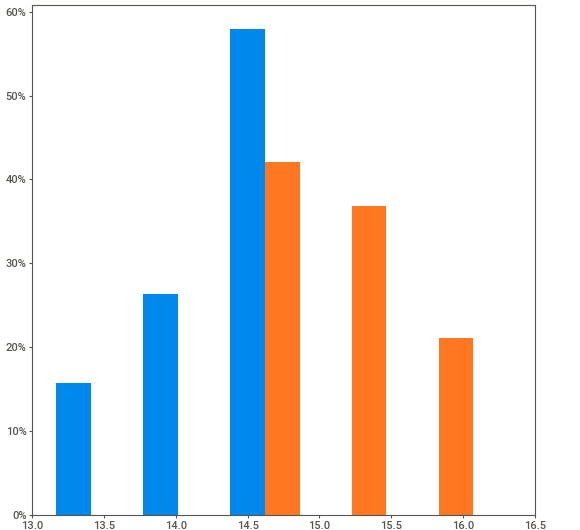
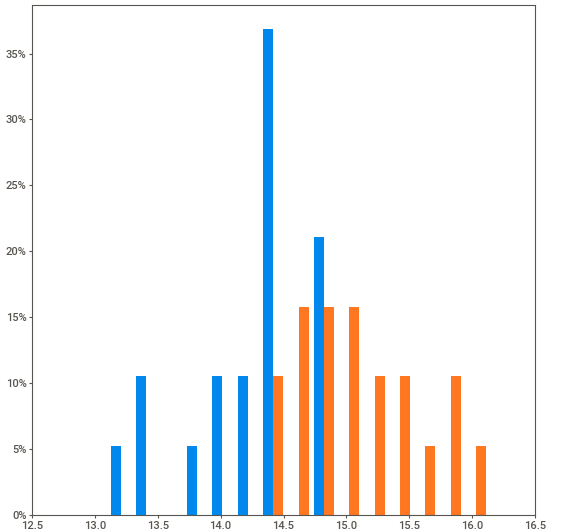
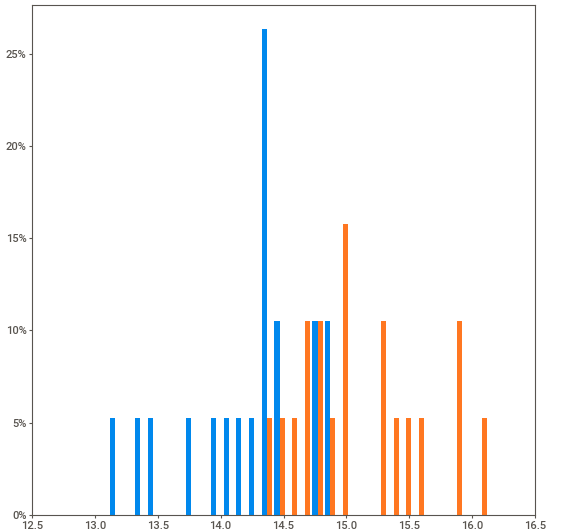
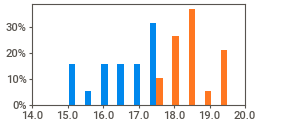
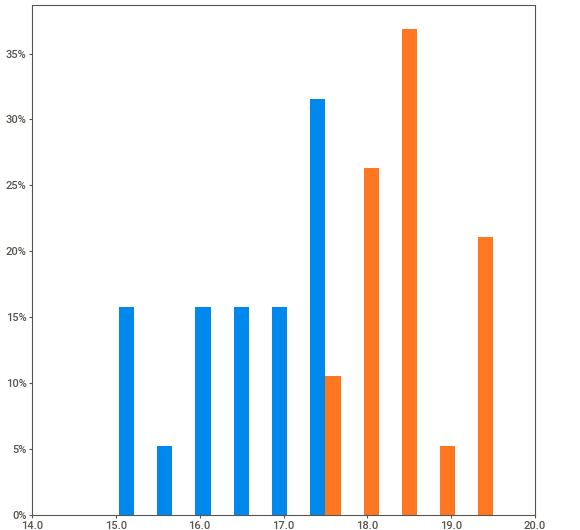
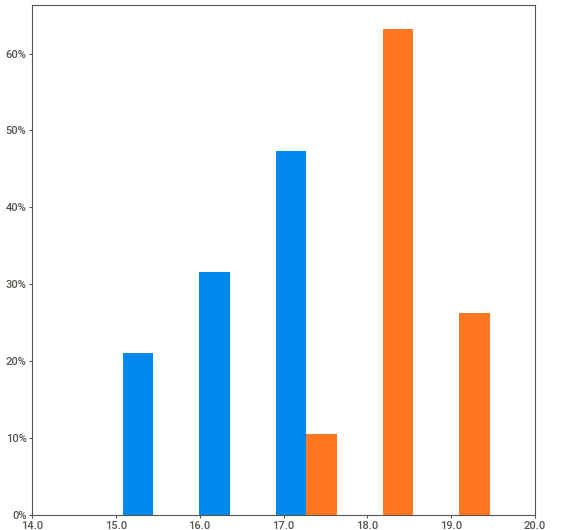
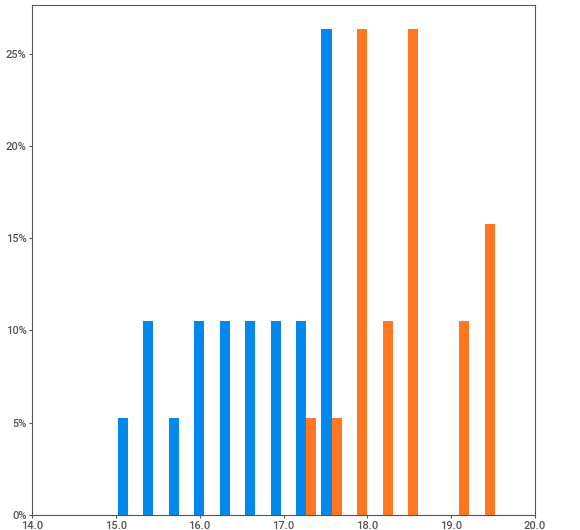
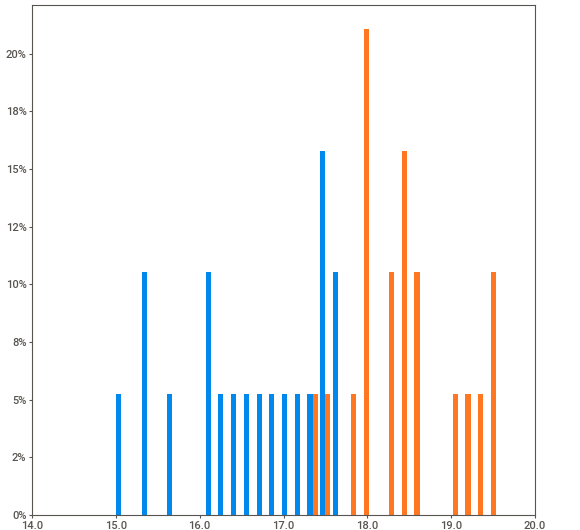
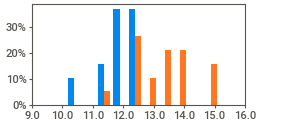
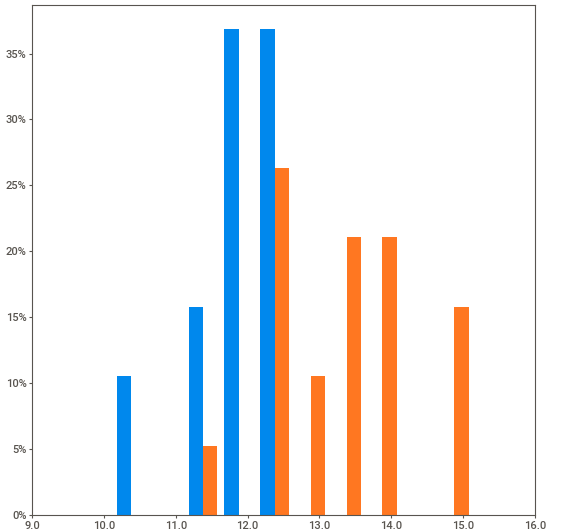
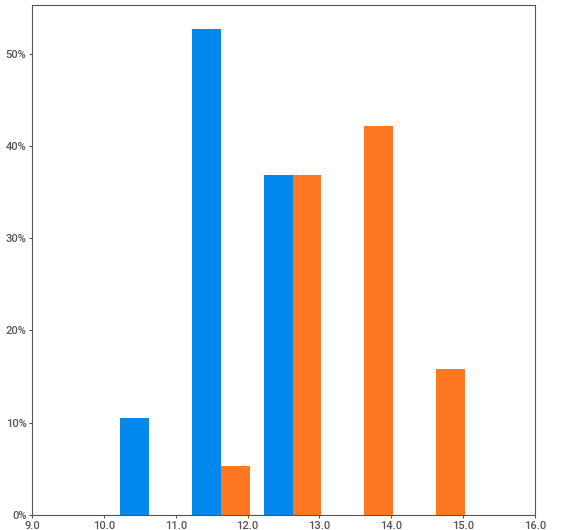
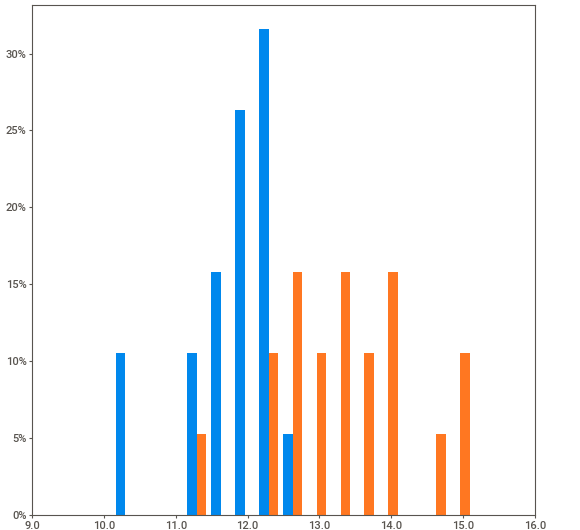
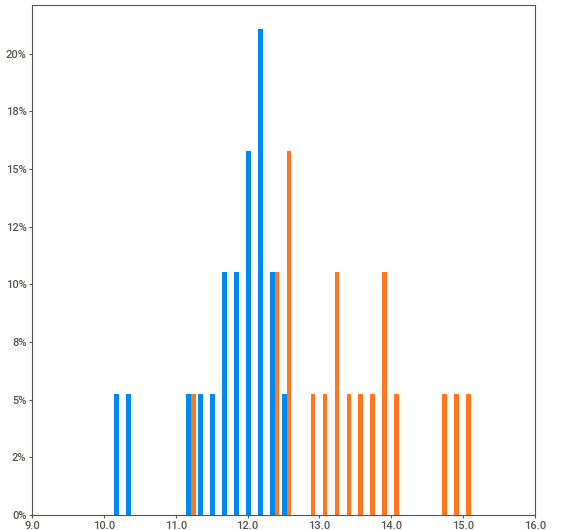
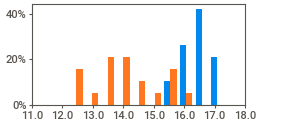
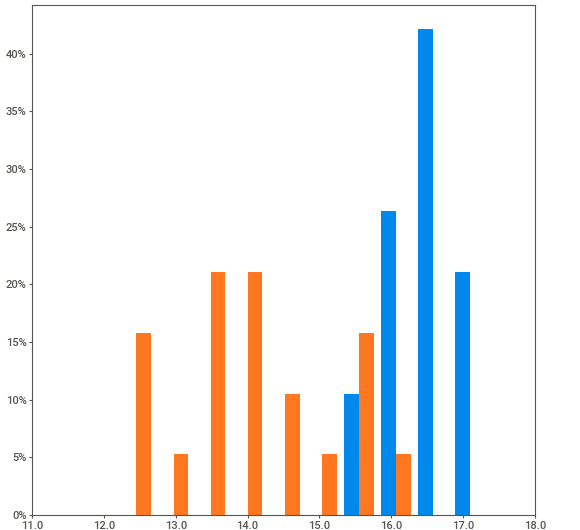
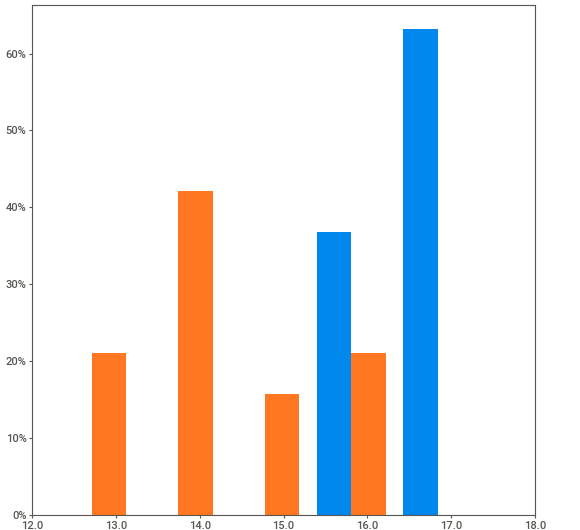
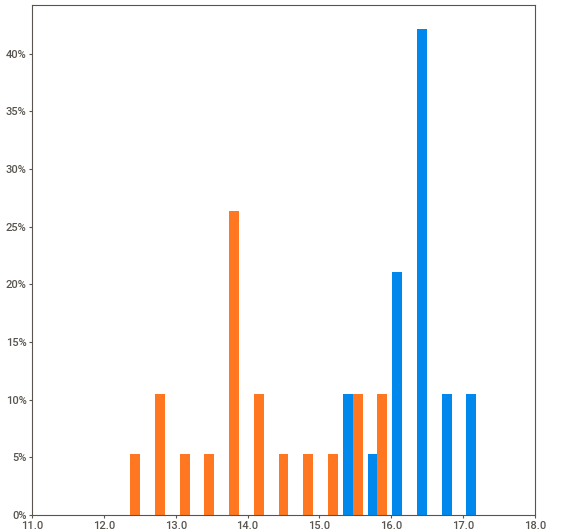
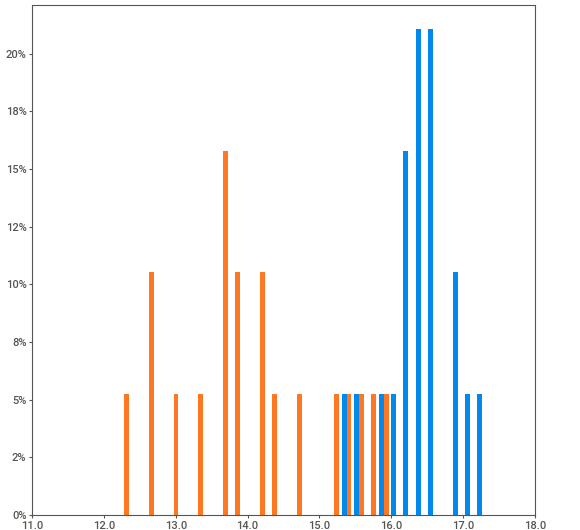
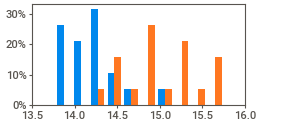
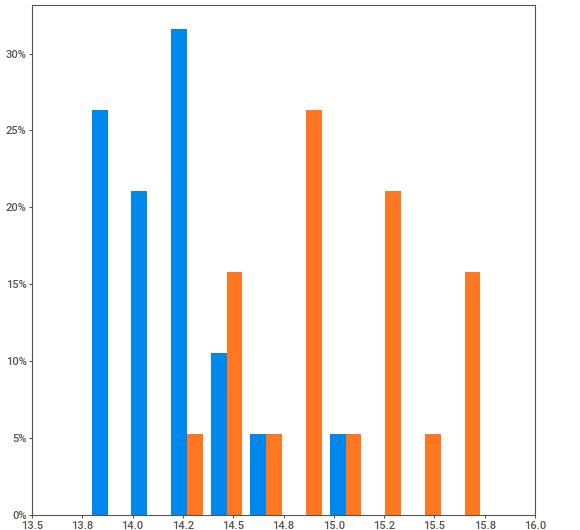
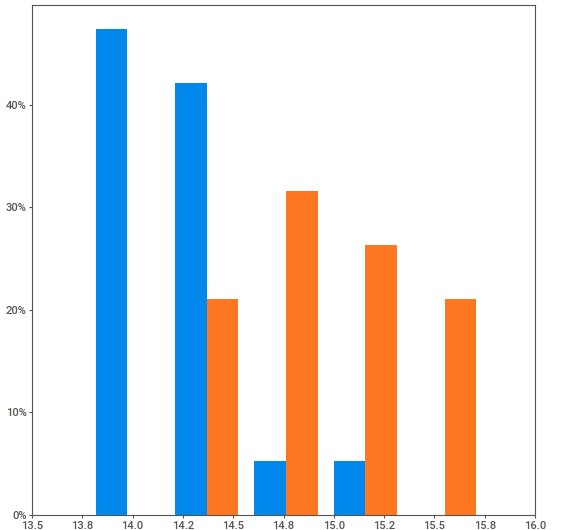
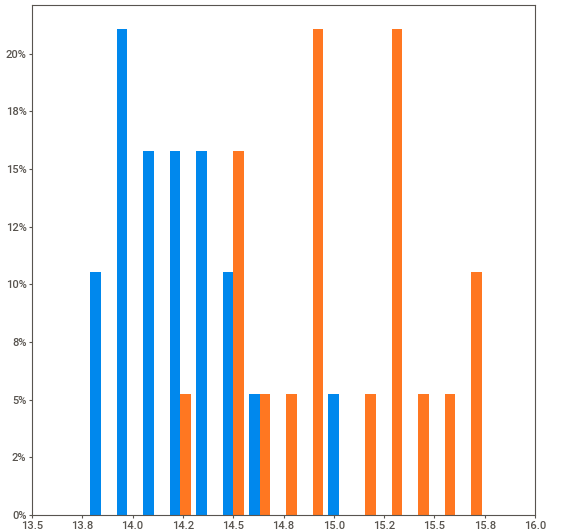
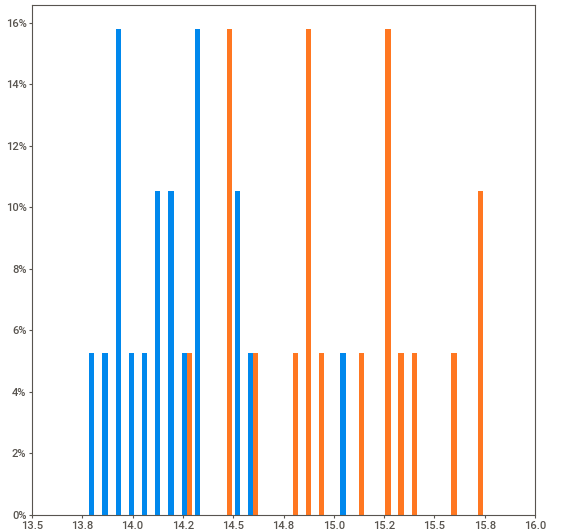
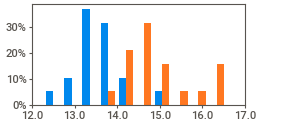
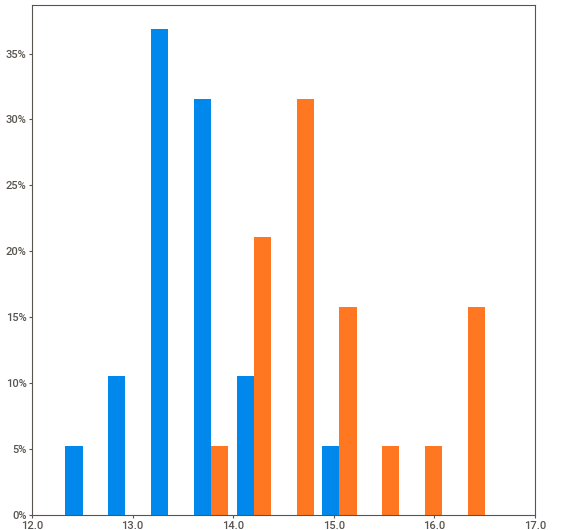
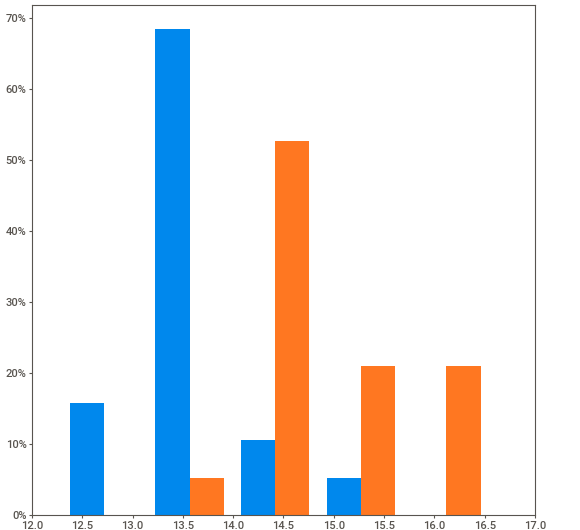
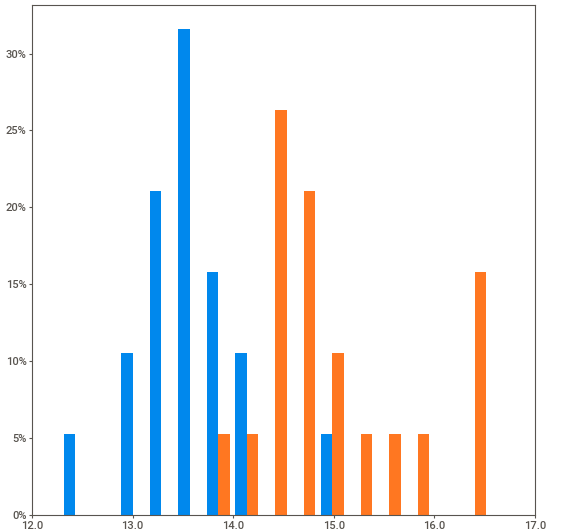
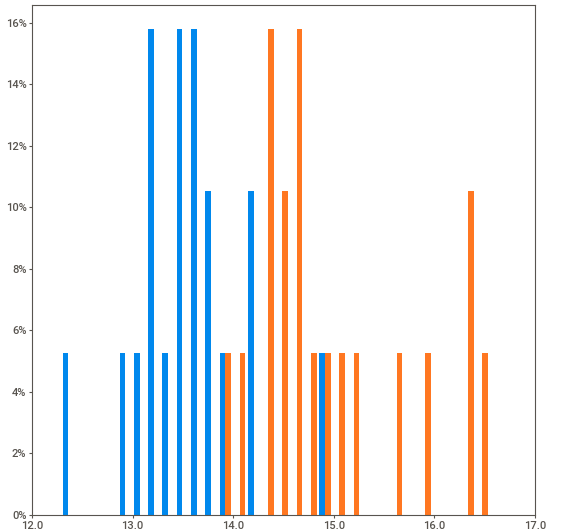
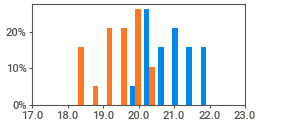
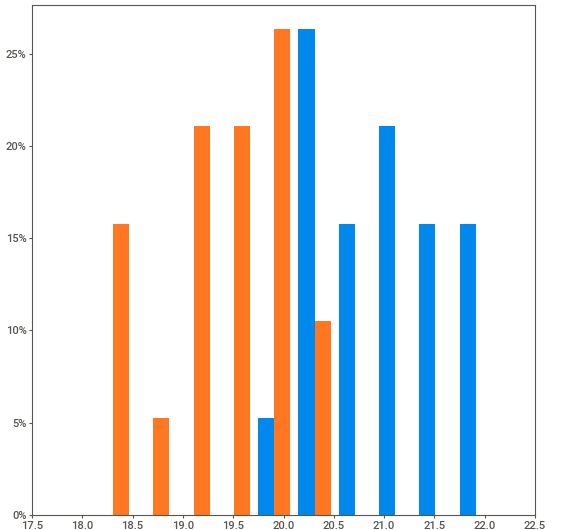
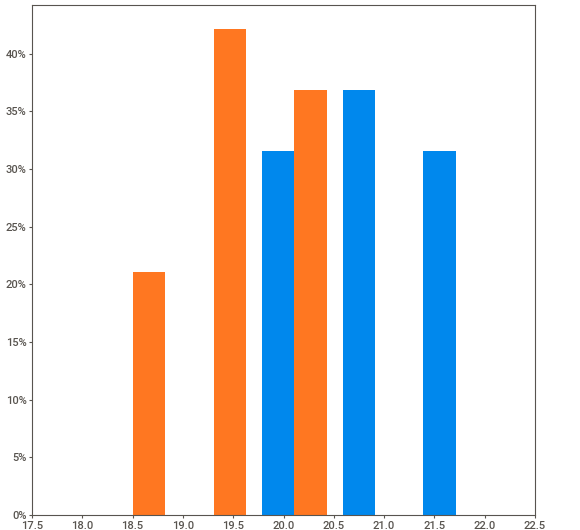
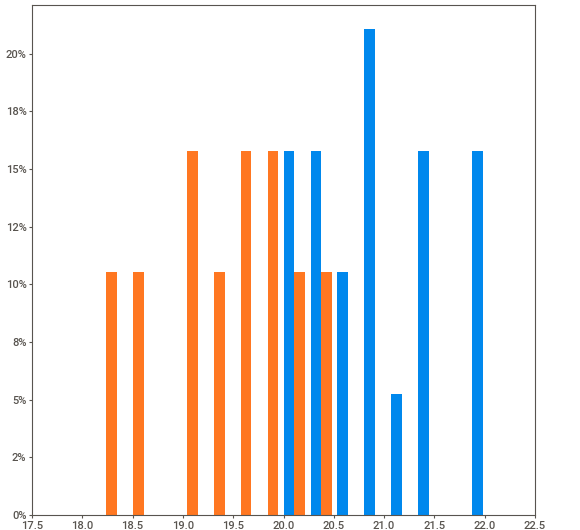
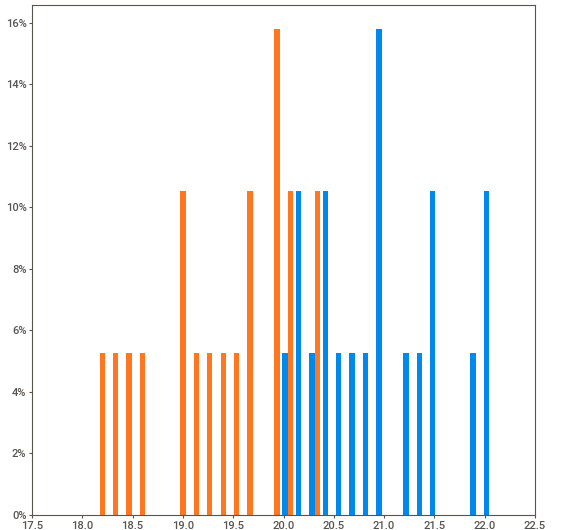
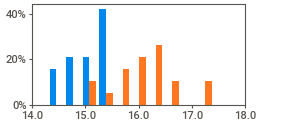
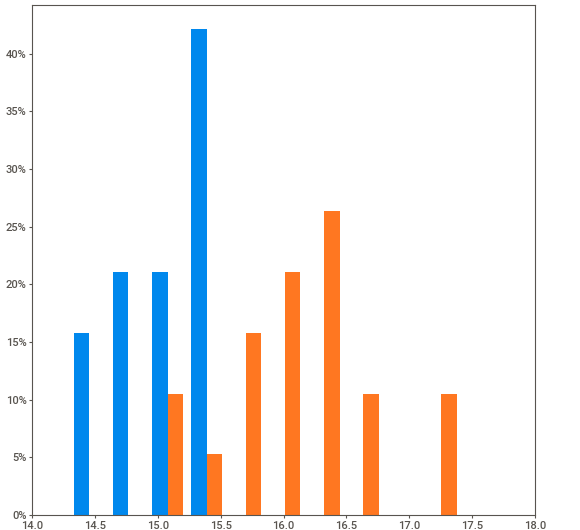
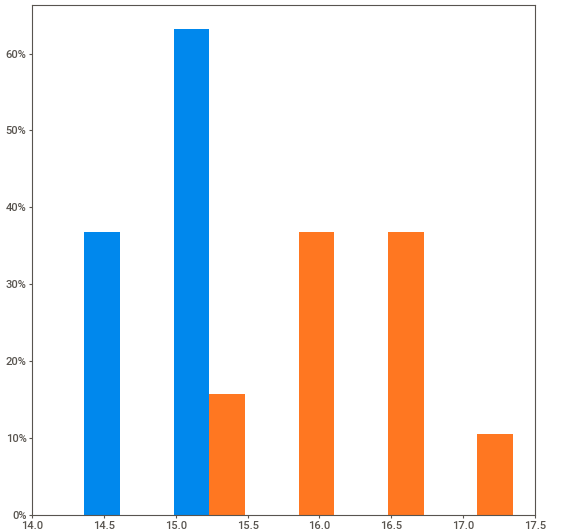
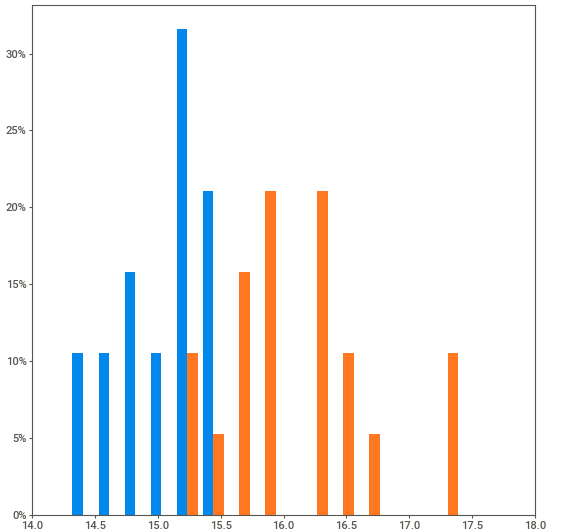
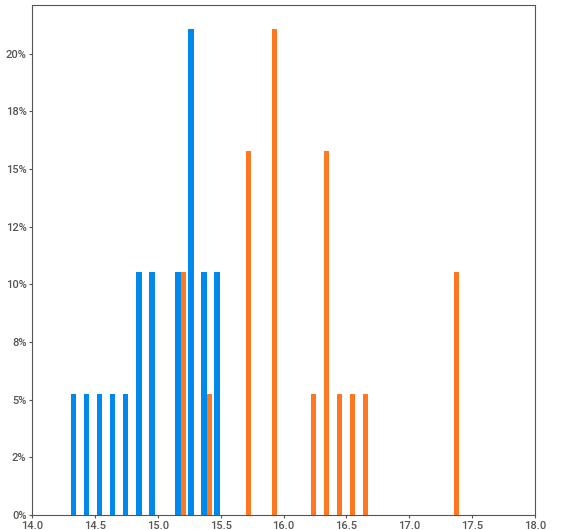
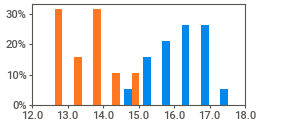
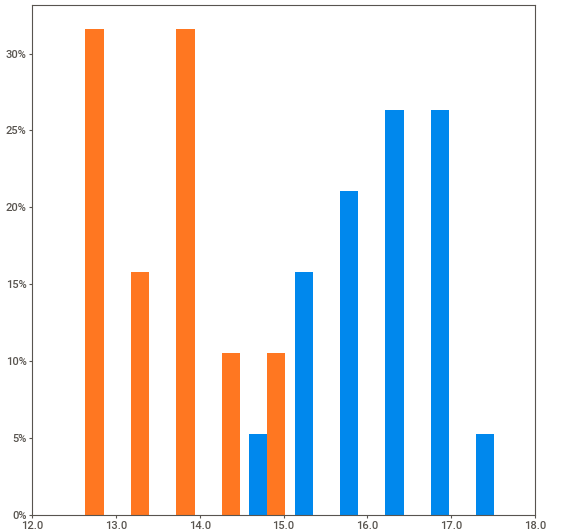
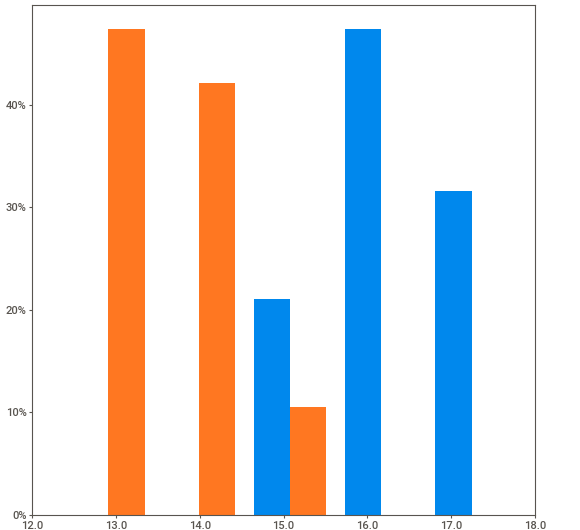
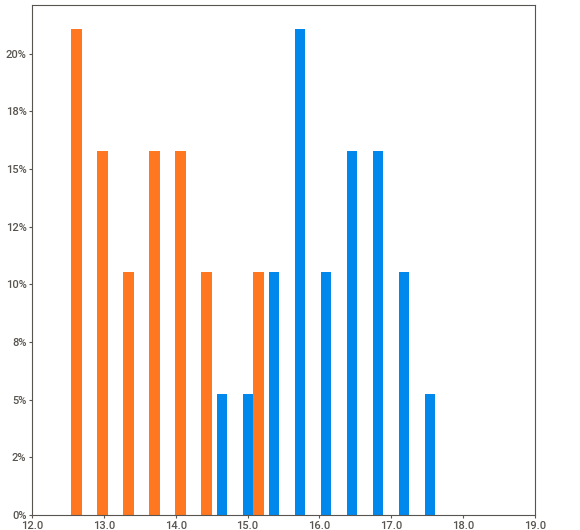
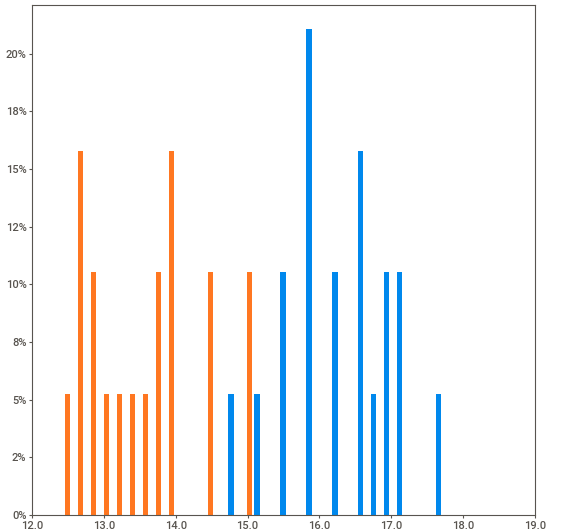
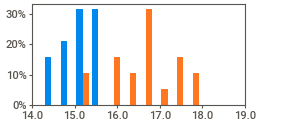
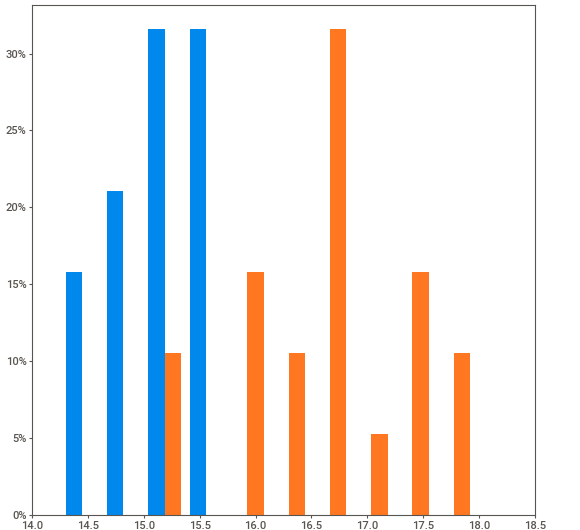
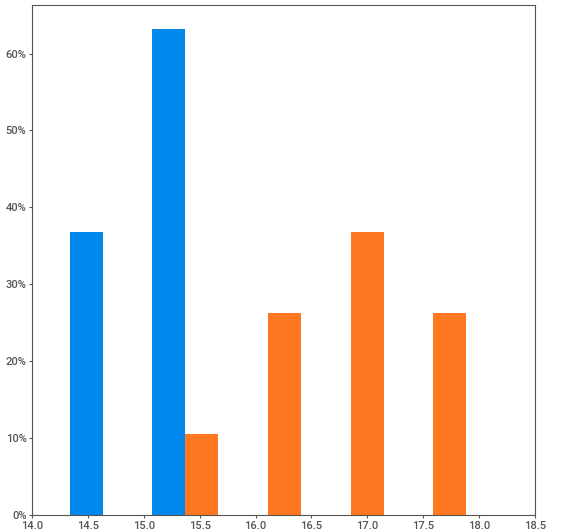
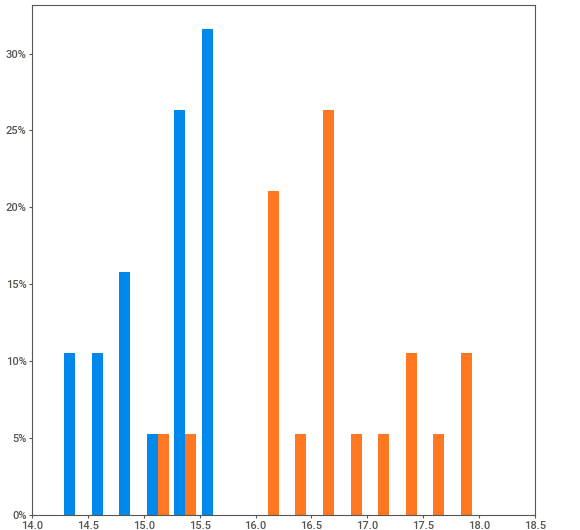
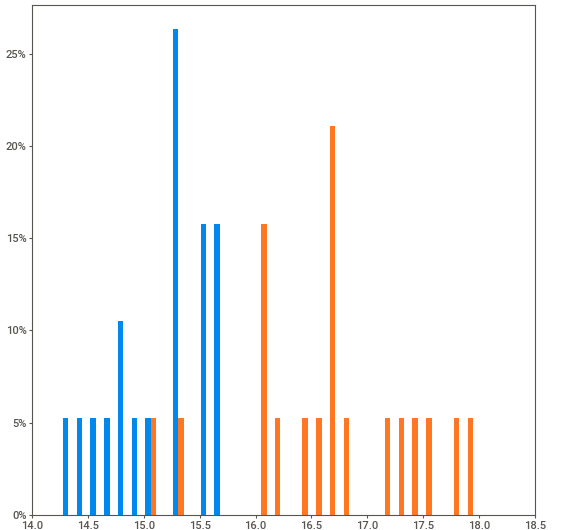
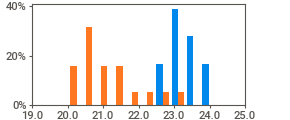
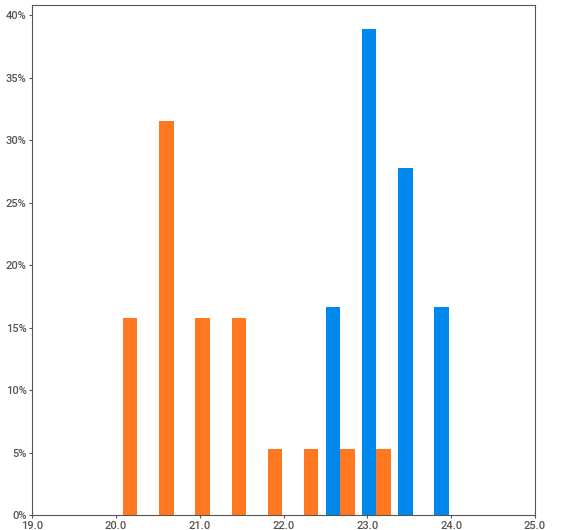
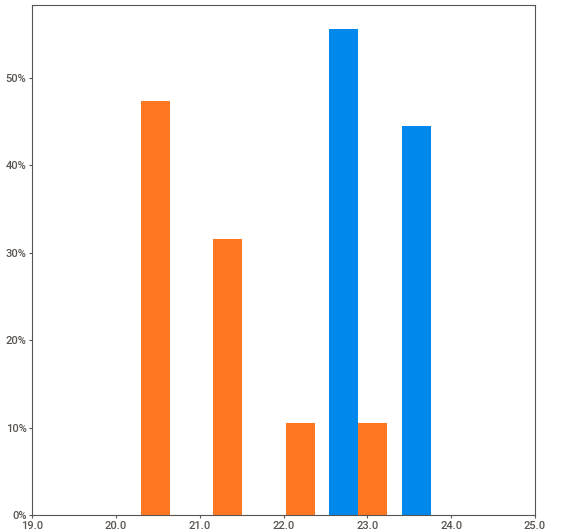
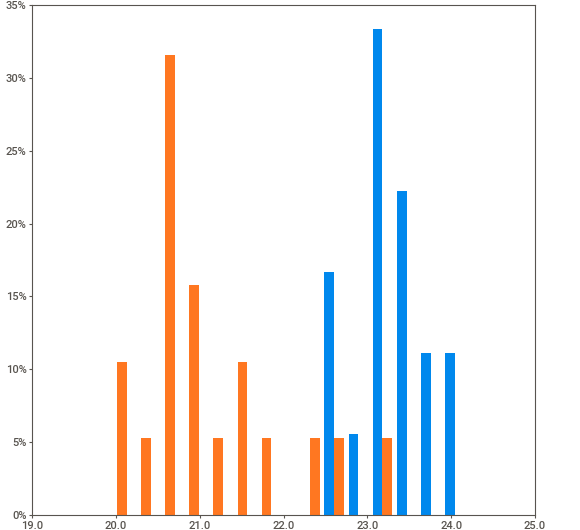
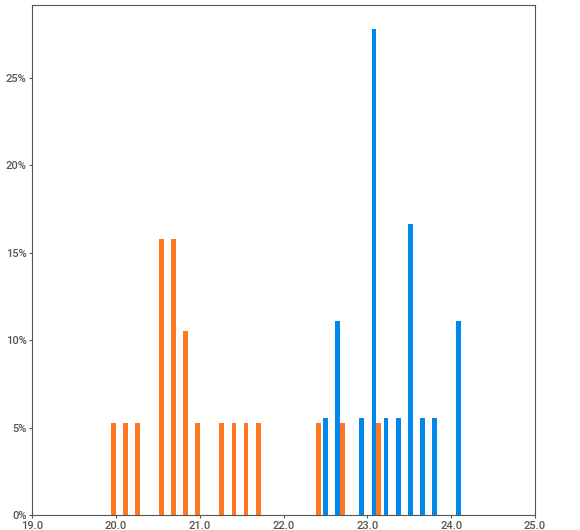
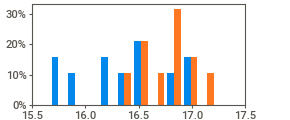
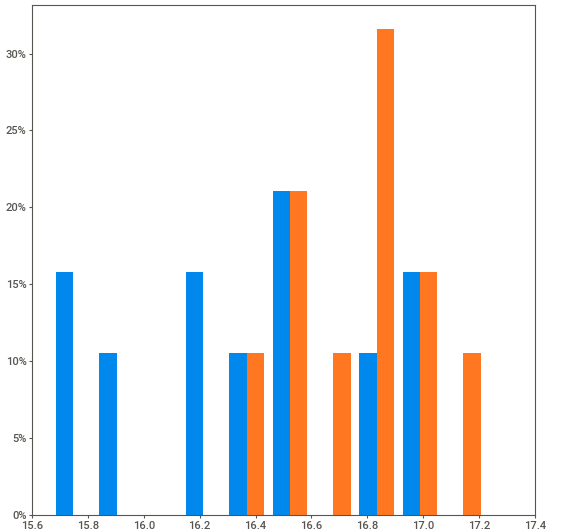
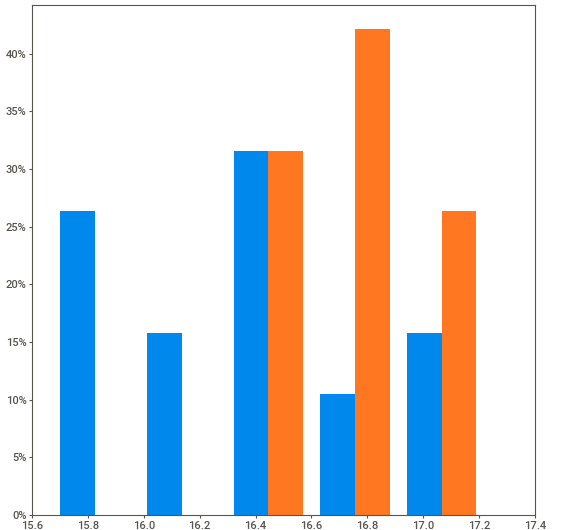
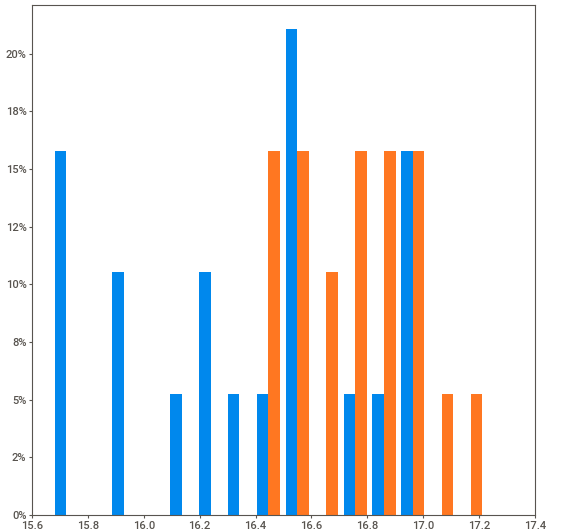
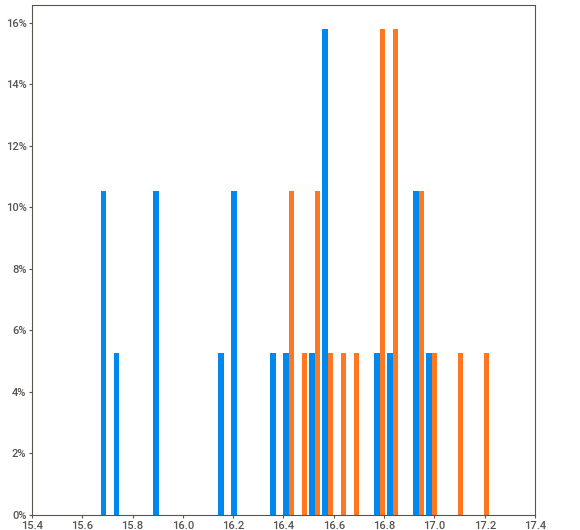
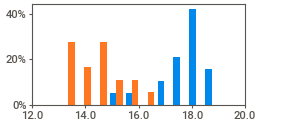
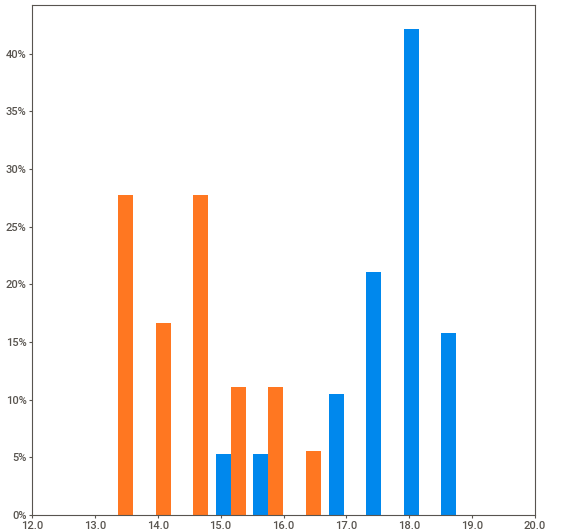
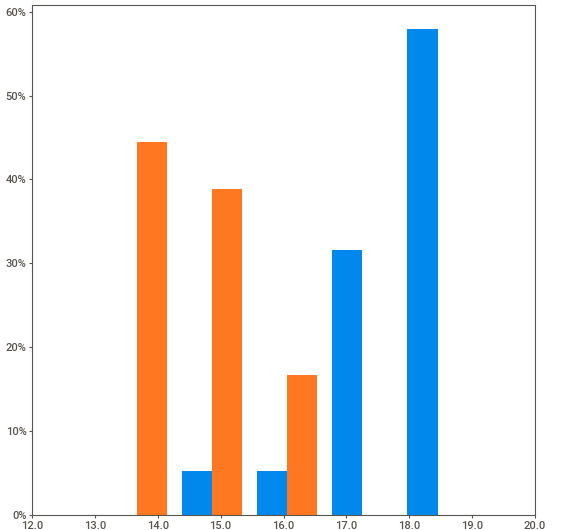
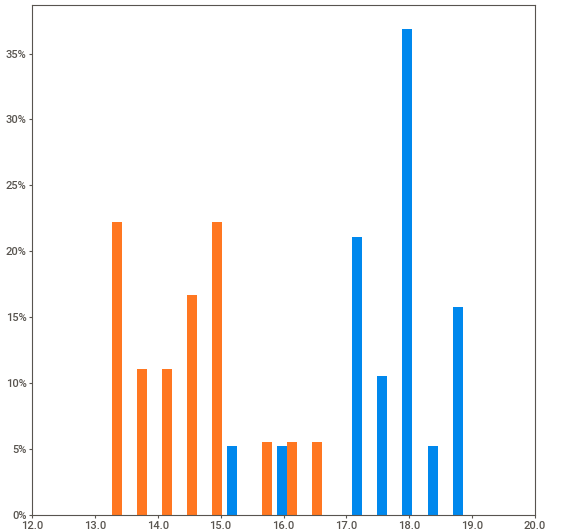
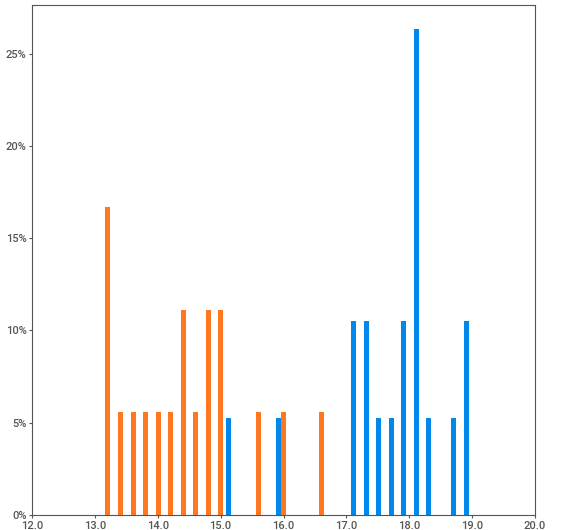
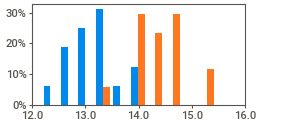
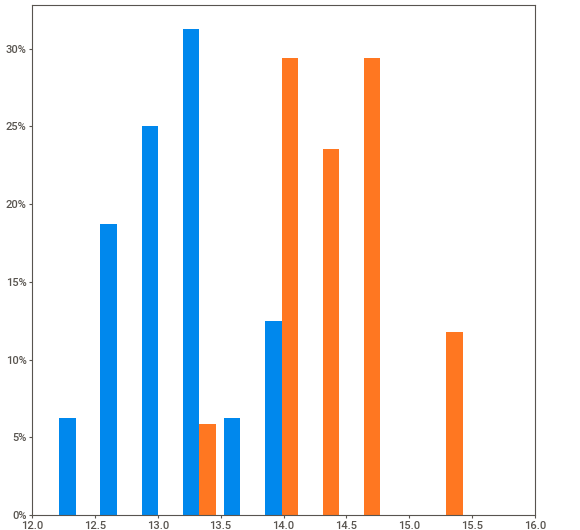
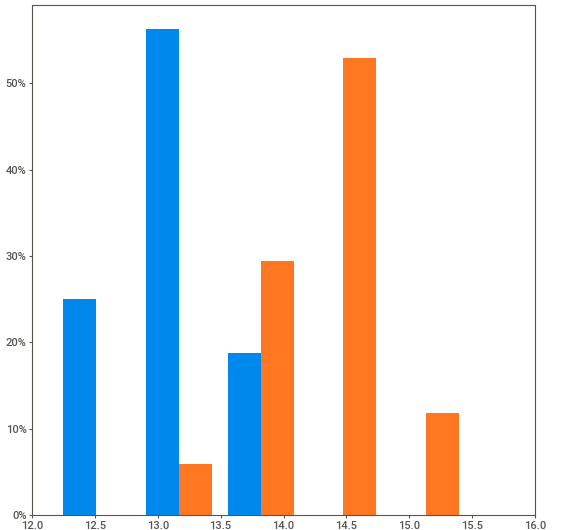
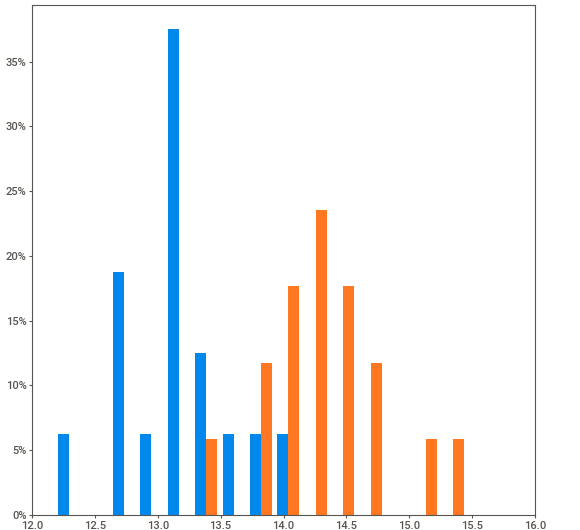
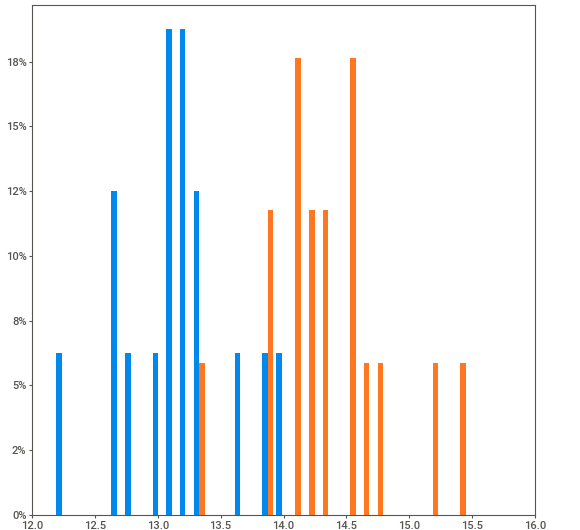
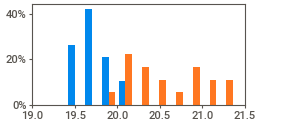
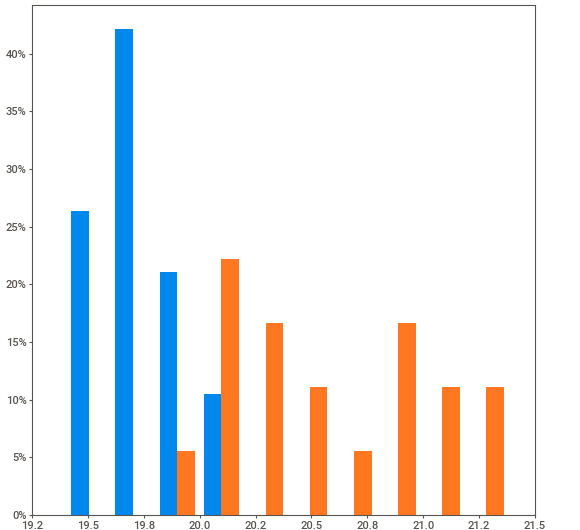
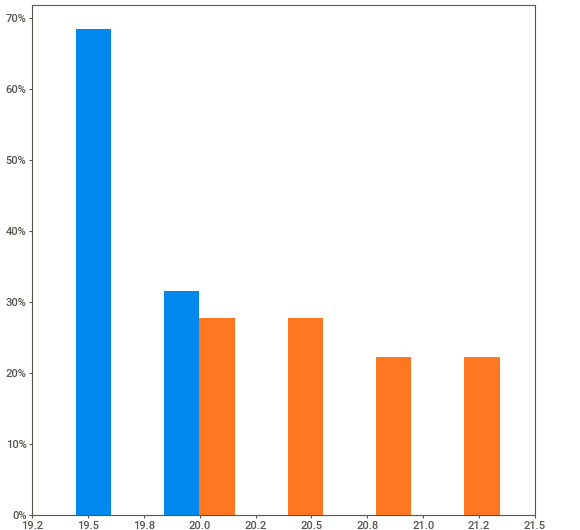
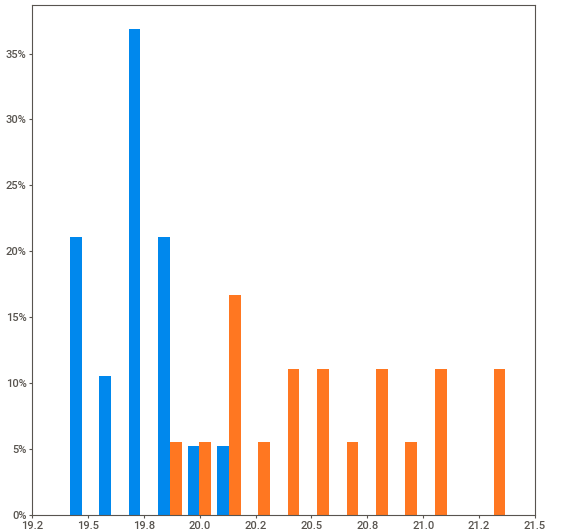
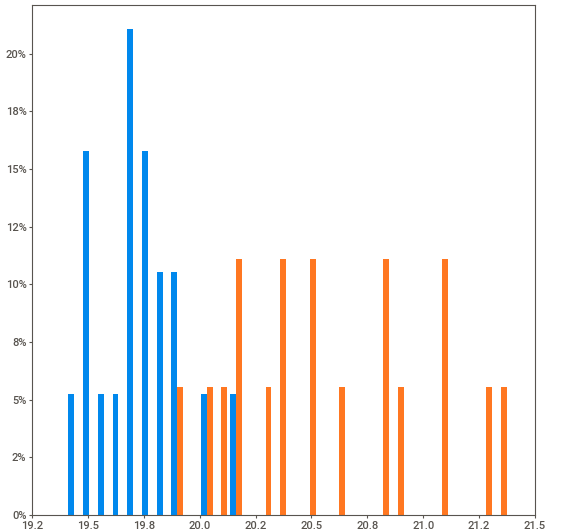
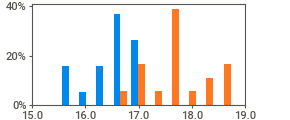
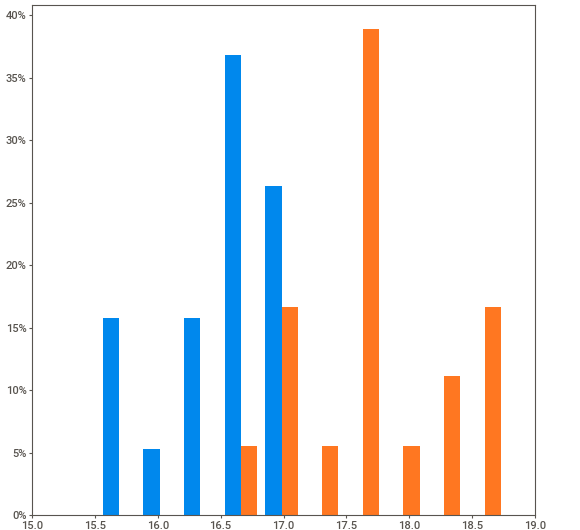
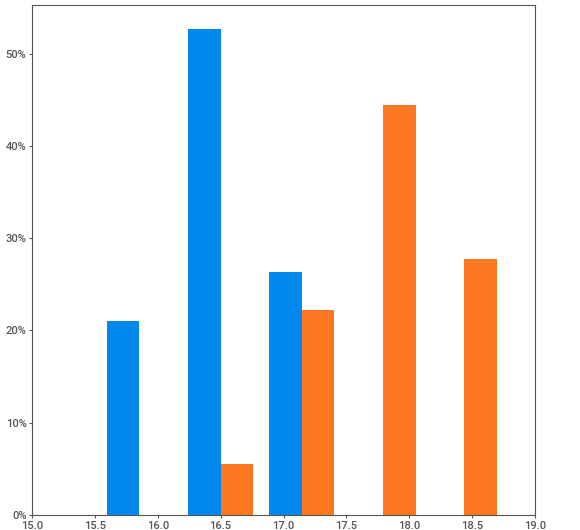
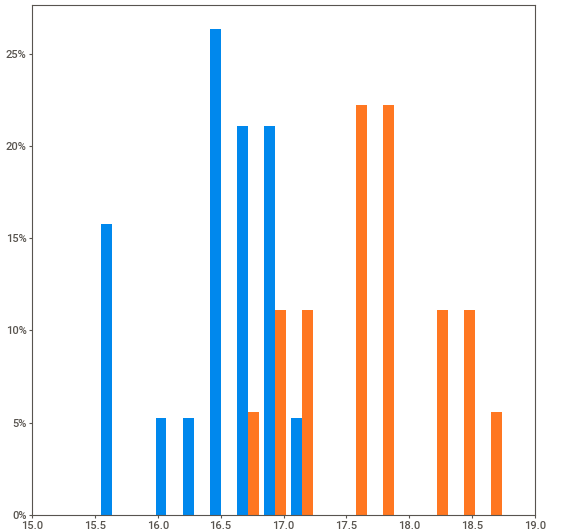
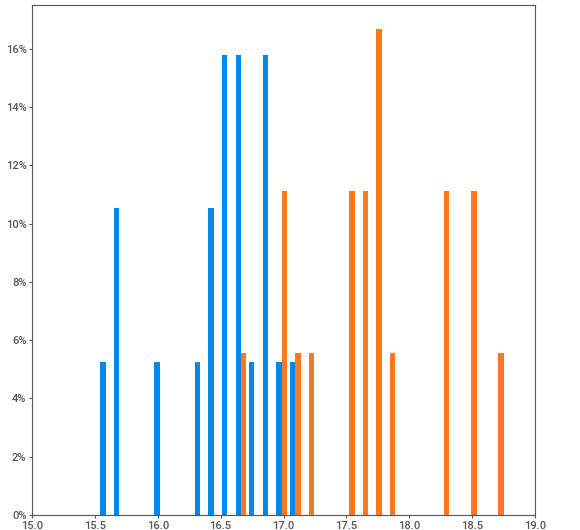
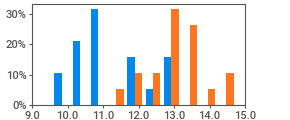
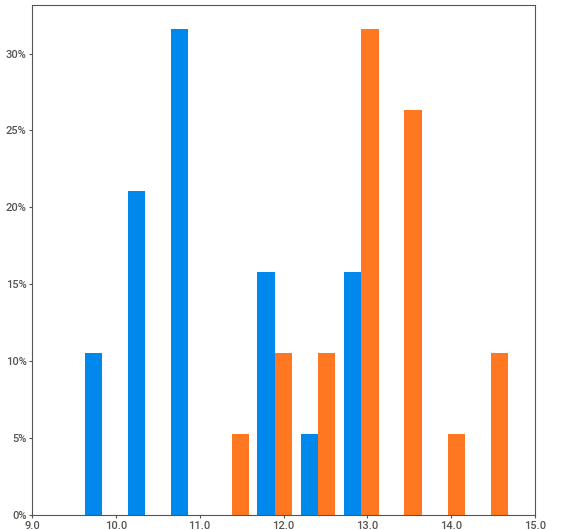
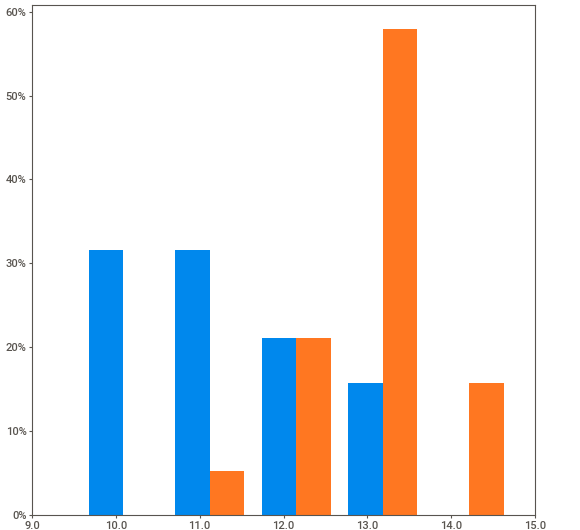
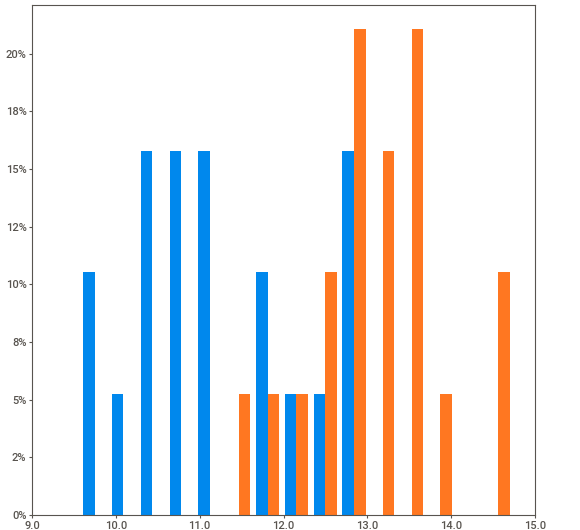
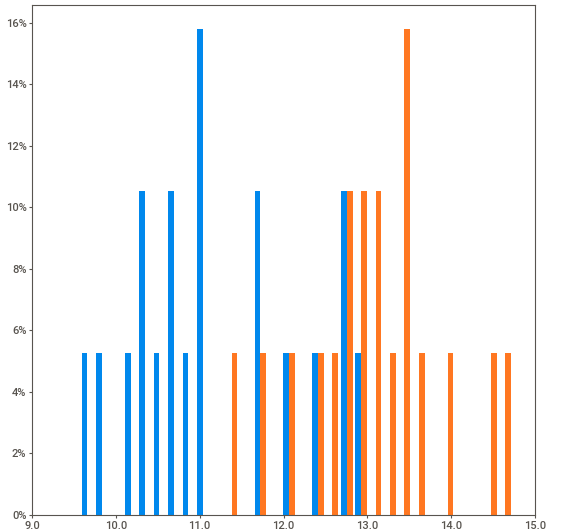
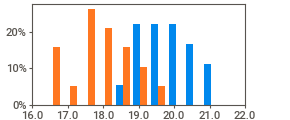
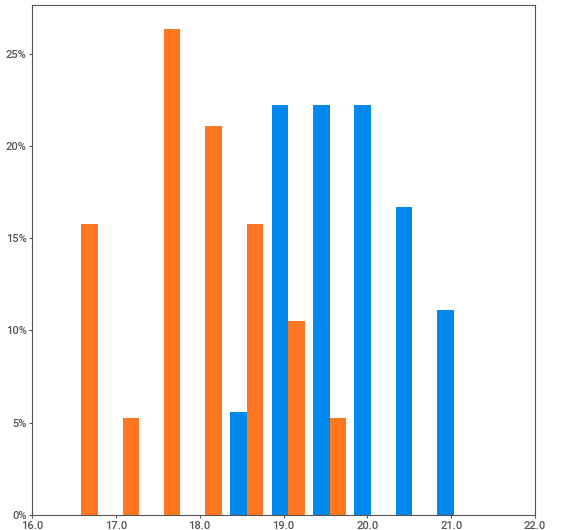
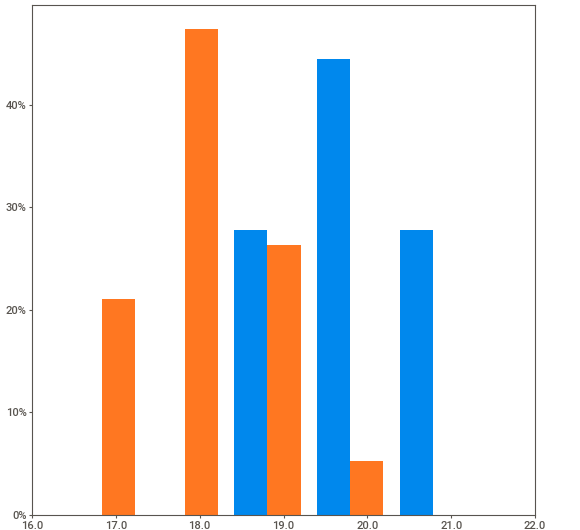
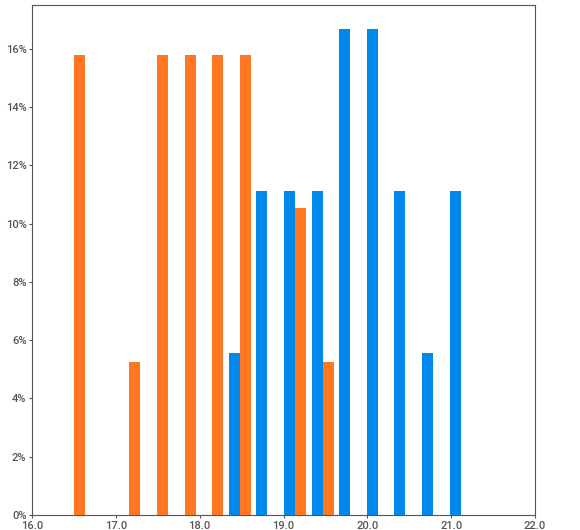
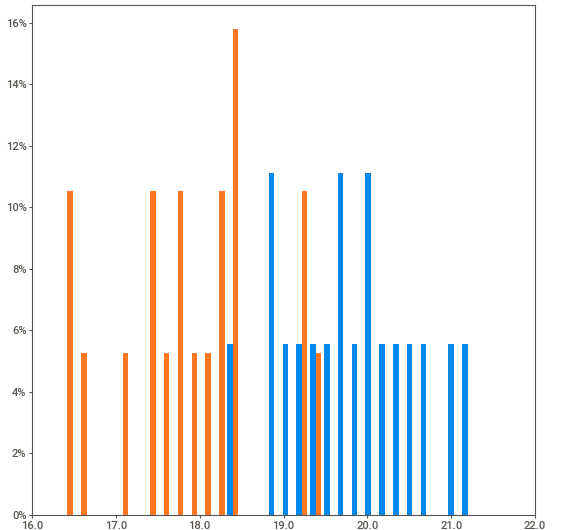
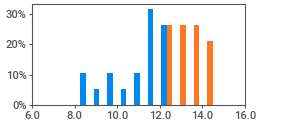
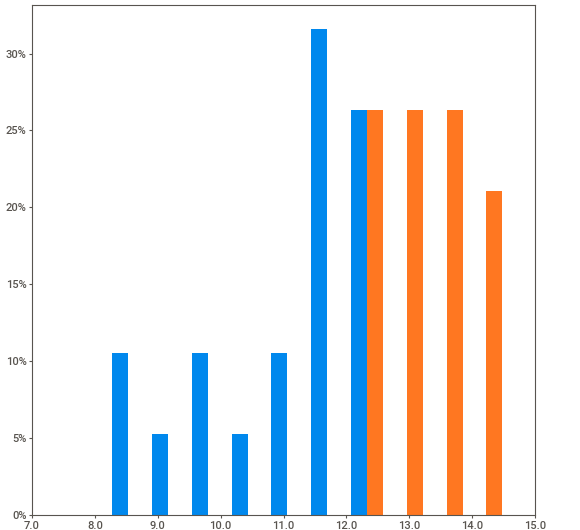
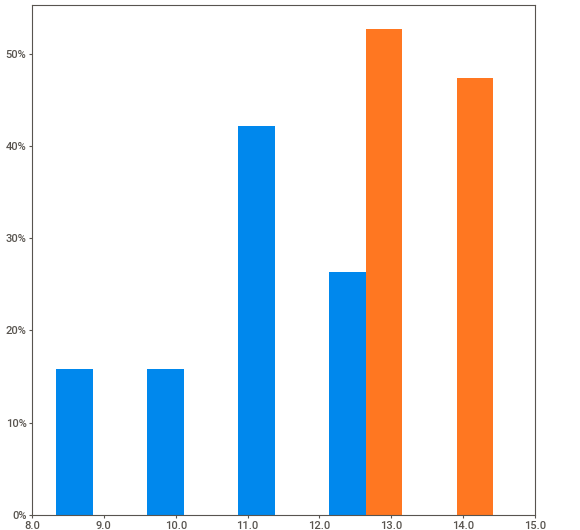
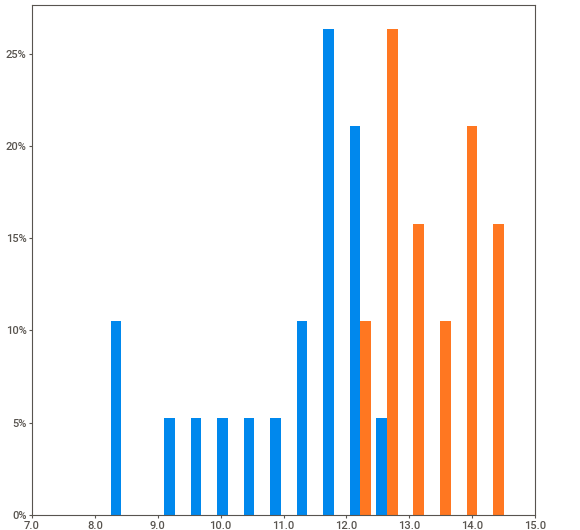
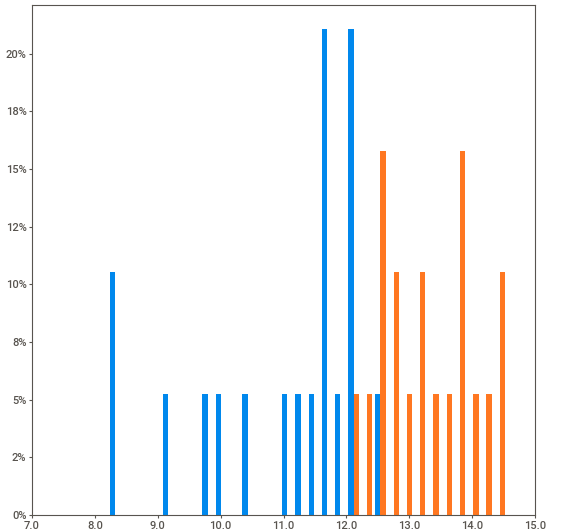
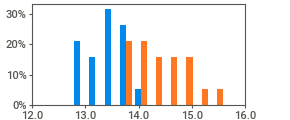
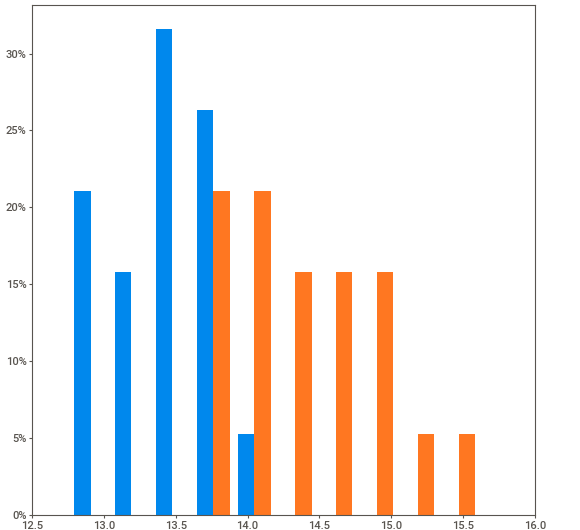
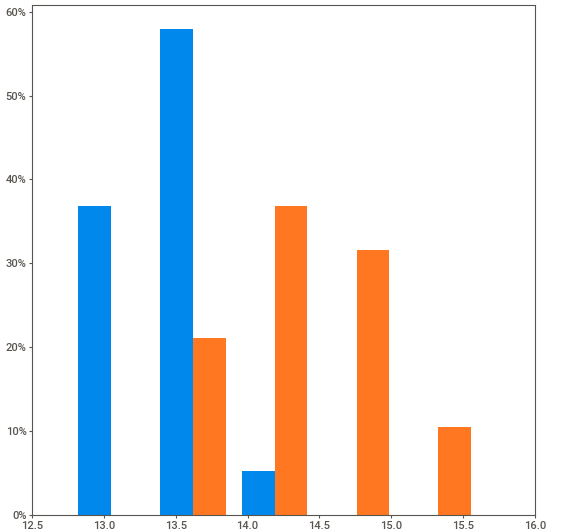
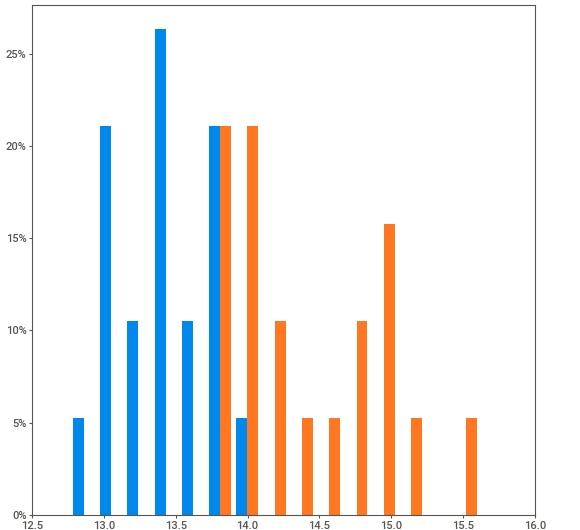
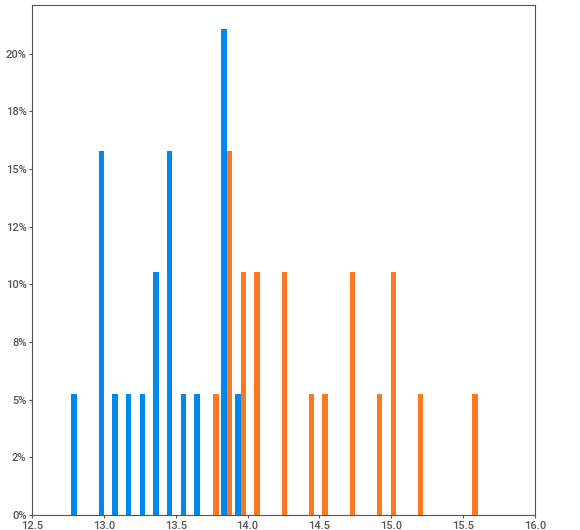
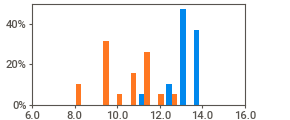
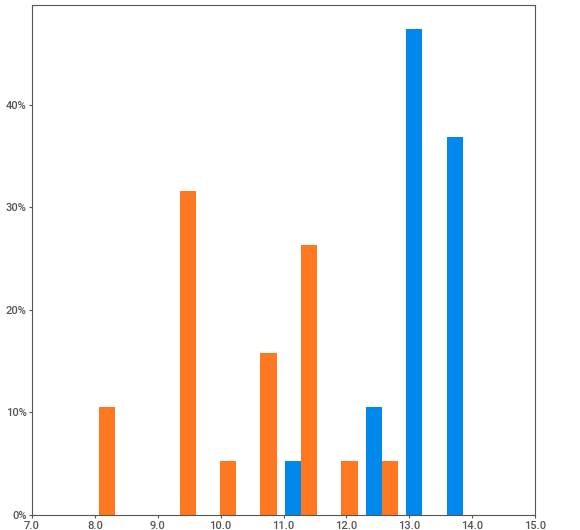
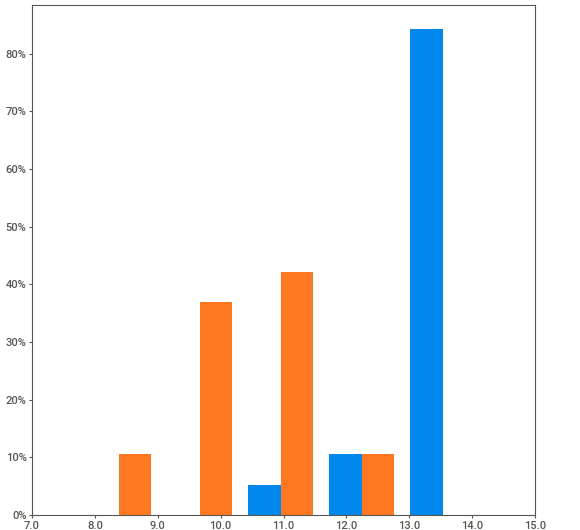
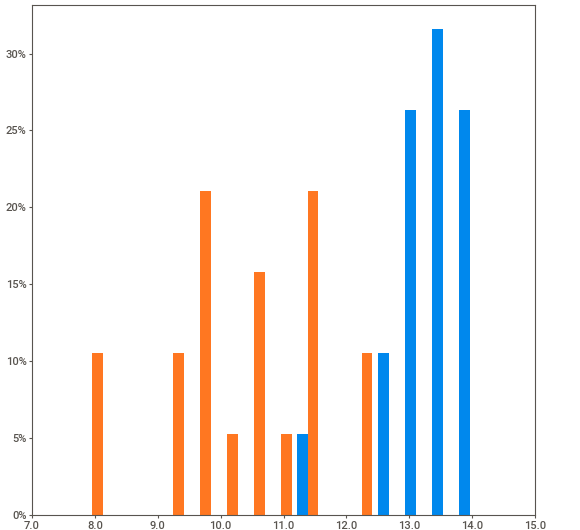
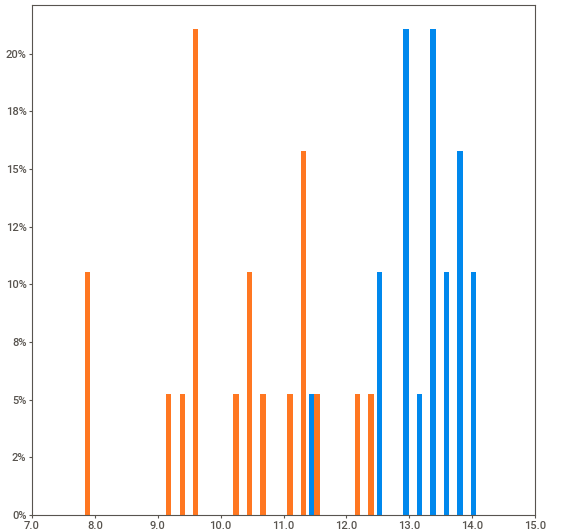
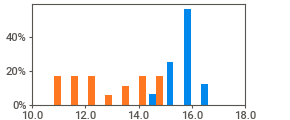
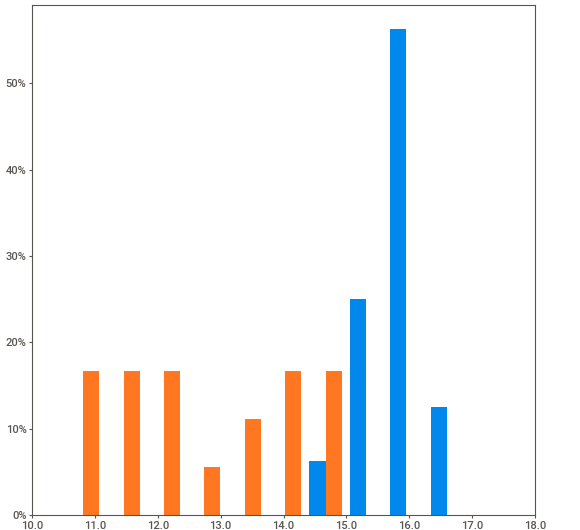
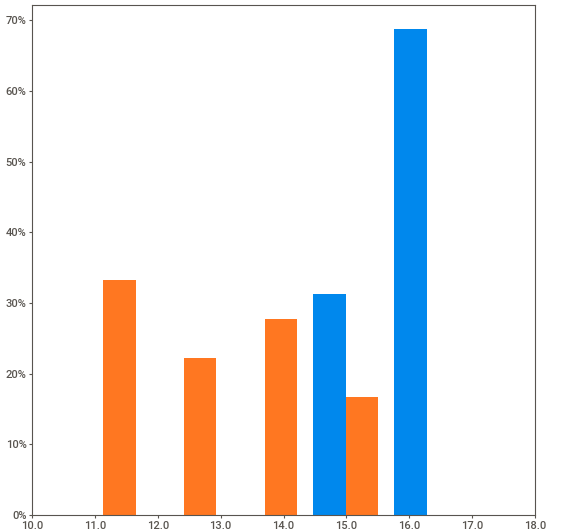
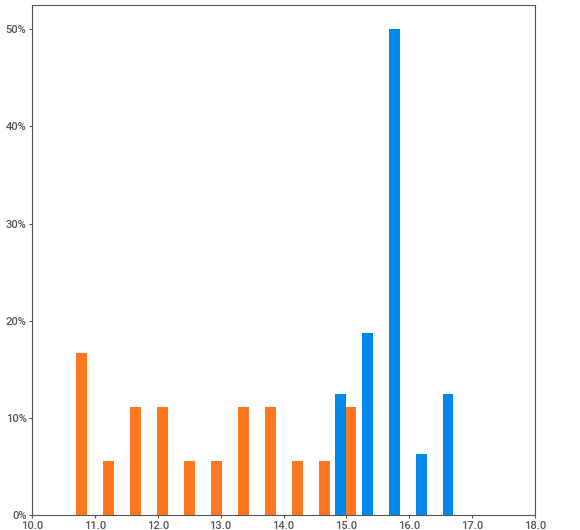
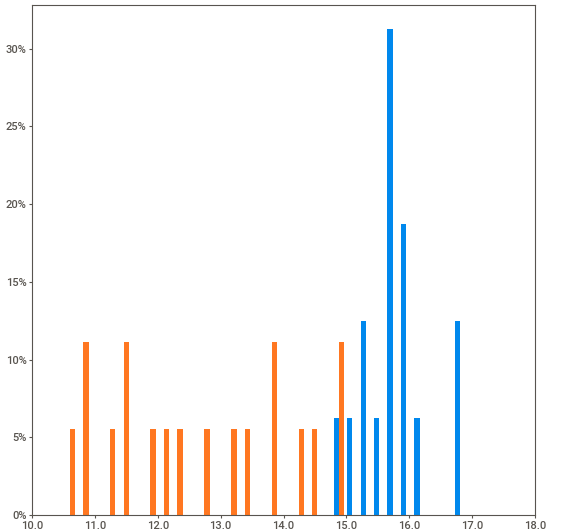
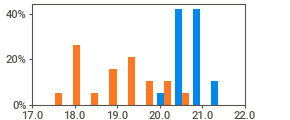
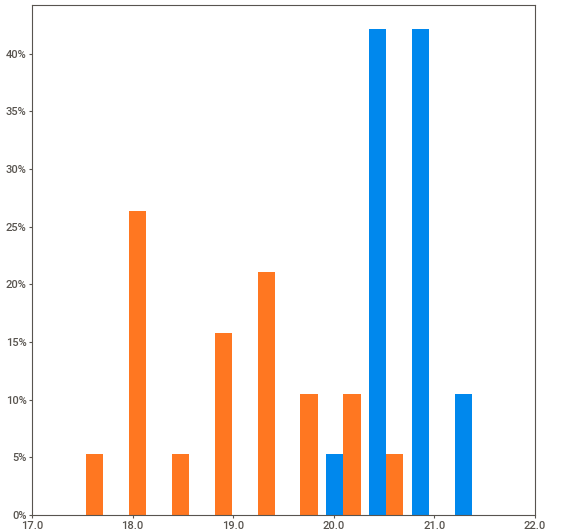
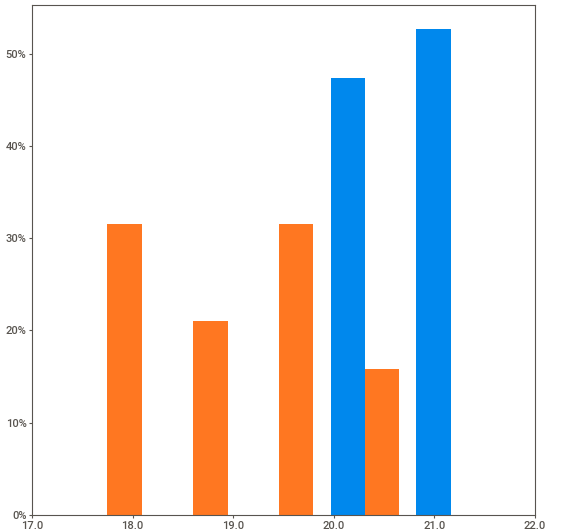
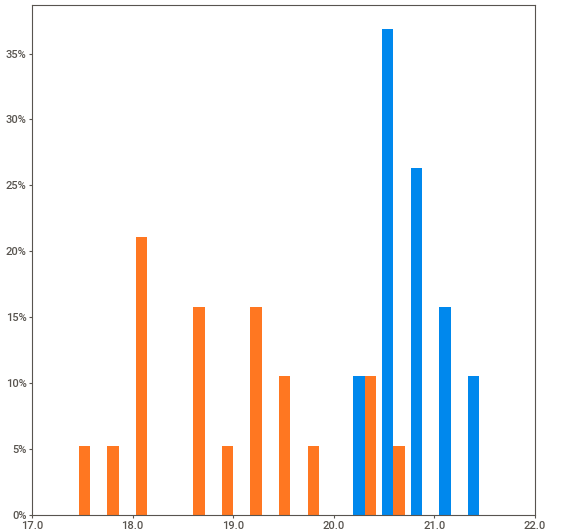
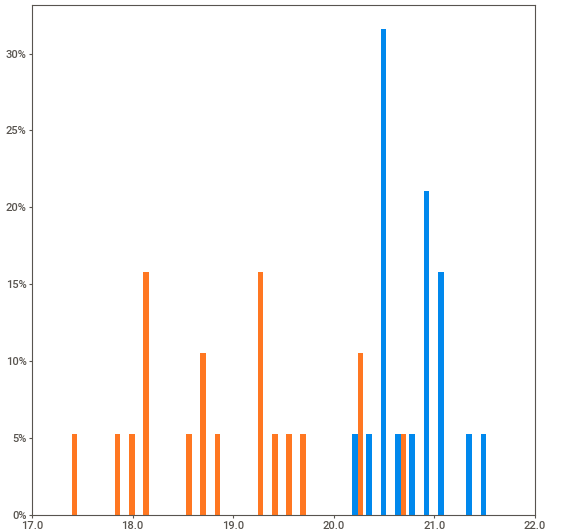
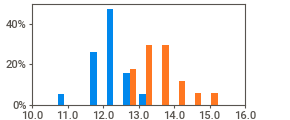
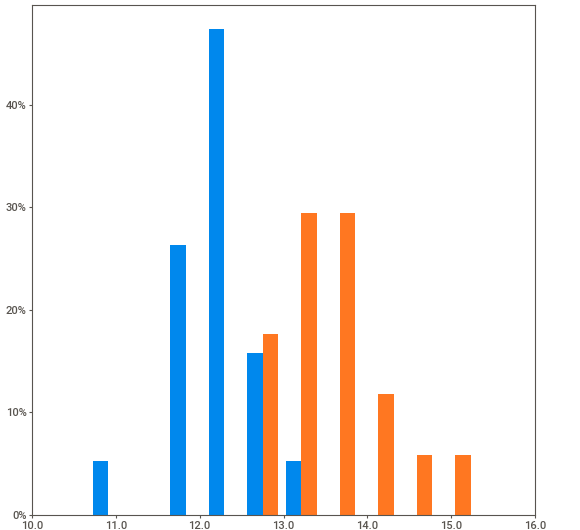
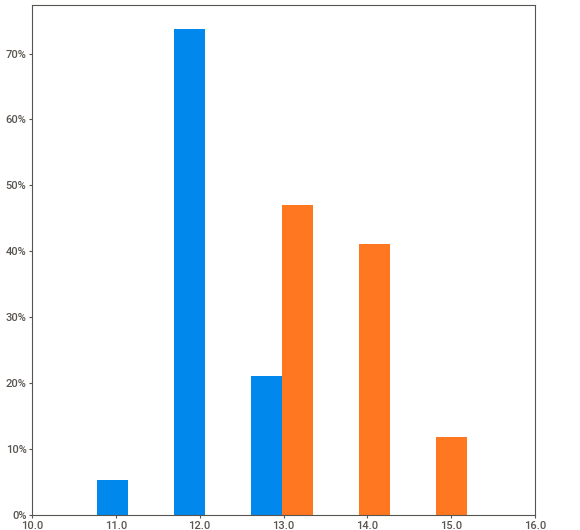
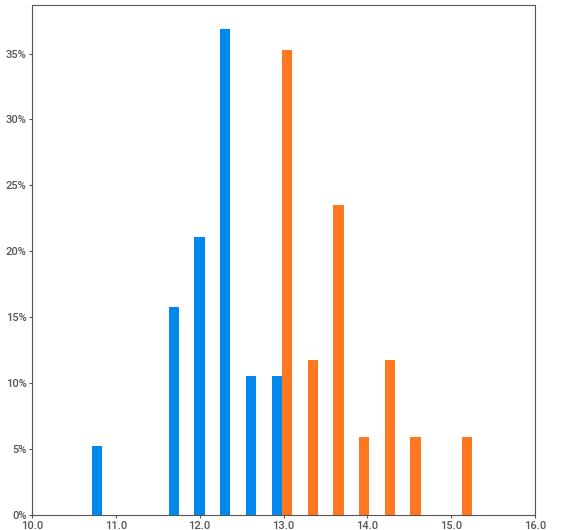
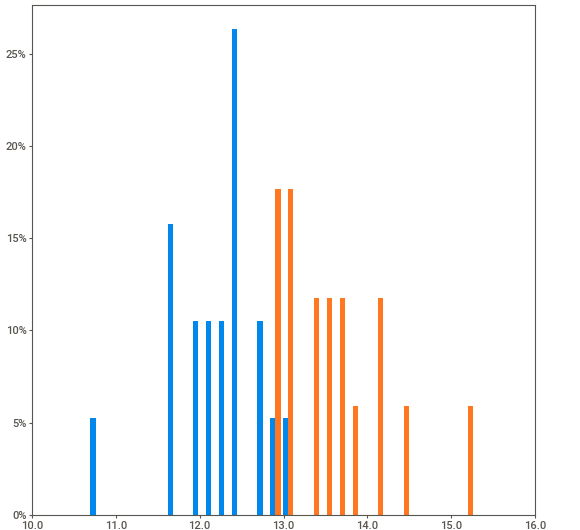
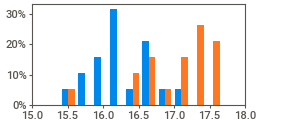
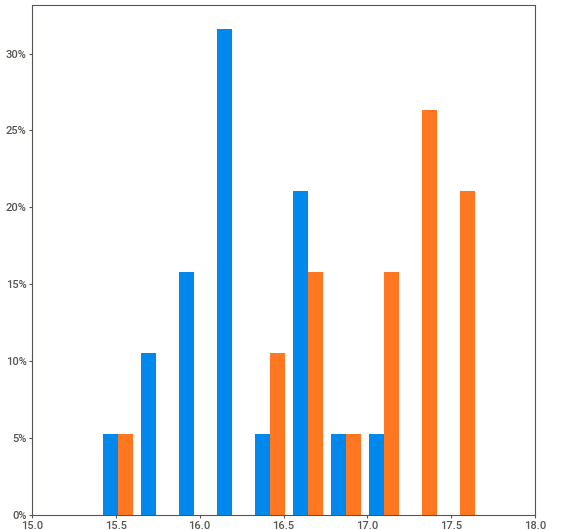
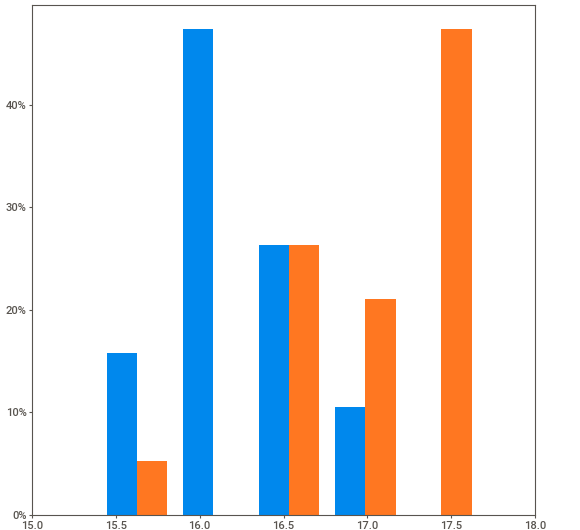
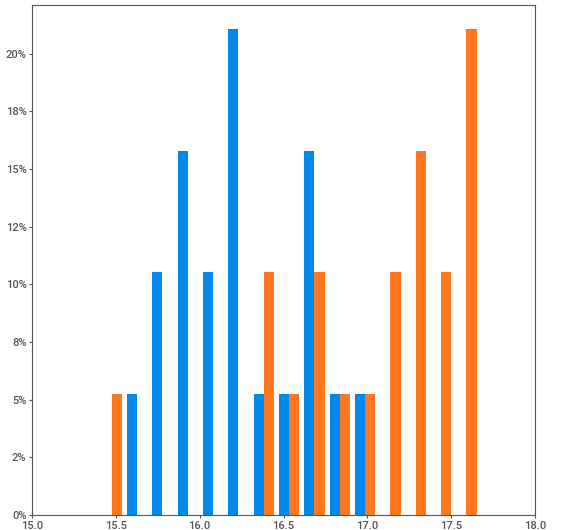
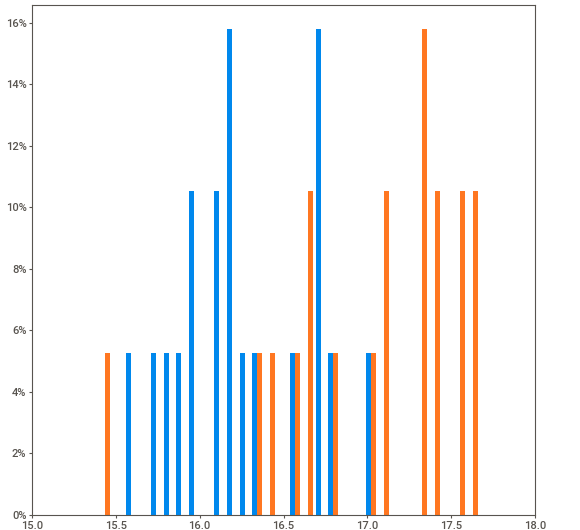
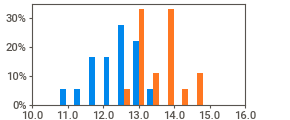
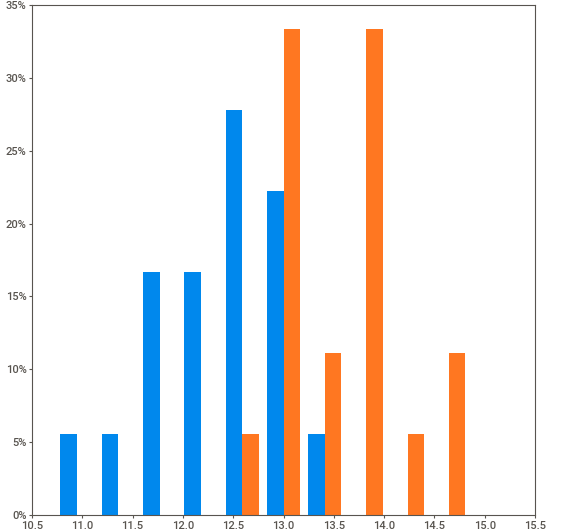
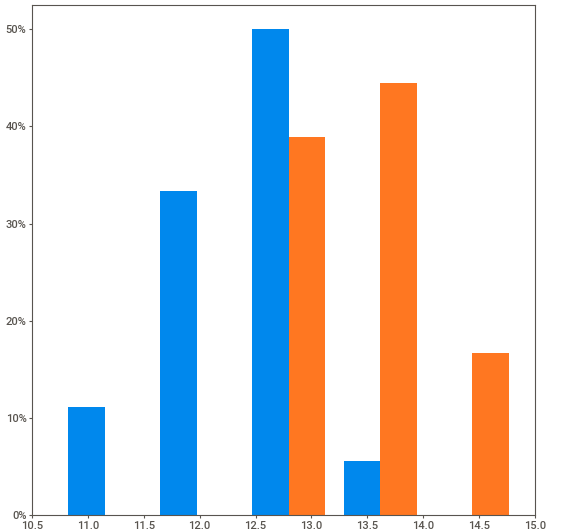
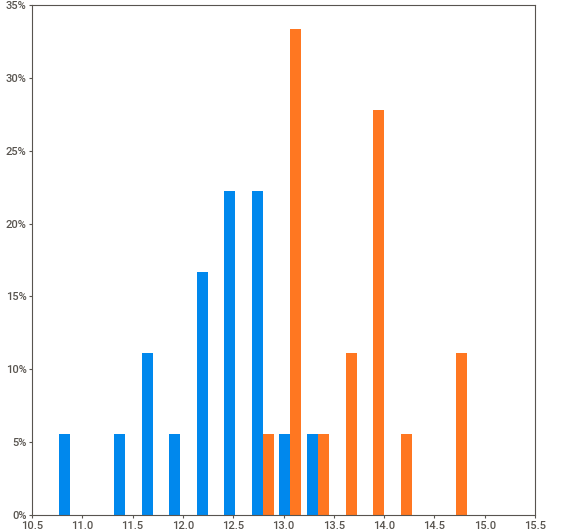
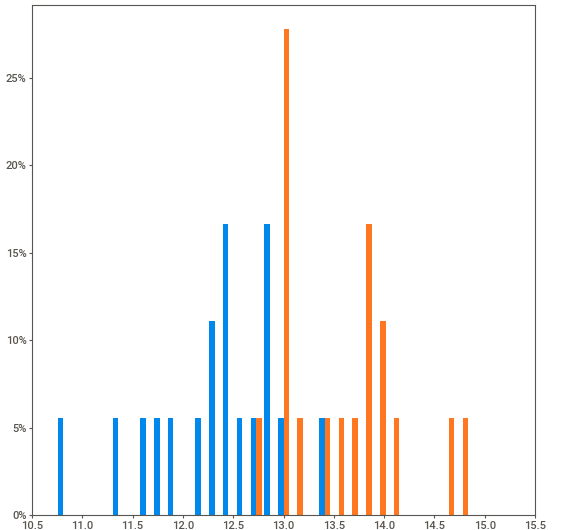
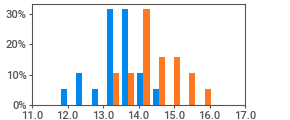
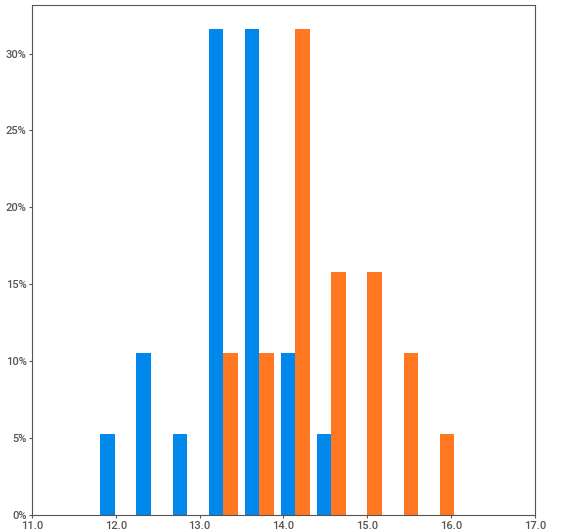
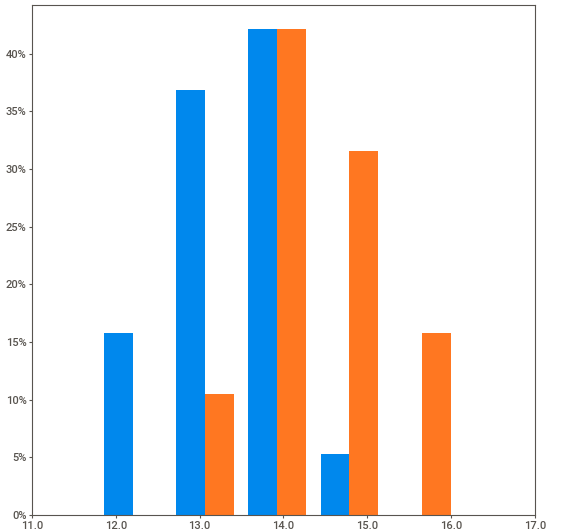
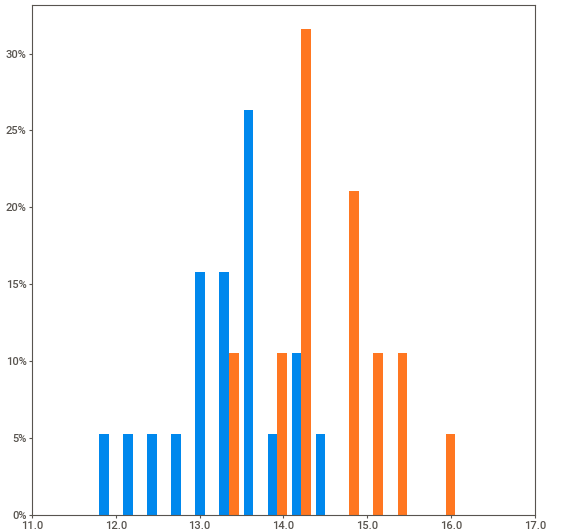
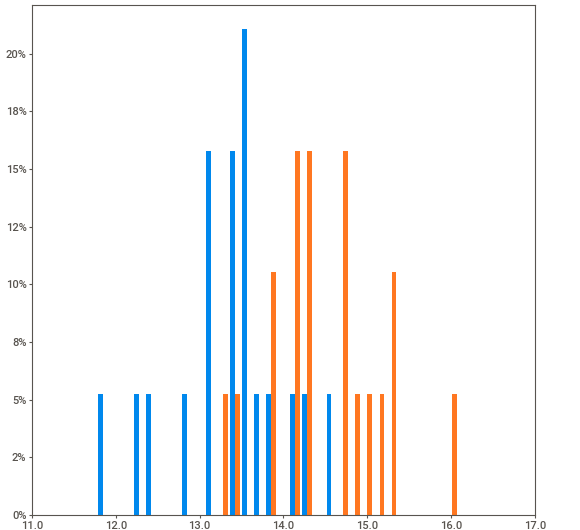
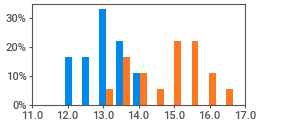
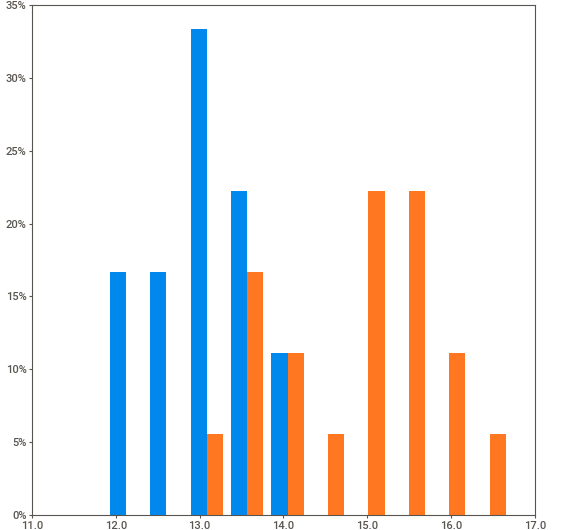
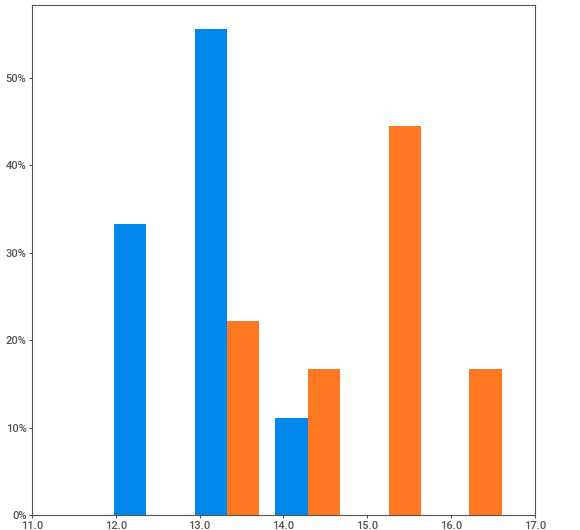
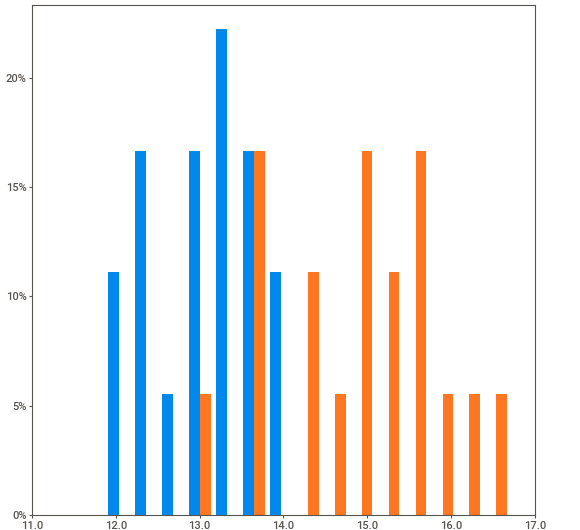
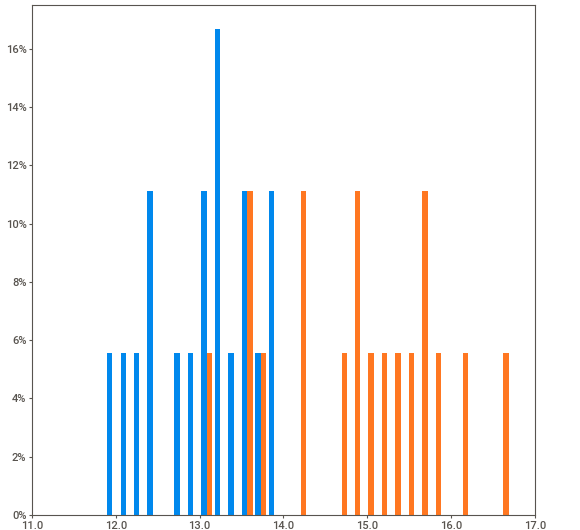
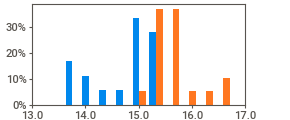
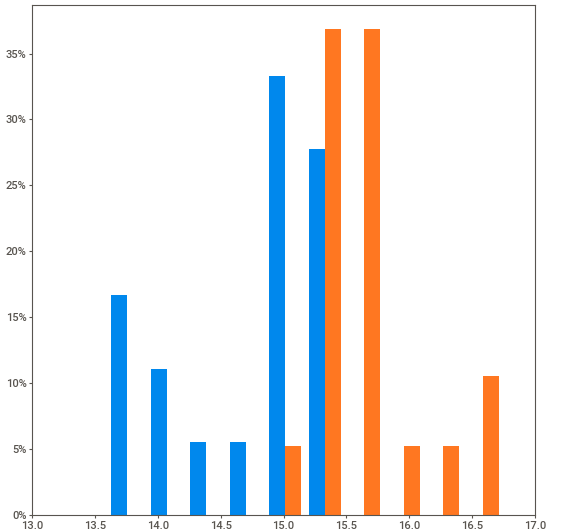
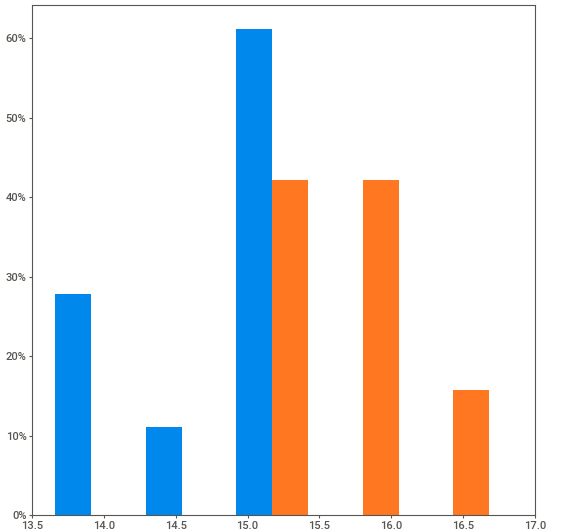
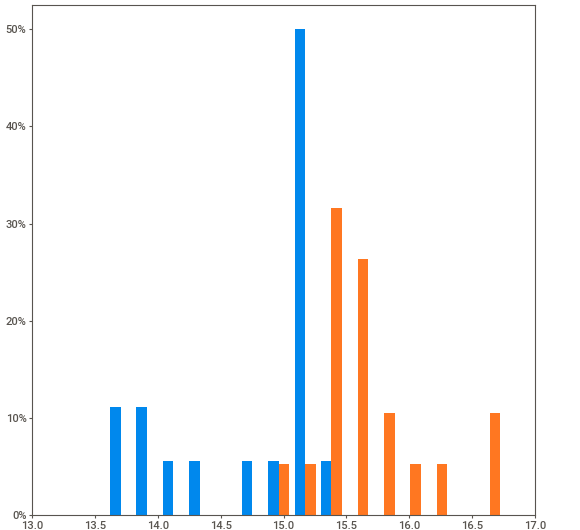
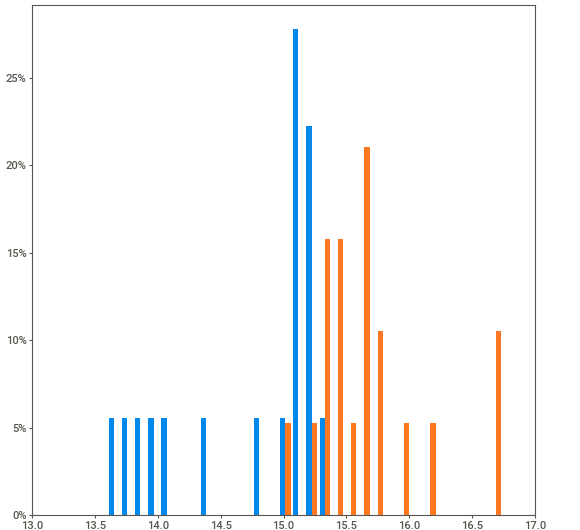
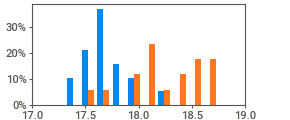
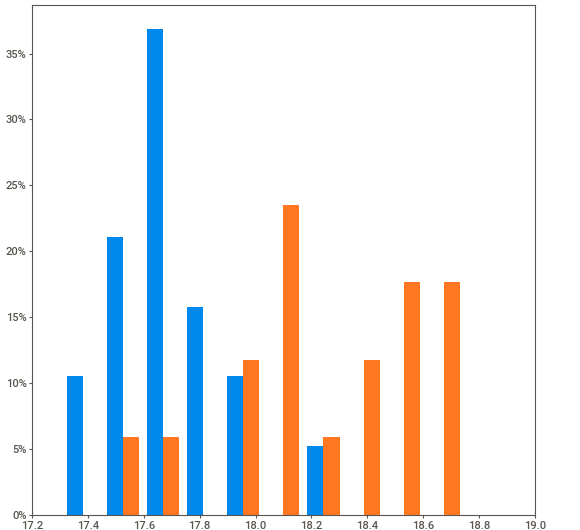
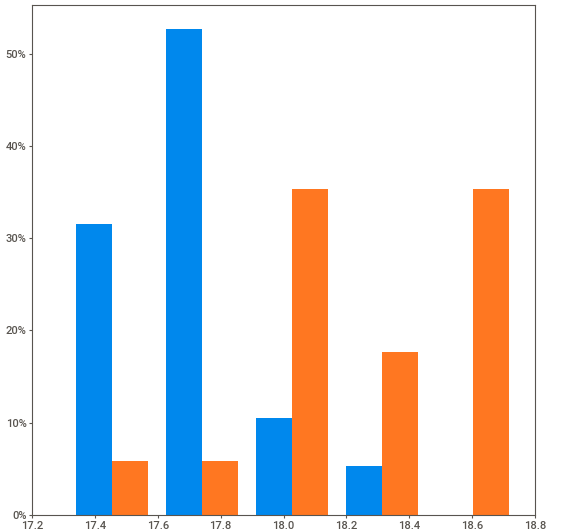
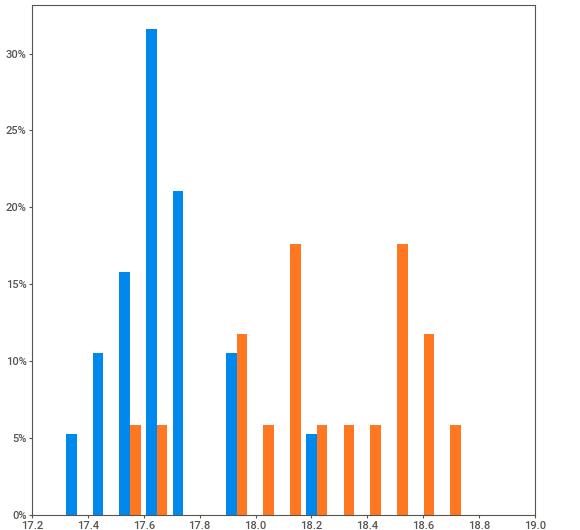
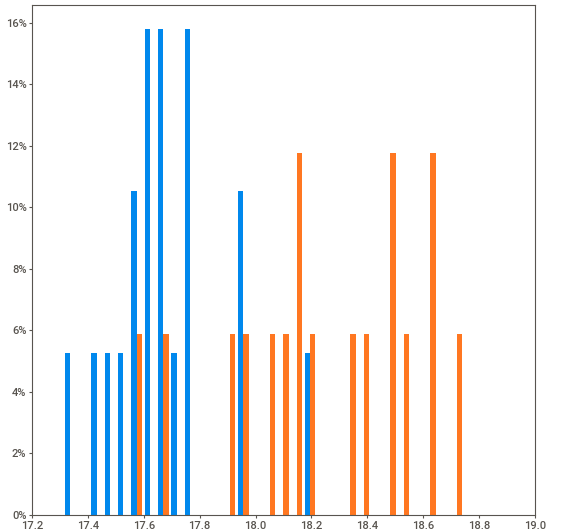
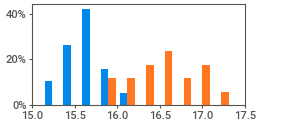
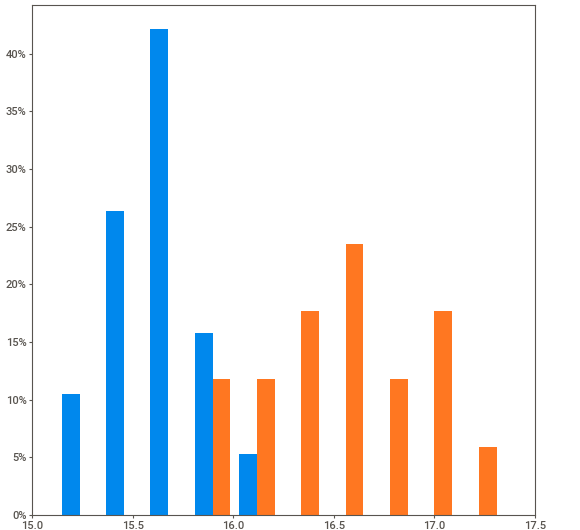
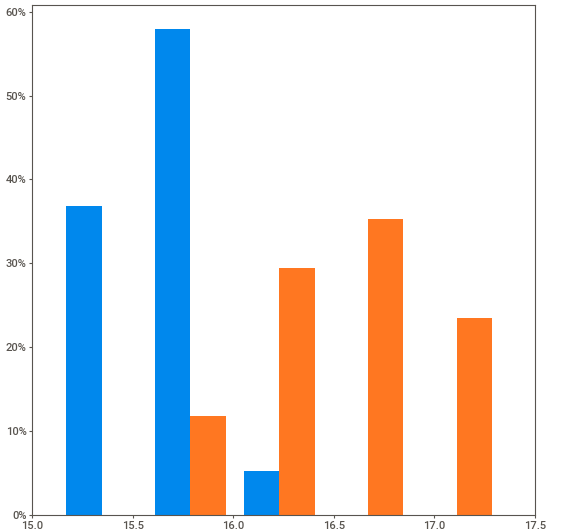
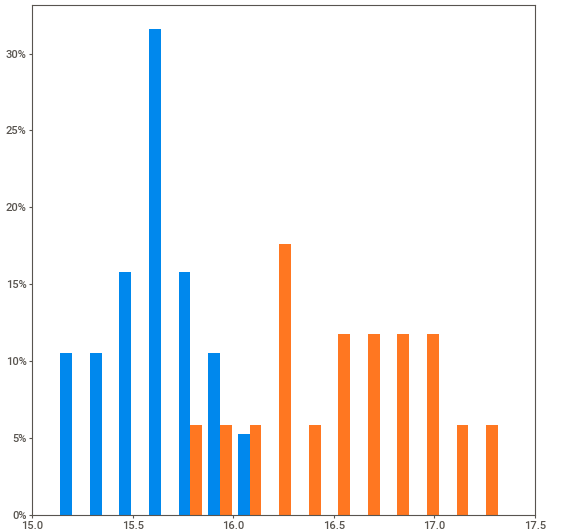
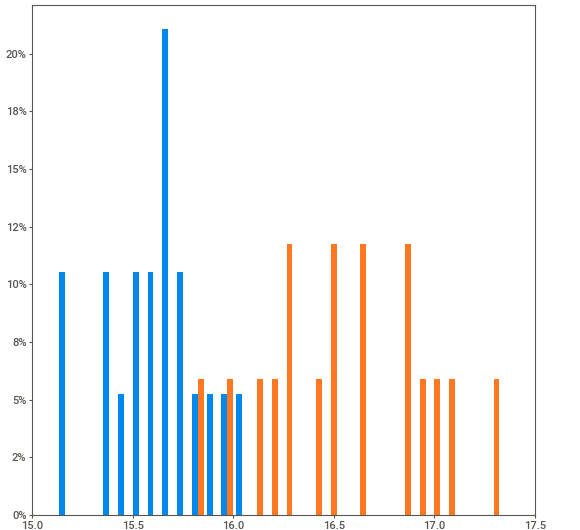
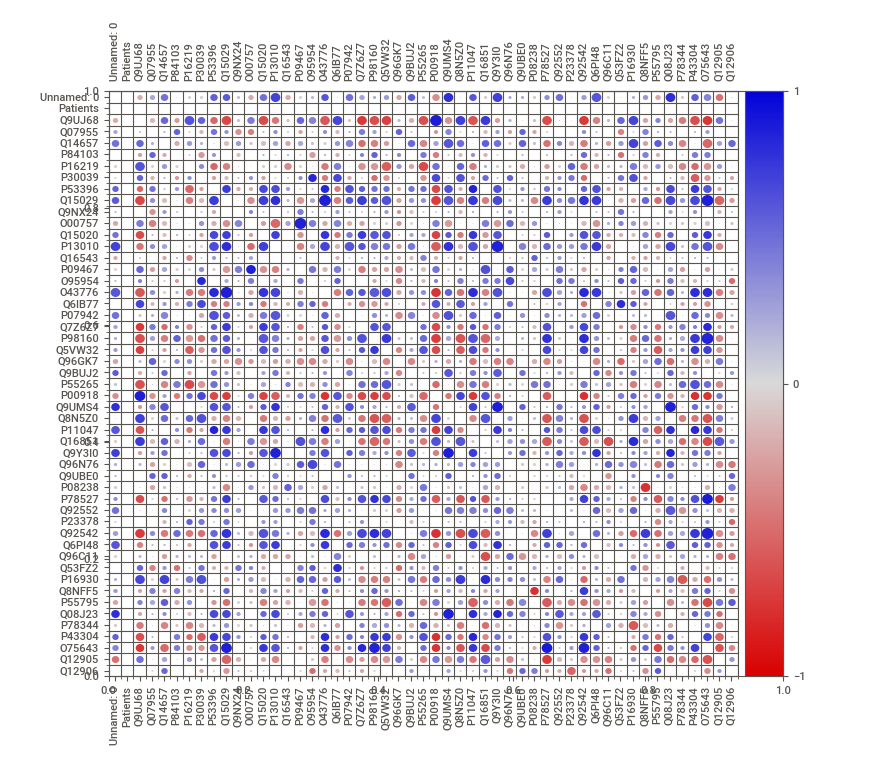
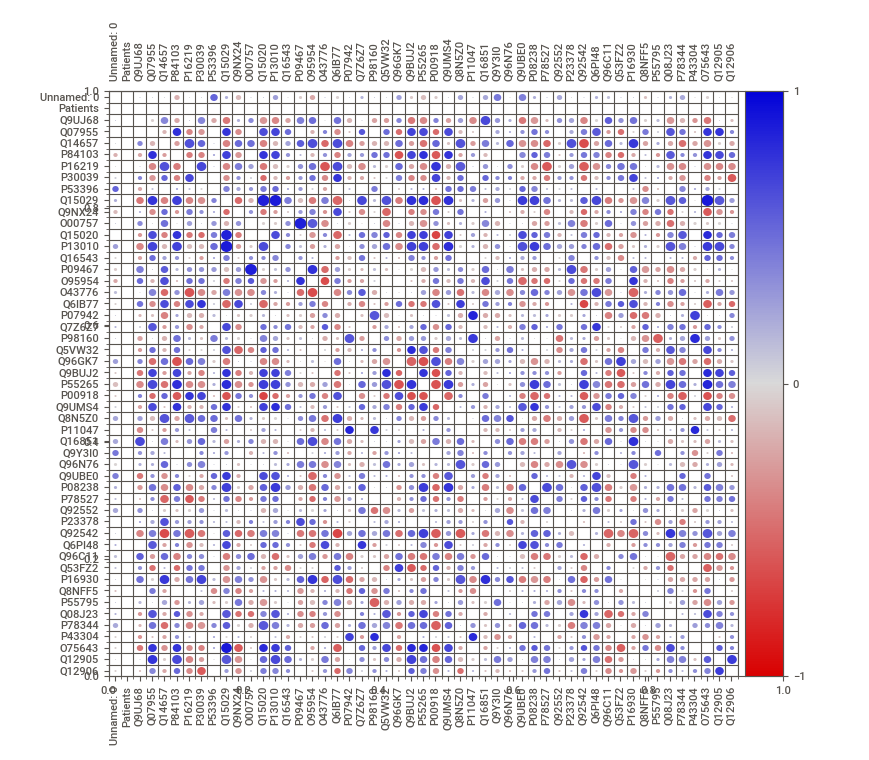

Report ./viz.html was generated.


In [17]:
import sweetviz

my_report = sweetviz.compare_intra(df, df["Patients"]=="C", ["Control", "Cancer", ])

my_report.show_notebook(layout="widescreen")

my_report.show_html(filepath="./viz.html", open_browser=False, layout="widescreen")